# Домашнее задание 3 [10 баллов] 
# До 25.02.18 23:59

Задание выполняется в группе (1-4 человека). В случае использования какого-либо строннего источника информации обязательно дайте на него ссылку (поскольку другие тоже могут на него наткнуться). Плагиат наказывается нулём баллов за задание и предвзятым отношением в будущем.

Не все части обязательны для выполнения, однако вы можете быть дополнительно оштрафованы за небрежное за выполнение одной или двух частей вместо четырех.

При возниконовении проблем с выполнением задания обращайтесь с вопросами к преподавателю. Поэтому настоятельно рекомендуется выполнять задание заранее, оставив запас времени на всевозможные технические проблемы. Если вы начали читать условие в последний вечер и не успели из-за проблем с установкой какой-либо библиотеки — это ваши проблемы.


Результат выполнения задания — это отчёт в формате html на основе Jupyter Notebook. Нормальный отчёт должен включать в себя:
* Краткую постановку задачи и формулировку задания
* Описание **минимума** необходимой теории и/или описание используемых инструментов - не стоит переписывать лекции или Википедию
* Подробный пошаговый рассказ о проделанной работе
* Аккуратно оформленные результаты
* **Внятные выводы** – не стоит относится к домашнему заданию как к последовательности сугубо технических шагов, а стоит относится скорее как к небольшому практическому исследованию, у которого есть своя цель и свое назначение.

Небрежное его оформление отчета существенно отразится на итоговой оценке. Весь код из отчёта должен быть воспроизводимым, если для этого нужны какие-то дополнительные действия, установленные модули и т.п. — всё это должно быть прописано в тексте в явном виде.

Сдача отчетов осуществляется через систему AnyTask.


## Использование архитектуры SENNA для определения части речи

Домашнее задание написано по мотивам работы R. Collobert:

**Collobert, Ronan, Jason Weston, Léon Bottou, Michael Karlen, Koray Kavukcuoglu, and Pavel Kuksa. "Natural language processing (almost) from scratch." Journal of Machine Learning Research 12, no. Aug (2011): 2493-2537.**

В этом домашнем задании вам предстоит самостоятельно разработать архитектуру SENNA для определения части речи. 
SENNA – это простая архитектура нейронной сети, позволяющая достигнуть state-of-the-art результатов в нескольких задачах обработки текстов.  

Использование SENNA для определения части речи предполагает, что задача определения части речи для данного слова формулируется как задача классификации: пусть в размеченном корпусе всего $|T|$ (= tagset) различных тегов частей речи, тогда каждое слово $w$ относится к одному из $T$ классов. Для каждого слова из обучающих данных формируется собственный вектор признаков. Нейронная сеть обучается по всем векторам признаков для слов из обучающего множества. 

Подход к решению задачи классификации представлен в оригинальной статье на рис. 1 (Figure 1: Window approach network). Он состоит из следующих шагов (раздел 3.3.1):
1. Каждое слово представляется эмбеддингом: $w_i \rightarrow LT_{w^i}$, размерность эмбеддинга - $d$;
2. Для каждого слова формируется окно длины $k$ из $(k-1)/2$ соседних слов слева от данного слова  и $(k-1)/2$ соседних слов справа от данного слова, $k$ – нечетное. 
3. Для каждого слова формируется вектор признаков, состоящий из конкатенированных эмбеддингов слов из левого окна, данного слова и слов из правого окна. Итоговая размерность вектора признаков – $d \times k$. Именно этот вектор подается на вход нейронной сети;
4. Обучается нейронная сеть, имеющая один скрытый слой с $n_h$ нейроннами и нелинейной функцией активации $\theta$;
5. На выходном слое нейронной сети решается задача классификации на |T| классов, то есть, определяется часть речи для каждого слова. 

Если для слова невозможно найти $(k-1)/2$ соседних слов слева от данного слова  и $(k-1)/2$ соседних слов справа от данного слова – используется padding.


### Данные
1. Открытый корпус: https://github.com/dialogue-evaluation/morphoRuEval-2017/blob/master/OpenCorpora_Texts.rar
2. Предобученные эмбеддинги Facebook: https://s3-us-west-1.amazonaws.com/fasttext-vectors/wiki.ru.vec

### Часть 1 [2 балла] Подготовка данных
1. Прочитайте размеченные данные Открытого корпуса, используя nltk.corpus.reader.conll.ConllCorpusReader
2. Посчитайте количество предложений и число тегов частей речи;
3. Сформируйте тестовое и обучающее множество: первые 3/4 данных – обучающее множество;

Для каждого слова:
1. Определите его окно (слова слева и справа) размера $k$;
2. Сформируйте его вектор признаков.

### 1. Прочитайте размеченные данные Открытого корпуса.###

In [2]:
import sys
sys.path.append('C:\Program Files\Anaconda3\Lib\site-packages')
#добавляю для себя, так у меня работают пакеты!

In [ ]:
import dill
dill.dump_session('hw3_morning_session.db')

In [1]:
from nltk.corpus.reader import ConllCorpusReader


from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import np_utils
from sklearn.preprocessing import LabelBinarizer, LabelEncoder

from keras.layers import Embedding, Input, Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from keras.models import Model, Sequential

import pandas as pd
import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

import random
random.seed(1228)

from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, confusion_matrix

%matplotlib inline

Using TensorFlow backend.


In [2]:
root = '/home/nst/mount/data/linguistics_hse/machine_learning/hw_3/'
fileid = 'unamb_sent_14_6.conllu'

In [15]:
root = './'
fileid = 'unamb_sent_14_6.conllu'

In [16]:
pos_corpus = ConllCorpusReader(root, fileids = fileid, columntypes = ['ignore', 'words', 'ignore', 'pos', 'chunk'])
sents = list(pos_corpus.iob_sents())

### 2. Посчитайте количество предложений и число тегов частей речи. ###

In [5]:
sents[100]

[('Шалит', 'VERB', '_'), ('.', 'PUNCT', '_')]

In [17]:
pos_tags = [pos for text in sents for word, pos, chunk in text]

In [18]:
print('Количество предложений:', len(sents))
print('Число тегов частей речи:', len(set(pos_tags)))

Количество предложений: 38508
Число тегов частей речи: 14


### 3. Сформируйте тестовое и обучающее множество ###

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
train, test = train_test_split(sents, test_size=0.25)

In [6]:
X_train = [[word[0].lower() for word in sent]for sent in train]
Y_train = [[word[1] for word in sent]for sent in train]
x_test = [[word[0].lower() for word in sent]for sent in test]
y_test = [[word[1] for word in sent]for sent in test]

### Окна слов ###

In [21]:
from nltk.util import ngrams

In [22]:
def get_context(word_index, word_list, k): #k - размер окна
    if k > len(word_list):
        k = len(word_list)
    left_pad = 0 #Слова, у которых нет левого контекста + нормальные 5-граммы
    right_pad = 0 #Слова без правого котекста
    #word_index = word_list.index(word)
    left_index = word_index - int((k-1)/2)
    right_index = word_index + int((k+1)/2)
    #print(word_index)
    #print(left_index)
    #print(right_index)
    if left_index >= 0 and right_index <= len(word_list):
        context = word_list[left_index:right_index]
        context = ' '.join(context)
        left_pad = context
    if left_index < 0:
        left_index = 0
        context = word_list[left_index:right_index]
        context = ' '.join(context)
        left_pad = context
    if right_index > (len(word_list)):
        right_index = (len(word_list)) 
        context = word_list[left_index:right_index]
        context = ' '.join(context)
        right_pad = context
    return left_pad, right_pad

In [23]:
seq = 'I was very happy all the time I drank coffee'.split()

In [24]:
for i, word in enumerate(seq):
    left, right = get_context(i, seq, 7)
    print(left, right)

I was very happy 0
I was very happy all 0
I was very happy all the 0
I was very happy all the time 0
was very happy all the time I 0
very happy all the time I drank 0
happy all the time I drank coffee 0
0 all the time I drank coffee
0 the time I drank coffee
0 time I drank coffee


In [25]:
seq2 = 'I was happy'.split()

In [26]:
for i, word in enumerate(seq2):
    left, right = get_context(i, seq2, 5)
    print(left, right)

I was 0
I was happy 0
0 was happy


In [27]:
def sents_to_windows(sentences, k): #k - размер окна
    windows_left = []
    windows_right = []
    pos_left = []
    pos_right = []
    for sentence in sentences:
        word_sequence = [word for word, pos, chunk in sentence]
        pos_sequence = [pos for word, pos, cunk in sentence]
        for i, word in enumerate(word_sequence):
            left_window, right_window = get_context(i, word_sequence, k)
            if left_window == 0:
                windows_right.append(right_window)
                pos_right.append(pos_sequence[i])
            else:
                windows_left.append(left_window)
                pos_left.append(pos_sequence[i])
    return windows_left, windows_right, pos_left, pos_right

In [28]:
win_left, win_right, pos_left, pos_right = sents_to_windows(sents, 5)

In [29]:
print(win_left[:10])
print(pos_left[:10])
print(win_right[:10])
print(pos_right[:10])



['« Школа злословия', '« Школа злословия »', '« Школа злословия » учит', 'Школа злословия » учит прикусить', 'злословия » учит прикусить язык', 'Сохранится ли градус', 'Сохранится ли градус дискуссии', 'Сохранится ли градус дискуссии в', 'ли градус дискуссии в новом', 'градус дискуссии в новом сезоне']
['PUNCT', 'NOUN', 'NOUN', 'PUNCT', 'VERB', 'VERB', 'PART', 'NOUN', 'NOUN', 'ADP']
['» учит прикусить язык', 'учит прикусить язык', 'в новом сезоне ?', 'новом сезоне ?', 'в новом формате .', 'новом формате .', '« ребрендинг » .', 'ребрендинг » .', 'телевидении стандартам телеведущих .', 'стандартам телеведущих .']
['VERB', 'NOUN', 'NOUN', 'PUNCT', 'NOUN', 'PUNCT', 'PUNCT', 'PUNCT', 'NOUN', 'PUNCT']


In [18]:
print(len(pos_right) + len(pos_left))
print(len(sents))

457583
38508


### Вектора признаков слов ###

In [4]:
from tqdm import tqdm
import numpy as np
#import fasttext

In [ ]:
root_embed = '/home/nst/mount/data/linguistics_hse/machine_learning/hw_3/wiki.ru.vec'

In [5]:
root_embed = 'D:/баклажан/КомпЛинг/ML/wiki.ru.vec' #embeddings, обученные в facebook с помощью fasttext

In [6]:
words = []

embeddings_index = {}
fo = open(root_embed, encoding = 'utf-8')
for line in tqdm(fo):
    values = line.split()
    if len(values) == 301:
        word = values[0]
        words.append(word)
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs
fo.close()

1888424it [10:34, 2974.61it/s]


Для каждого слова:

    Определите его окно (слова слева и справа) размера kk;
    Сформируйте его вектор признаков.


In [14]:
print(embeddings_index['котику'])

[ -2.38429993e-01  -2.15849996e-01  -2.66350001e-01  -1.59689993e-01
   5.19879997e-01  -5.72669983e-01   2.00580001e-01   8.14049989e-02
  -1.73960000e-01   2.56650001e-01   1.71299994e-01  -1.67789996e-01
   5.53670004e-02   2.05750000e-02  -2.91119993e-01  -8.18239987e-01
   3.17470014e-01  -3.88870016e-02   5.50310016e-01   1.93140000e-01
   3.78569990e-01  -1.66730002e-01  -1.52170002e-01  -3.49310011e-01
  -9.05430019e-02   2.65430003e-01  -1.54880002e-01   2.26750001e-02
  -8.40670022e-04   1.45760000e-01   3.93099993e-01   2.06230003e-02
  -2.69650012e-01   5.87120000e-03   1.99450001e-01  -1.54060006e-01
  -4.90310013e-01  -2.57719997e-02   9.93330032e-02  -6.61559999e-02
   1.82520002e-01  -2.74850011e-01  -4.09449995e-01  -1.66559994e-01
  -6.68089986e-01  -7.73889991e-03   2.69760013e-01   4.53370005e-01
  -8.03569973e-01  -2.01299995e-01   1.72499999e-01  -2.89319992e-01
   1.69019997e-01  -1.45060003e-01  -9.48909968e-02  -5.62030002e-02
  -3.87890004e-02   3.54099989e-01

### Часть 2 [4 баллов] Архитектура нейронной сети

Архитектура нейронной сети состоит из следующих слов:
1. Входной слой: нейронная сеть получает на вход вектор признаков, состоящий из $k$ конкатенированных эмбеддингов;/
2. Скрытый слой: $n_h$ нейронов и нелинейная функция активации $\theta$;
3. Выходной слой:  $|T|$ нейронов для итоговой классификации.

Обучите нейронную сеть на обучающих данных.

In [30]:
LEN_WINDOW = 5 #задаем размер окна 
EMBEDDING_DIM = 300 #размерность векторов эмбеддингов

In [31]:
#построили окна для трейновских предложений
train_win_left, train_win_right, train_pos_left, train_pos_right = sents_to_windows(train, LEN_WINDOW)

In [27]:
print(train_win_left[:10])
print(train_pos_left[:10])
print(train_win_right[:10])
print(train_pos_right[:10])

['Помимо этого —', 'Помимо этого — пылевые', 'Помимо этого — пылевые скопления', 'этого — пылевые скопления между', '— пылевые скопления между кольцами', 'пылевые скопления между кольцами Урана', 'скопления между кольцами Урана могут', 'между кольцами Урана могут быть', 'кольцами Урана могут быть схожи', 'Урана могут быть схожи с']
['ADP', 'PRON', 'PUNCT', 'ADJ', 'NOUN', 'ADP', 'NOUN', 'NOUN', 'VERB', 'VERB']
['пылевыми кольцами Юпитера .', 'кольцами Юпитера .', 'оригинальностью предложенных техник .', 'предложенных техник .', 'аппаратура , лаборатория .', ', лаборатория .', 'и воплощениях Божеству .', 'воплощениях Божеству .', 'сделала и Колумбия .', 'и Колумбия .']
['PROPN', 'PUNCT', 'NOUN', 'PUNCT', 'NOUN', 'PUNCT', 'NOUN', 'PUNCT', 'PROPN', 'PUNCT']


In [32]:
#объединим левые и правые окна для токенайзера
train_all = train_win_left + train_win_right

In [33]:
print(len(train_win_left))
print(len(train_win_right))
print(len(train_all))

293469
50033
343502


In [34]:
train_all[34]

', за счет увеличения финансирования'

In [35]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_all)#обучили токенайзер словам из трейна

sequences_left = tokenizer.texts_to_sequences(train_win_left)
X_train_left = pad_sequences(sequences_left, maxlen = LEN_WINDOW, padding = 'pre')

sequences_right = tokenizer.texts_to_sequences(train_win_right)
X_train_right = pad_sequences(sequences_right, maxlen = LEN_WINDOW, padding = 'post')

In [36]:
X_train = np.concatenate((X_train_left, X_train_right), axis = 0)

In [37]:
X_train[5]

array([    0, 23397,   341,  2347, 13991])

In [38]:
#объединяем левые и правые теги
pos_train = train_pos_left + train_pos_right

In [39]:
#кодируем теги трейна, чтобы подать на вход нейросети
le = LabelEncoder()
le.fit(pos_train)
y_train = np_utils.to_categorical(le.transform(pos_train), 14) #14 - число классов (частей речи)
#y_test = np_utils.to_categorical(le.transform(), 5)
#y_true = le.transform(test_corpus.topic)
print(y_train[0])

[ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]


In [50]:
print(len(y_train))

343229


In [40]:
word_index = tokenizer.word_index
len(word_index)

65616

In [41]:
#какая строчка из матрицы соответствует каждому слову из словаря
embedding_matrix = np.zeros((len(word_index) + 1, EMBEDDING_DIM)) # +1 для символа pad
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

In [42]:
model = Sequential()

model.add(Embedding(len(word_index) + 1, #объем словаря + 1 символ для pad
                            EMBEDDING_DIM,
                            weights=[embedding_matrix],
                            input_length=LEN_WINDOW,
                            trainable=False))
model.add(Flatten()) #конкатенирует входные вектора эмбеддингов
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(len(set(pos_train)), activation = 'softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [43]:
model.fit(X_train, y_train, epochs = 10, batch_size = 32,  validation_split = 0.1)

Train on 309151 samples, validate on 34351 samples
Epoch 1/10


 33216/309151 [==>...........................] - ETA: 11457s - loss: 2.7909 - acc: 0.093 - ETA: 6102s - loss: 2.7439 - acc: 0.093 - ETA: 2565s - loss: 2.6112 - acc: 0.17 - ETA: 1903s - loss: 2.5594 - acc: 0.20 - ETA: 1383s - loss: 2.5102 - acc: 0.23 - ETA: 958s - loss: 2.4739 - acc: 0.2417 - ETA: 795s - loss: 2.4295 - acc: 0.248 - ETA: 677s - loss: 2.4071 - acc: 0.252 - ETA: 619s - loss: 2.3749 - acc: 0.266 - ETA: 554s - loss: 2.3498 - acc: 0.274 - ETA: 506s - loss: 2.3189 - acc: 0.278 - ETA: 465s - loss: 2.2980 - acc: 0.284 - ETA: 445s - loss: 2.2853 - acc: 0.283 - ETA: 417s - loss: 2.2723 - acc: 0.279 - ETA: 393s - loss: 2.2574 - acc: 0.282 - ETA: 373s - loss: 2.2384 - acc: 0.289 - ETA: 355s - loss: 2.2187 - acc: 0.292 - ETA: 341s - loss: 2.2031 - acc: 0.297 - ETA: 328s - loss: 2.1929 - acc: 0.301 - ETA: 321s - loss: 2.1807 - acc: 0.303 - ETA: 305s - loss: 2.1690 - acc: 0.306 - ETA: 292s - loss: 2.1489 - acc: 0.311 - ETA: 281s - loss: 2.1503 - acc: 0.307 - ETA: 273s - loss: 2.1397 - 

144992/309151 [=============>................] - ETA: 62s - loss: 1.2158 - acc: 0.59 - ETA: 62s - loss: 1.2155 - acc: 0.59 - ETA: 62s - loss: 1.2153 - acc: 0.59 - ETA: 62s - loss: 1.2152 - acc: 0.59 - ETA: 62s - loss: 1.2149 - acc: 0.59 - ETA: 62s - loss: 1.2148 - acc: 0.59 - ETA: 62s - loss: 1.2144 - acc: 0.59 - ETA: 62s - loss: 1.2142 - acc: 0.59 - ETA: 62s - loss: 1.2141 - acc: 0.59 - ETA: 62s - loss: 1.2137 - acc: 0.59 - ETA: 62s - loss: 1.2133 - acc: 0.59 - ETA: 62s - loss: 1.2130 - acc: 0.59 - ETA: 62s - loss: 1.2128 - acc: 0.59 - ETA: 62s - loss: 1.2126 - acc: 0.59 - ETA: 62s - loss: 1.2124 - acc: 0.59 - ETA: 62s - loss: 1.2121 - acc: 0.59 - ETA: 61s - loss: 1.2116 - acc: 0.59 - ETA: 61s - loss: 1.2112 - acc: 0.59 - ETA: 61s - loss: 1.2106 - acc: 0.59 - ETA: 61s - loss: 1.2103 - acc: 0.59 - ETA: 61s - loss: 1.2098 - acc: 0.59 - ETA: 61s - loss: 1.2093 - acc: 0.59 - ETA: 61s - loss: 1.2092 - acc: 0.59 - ETA: 61s - loss: 1.2091 - acc: 0.59 - ETA: 61s - loss: 1.2087 - acc: 0.59 - E

182336/309151 [================>.............] - ETA: 55s - loss: 1.1702 - acc: 0.60 - ETA: 55s - loss: 1.1701 - acc: 0.60 - ETA: 54s - loss: 1.1699 - acc: 0.60 - ETA: 54s - loss: 1.1696 - acc: 0.60 - ETA: 54s - loss: 1.1695 - acc: 0.60 - ETA: 54s - loss: 1.1692 - acc: 0.60 - ETA: 54s - loss: 1.1688 - acc: 0.60 - ETA: 54s - loss: 1.1684 - acc: 0.60 - ETA: 54s - loss: 1.1683 - acc: 0.60 - ETA: 54s - loss: 1.1681 - acc: 0.60 - ETA: 54s - loss: 1.1679 - acc: 0.60 - ETA: 54s - loss: 1.1676 - acc: 0.60 - ETA: 54s - loss: 1.1674 - acc: 0.60 - ETA: 54s - loss: 1.1672 - acc: 0.60 - ETA: 54s - loss: 1.1670 - acc: 0.60 - ETA: 54s - loss: 1.1667 - acc: 0.60 - ETA: 54s - loss: 1.1662 - acc: 0.60 - ETA: 54s - loss: 1.1660 - acc: 0.61 - ETA: 54s - loss: 1.1657 - acc: 0.61 - ETA: 54s - loss: 1.1656 - acc: 0.61 - ETA: 54s - loss: 1.1655 - acc: 0.61 - ETA: 53s - loss: 1.1652 - acc: 0.61 - ETA: 53s - loss: 1.1649 - acc: 0.61 - ETA: 53s - loss: 1.1646 - acc: 0.61 - ETA: 53s - loss: 1.1644 - acc: 0.61 - E

223584/309151 [====================>.........] - ETA: 41s - loss: 1.1313 - acc: 0.61 - ETA: 41s - loss: 1.1312 - acc: 0.61 - ETA: 41s - loss: 1.1310 - acc: 0.61 - ETA: 41s - loss: 1.1309 - acc: 0.61 - ETA: 41s - loss: 1.1308 - acc: 0.61 - ETA: 41s - loss: 1.1307 - acc: 0.61 - ETA: 41s - loss: 1.1304 - acc: 0.61 - ETA: 41s - loss: 1.1303 - acc: 0.61 - ETA: 41s - loss: 1.1302 - acc: 0.61 - ETA: 41s - loss: 1.1302 - acc: 0.61 - ETA: 41s - loss: 1.1301 - acc: 0.61 - ETA: 41s - loss: 1.1297 - acc: 0.62 - ETA: 41s - loss: 1.1296 - acc: 0.62 - ETA: 40s - loss: 1.1296 - acc: 0.62 - ETA: 40s - loss: 1.1295 - acc: 0.62 - ETA: 40s - loss: 1.1293 - acc: 0.62 - ETA: 40s - loss: 1.1291 - acc: 0.62 - ETA: 40s - loss: 1.1289 - acc: 0.62 - ETA: 40s - loss: 1.1289 - acc: 0.62 - ETA: 40s - loss: 1.1288 - acc: 0.62 - ETA: 40s - loss: 1.1284 - acc: 0.62 - ETA: 40s - loss: 1.1282 - acc: 0.62 - ETA: 40s - loss: 1.1279 - acc: 0.62 - ETA: 40s - loss: 1.1277 - acc: 0.62 - ETA: 40s - loss: 1.1274 - acc: 0.62 - E

265152/309151 [========================>.....] - ETA: 27s - loss: 1.1001 - acc: 0.62 - ETA: 27s - loss: 1.1000 - acc: 0.62 - ETA: 27s - loss: 1.0998 - acc: 0.62 - ETA: 27s - loss: 1.0996 - acc: 0.62 - ETA: 27s - loss: 1.0994 - acc: 0.62 - ETA: 27s - loss: 1.0993 - acc: 0.62 - ETA: 27s - loss: 1.0992 - acc: 0.62 - ETA: 27s - loss: 1.0991 - acc: 0.62 - ETA: 27s - loss: 1.0990 - acc: 0.62 - ETA: 26s - loss: 1.0990 - acc: 0.62 - ETA: 26s - loss: 1.0988 - acc: 0.62 - ETA: 26s - loss: 1.0986 - acc: 0.62 - ETA: 26s - loss: 1.0983 - acc: 0.62 - ETA: 26s - loss: 1.0982 - acc: 0.62 - ETA: 26s - loss: 1.0980 - acc: 0.62 - ETA: 26s - loss: 1.0978 - acc: 0.62 - ETA: 26s - loss: 1.0975 - acc: 0.62 - ETA: 26s - loss: 1.0974 - acc: 0.62 - ETA: 26s - loss: 1.0973 - acc: 0.62 - ETA: 26s - loss: 1.0972 - acc: 0.62 - ETA: 26s - loss: 1.0970 - acc: 0.62 - ETA: 26s - loss: 1.0968 - acc: 0.62 - ETA: 26s - loss: 1.0966 - acc: 0.62 - ETA: 26s - loss: 1.0964 - acc: 0.62 - ETA: 26s - loss: 1.0964 - acc: 0.62 - E

307648/309151 [============================>.] - ETA: 13s - loss: 1.0746 - acc: 0.63 - ETA: 13s - loss: 1.0745 - acc: 0.63 - ETA: 13s - loss: 1.0745 - acc: 0.63 - ETA: 13s - loss: 1.0744 - acc: 0.63 - ETA: 13s - loss: 1.0742 - acc: 0.63 - ETA: 13s - loss: 1.0740 - acc: 0.63 - ETA: 13s - loss: 1.0739 - acc: 0.63 - ETA: 13s - loss: 1.0737 - acc: 0.63 - ETA: 13s - loss: 1.0736 - acc: 0.63 - ETA: 13s - loss: 1.0735 - acc: 0.63 - ETA: 13s - loss: 1.0734 - acc: 0.63 - ETA: 13s - loss: 1.0732 - acc: 0.63 - ETA: 13s - loss: 1.0732 - acc: 0.63 - ETA: 12s - loss: 1.0730 - acc: 0.63 - ETA: 12s - loss: 1.0727 - acc: 0.63 - ETA: 12s - loss: 1.0726 - acc: 0.63 - ETA: 12s - loss: 1.0725 - acc: 0.63 - ETA: 12s - loss: 1.0724 - acc: 0.63 - ETA: 12s - loss: 1.0722 - acc: 0.63 - ETA: 12s - loss: 1.0722 - acc: 0.63 - ETA: 12s - loss: 1.0720 - acc: 0.63 - ETA: 12s - loss: 1.0718 - acc: 0.63 - ETA: 12s - loss: 1.0716 - acc: 0.63 - ETA: 12s - loss: 1.0716 - acc: 0.63 - ETA: 12s - loss: 1.0715 - acc: 0.63 - E

309151/309151 [==============================] - ETA: 0s - loss: 1.0524 - acc: 0.641 - ETA: 0s - loss: 1.0523 - acc: 0.641 - ETA: 0s - loss: 1.0522 - acc: 0.641 - ETA: 0s - loss: 1.0522 - acc: 0.641 - ETA: 0s - loss: 1.0520 - acc: 0.641 - ETA: 0s - loss: 1.0521 - acc: 0.641 - ETA: 0s - loss: 1.0519 - acc: 0.641 - ETA: 0s - loss: 1.0519 - acc: 0.641 - ETA: 0s - loss: 1.0517 - acc: 0.641 - 97s - loss: 1.0517 - acc: 0.6419 - val_loss: 0.5722 - val_acc: 0.8596
Epoch 2/10


 42304/309151 [===>..........................] - ETA: 289s - loss: 0.8699 - acc: 0.812 - ETA: 80s - loss: 0.8916 - acc: 0.653 - ETA: 71s - loss: 0.8855 - acc: 0.65 - ETA: 97s - loss: 0.8869 - acc: 0.65 - ETA: 103s - loss: 0.9070 - acc: 0.661 - ETA: 103s - loss: 0.9042 - acc: 0.658 - ETA: 105s - loss: 0.8968 - acc: 0.658 - ETA: 102s - loss: 0.8964 - acc: 0.664 - ETA: 104s - loss: 0.8794 - acc: 0.669 - ETA: 102s - loss: 0.8888 - acc: 0.668 - ETA: 99s - loss: 0.8883 - acc: 0.669 - ETA: 96s - loss: 0.8845 - acc: 0.67 - ETA: 94s - loss: 0.8836 - acc: 0.67 - ETA: 92s - loss: 0.8868 - acc: 0.68 - ETA: 91s - loss: 0.8817 - acc: 0.68 - ETA: 89s - loss: 0.8842 - acc: 0.68 - ETA: 88s - loss: 0.8979 - acc: 0.67 - ETA: 86s - loss: 0.8909 - acc: 0.67 - ETA: 85s - loss: 0.8839 - acc: 0.68 - ETA: 85s - loss: 0.8847 - acc: 0.68 - ETA: 85s - loss: 0.8833 - acc: 0.68 - ETA: 84s - loss: 0.8828 - acc: 0.68 - ETA: 85s - loss: 0.8823 - acc: 0.68 - ETA: 86s - loss: 0.8800 - acc: 0.68 - ETA: 86s - loss: 0.8812

126016/309151 [===========>..................] - ETA: 62s - loss: 0.8617 - acc: 0.69 - ETA: 62s - loss: 0.8617 - acc: 0.69 - ETA: 62s - loss: 0.8617 - acc: 0.69 - ETA: 62s - loss: 0.8618 - acc: 0.69 - ETA: 62s - loss: 0.8618 - acc: 0.69 - ETA: 62s - loss: 0.8619 - acc: 0.69 - ETA: 61s - loss: 0.8617 - acc: 0.69 - ETA: 61s - loss: 0.8618 - acc: 0.69 - ETA: 61s - loss: 0.8620 - acc: 0.69 - ETA: 61s - loss: 0.8617 - acc: 0.69 - ETA: 61s - loss: 0.8616 - acc: 0.69 - ETA: 61s - loss: 0.8616 - acc: 0.69 - ETA: 61s - loss: 0.8620 - acc: 0.69 - ETA: 61s - loss: 0.8620 - acc: 0.69 - ETA: 61s - loss: 0.8618 - acc: 0.69 - ETA: 61s - loss: 0.8617 - acc: 0.69 - ETA: 61s - loss: 0.8623 - acc: 0.69 - ETA: 61s - loss: 0.8623 - acc: 0.69 - ETA: 61s - loss: 0.8624 - acc: 0.69 - ETA: 61s - loss: 0.8627 - acc: 0.69 - ETA: 61s - loss: 0.8625 - acc: 0.69 - ETA: 60s - loss: 0.8624 - acc: 0.69 - ETA: 60s - loss: 0.8621 - acc: 0.69 - ETA: 60s - loss: 0.8619 - acc: 0.69 - ETA: 61s - loss: 0.8619 - acc: 0.69 - E

168160/309151 [===============>..............] - ETA: 49s - loss: 0.8632 - acc: 0.69 - ETA: 49s - loss: 0.8634 - acc: 0.69 - ETA: 49s - loss: 0.8634 - acc: 0.69 - ETA: 49s - loss: 0.8636 - acc: 0.69 - ETA: 49s - loss: 0.8633 - acc: 0.69 - ETA: 49s - loss: 0.8632 - acc: 0.69 - ETA: 49s - loss: 0.8633 - acc: 0.69 - ETA: 49s - loss: 0.8633 - acc: 0.69 - ETA: 49s - loss: 0.8632 - acc: 0.69 - ETA: 49s - loss: 0.8634 - acc: 0.69 - ETA: 49s - loss: 0.8634 - acc: 0.69 - ETA: 49s - loss: 0.8632 - acc: 0.69 - ETA: 49s - loss: 0.8635 - acc: 0.69 - ETA: 49s - loss: 0.8635 - acc: 0.69 - ETA: 49s - loss: 0.8635 - acc: 0.69 - ETA: 49s - loss: 0.8635 - acc: 0.69 - ETA: 49s - loss: 0.8635 - acc: 0.69 - ETA: 49s - loss: 0.8634 - acc: 0.69 - ETA: 49s - loss: 0.8634 - acc: 0.69 - ETA: 49s - loss: 0.8635 - acc: 0.69 - ETA: 49s - loss: 0.8635 - acc: 0.69 - ETA: 49s - loss: 0.8635 - acc: 0.69 - ETA: 49s - loss: 0.8635 - acc: 0.69 - ETA: 48s - loss: 0.8636 - acc: 0.69 - ETA: 48s - loss: 0.8634 - acc: 0.69 - E

210048/309151 [===================>..........] - ETA: 38s - loss: 0.8646 - acc: 0.69 - ETA: 38s - loss: 0.8646 - acc: 0.69 - ETA: 38s - loss: 0.8644 - acc: 0.69 - ETA: 38s - loss: 0.8644 - acc: 0.69 - ETA: 38s - loss: 0.8644 - acc: 0.69 - ETA: 38s - loss: 0.8644 - acc: 0.69 - ETA: 38s - loss: 0.8644 - acc: 0.69 - ETA: 38s - loss: 0.8644 - acc: 0.69 - ETA: 38s - loss: 0.8645 - acc: 0.69 - ETA: 37s - loss: 0.8646 - acc: 0.69 - ETA: 37s - loss: 0.8646 - acc: 0.69 - ETA: 37s - loss: 0.8645 - acc: 0.69 - ETA: 37s - loss: 0.8645 - acc: 0.69 - ETA: 37s - loss: 0.8645 - acc: 0.69 - ETA: 37s - loss: 0.8645 - acc: 0.69 - ETA: 37s - loss: 0.8644 - acc: 0.69 - ETA: 37s - loss: 0.8644 - acc: 0.69 - ETA: 37s - loss: 0.8646 - acc: 0.69 - ETA: 37s - loss: 0.8646 - acc: 0.69 - ETA: 37s - loss: 0.8646 - acc: 0.69 - ETA: 37s - loss: 0.8647 - acc: 0.69 - ETA: 37s - loss: 0.8646 - acc: 0.69 - ETA: 37s - loss: 0.8646 - acc: 0.69 - ETA: 37s - loss: 0.8646 - acc: 0.69 - ETA: 37s - loss: 0.8646 - acc: 0.69 - E

250592/309151 [=======================>......] - ETA: 27s - loss: 0.8639 - acc: 0.69 - ETA: 26s - loss: 0.8638 - acc: 0.69 - ETA: 26s - loss: 0.8635 - acc: 0.69 - ETA: 26s - loss: 0.8636 - acc: 0.69 - ETA: 26s - loss: 0.8636 - acc: 0.69 - ETA: 26s - loss: 0.8636 - acc: 0.69 - ETA: 26s - loss: 0.8635 - acc: 0.69 - ETA: 26s - loss: 0.8635 - acc: 0.69 - ETA: 26s - loss: 0.8634 - acc: 0.69 - ETA: 26s - loss: 0.8635 - acc: 0.69 - ETA: 26s - loss: 0.8636 - acc: 0.69 - ETA: 26s - loss: 0.8636 - acc: 0.69 - ETA: 26s - loss: 0.8636 - acc: 0.69 - ETA: 26s - loss: 0.8636 - acc: 0.69 - ETA: 26s - loss: 0.8636 - acc: 0.69 - ETA: 26s - loss: 0.8636 - acc: 0.69 - ETA: 26s - loss: 0.8636 - acc: 0.69 - ETA: 26s - loss: 0.8635 - acc: 0.69 - ETA: 26s - loss: 0.8635 - acc: 0.69 - ETA: 26s - loss: 0.8636 - acc: 0.69 - ETA: 25s - loss: 0.8635 - acc: 0.69 - ETA: 25s - loss: 0.8635 - acc: 0.69 - ETA: 25s - loss: 0.8633 - acc: 0.69 - ETA: 25s - loss: 0.8633 - acc: 0.69 - ETA: 25s - loss: 0.8633 - acc: 0.69 - E

290720/309151 [===========================>..] - ETA: 16s - loss: 0.8618 - acc: 0.69 - ETA: 16s - loss: 0.8618 - acc: 0.69 - ETA: 15s - loss: 0.8618 - acc: 0.69 - ETA: 15s - loss: 0.8618 - acc: 0.69 - ETA: 15s - loss: 0.8618 - acc: 0.69 - ETA: 15s - loss: 0.8617 - acc: 0.69 - ETA: 15s - loss: 0.8616 - acc: 0.69 - ETA: 15s - loss: 0.8616 - acc: 0.69 - ETA: 15s - loss: 0.8616 - acc: 0.69 - ETA: 15s - loss: 0.8615 - acc: 0.69 - ETA: 15s - loss: 0.8615 - acc: 0.69 - ETA: 15s - loss: 0.8615 - acc: 0.69 - ETA: 15s - loss: 0.8615 - acc: 0.69 - ETA: 15s - loss: 0.8615 - acc: 0.69 - ETA: 15s - loss: 0.8615 - acc: 0.69 - ETA: 15s - loss: 0.8614 - acc: 0.69 - ETA: 15s - loss: 0.8614 - acc: 0.69 - ETA: 15s - loss: 0.8613 - acc: 0.69 - ETA: 15s - loss: 0.8614 - acc: 0.69 - ETA: 15s - loss: 0.8613 - acc: 0.69 - ETA: 15s - loss: 0.8612 - acc: 0.69 - ETA: 14s - loss: 0.8612 - acc: 0.69 - ETA: 14s - loss: 0.8612 - acc: 0.69 - ETA: 14s - loss: 0.8612 - acc: 0.69 - ETA: 14s - loss: 0.8613 - acc: 0.69 - E

309151/309151 [==============================] - ETA: 5s - loss: 0.8587 - acc: 0.696 - ETA: 5s - loss: 0.8587 - acc: 0.696 - ETA: 5s - loss: 0.8587 - acc: 0.696 - ETA: 4s - loss: 0.8588 - acc: 0.696 - ETA: 4s - loss: 0.8588 - acc: 0.696 - ETA: 4s - loss: 0.8589 - acc: 0.696 - ETA: 4s - loss: 0.8589 - acc: 0.696 - ETA: 4s - loss: 0.8589 - acc: 0.696 - ETA: 4s - loss: 0.8589 - acc: 0.696 - ETA: 4s - loss: 0.8589 - acc: 0.696 - ETA: 4s - loss: 0.8590 - acc: 0.696 - ETA: 4s - loss: 0.8589 - acc: 0.696 - ETA: 4s - loss: 0.8588 - acc: 0.696 - ETA: 4s - loss: 0.8588 - acc: 0.696 - ETA: 4s - loss: 0.8589 - acc: 0.696 - ETA: 4s - loss: 0.8589 - acc: 0.696 - ETA: 4s - loss: 0.8588 - acc: 0.696 - ETA: 4s - loss: 0.8588 - acc: 0.696 - ETA: 4s - loss: 0.8588 - acc: 0.696 - ETA: 4s - loss: 0.8587 - acc: 0.696 - ETA: 3s - loss: 0.8588 - acc: 0.696 - ETA: 3s - loss: 0.8588 - acc: 0.696 - ETA: 3s - loss: 0.8587 - acc: 0.696 - ETA: 3s - loss: 0.8586 - acc: 0.696 - ETA: 3s - loss: 0.8586 - acc: 0.696 - E

 42272/309151 [===>..........................] - ETA: 328s - loss: 0.9433 - acc: 0.687 - ETA: 91s - loss: 0.8837 - acc: 0.691 - ETA: 128s - loss: 0.8175 - acc: 0.718 - ETA: 121s - loss: 0.8100 - acc: 0.727 - ETA: 110s - loss: 0.7904 - acc: 0.736 - ETA: 109s - loss: 0.7767 - acc: 0.738 - ETA: 105s - loss: 0.7589 - acc: 0.738 - ETA: 107s - loss: 0.7467 - acc: 0.744 - ETA: 101s - loss: 0.7338 - acc: 0.750 - ETA: 102s - loss: 0.7292 - acc: 0.750 - ETA: 106s - loss: 0.7300 - acc: 0.750 - ETA: 102s - loss: 0.7241 - acc: 0.749 - ETA: 100s - loss: 0.7373 - acc: 0.743 - ETA: 98s - loss: 0.7362 - acc: 0.746 - ETA: 95s - loss: 0.7500 - acc: 0.74 - ETA: 96s - loss: 0.7522 - acc: 0.73 - ETA: 94s - loss: 0.7507 - acc: 0.74 - ETA: 91s - loss: 0.7622 - acc: 0.73 - ETA: 89s - loss: 0.7688 - acc: 0.73 - ETA: 88s - loss: 0.7670 - acc: 0.73 - ETA: 87s - loss: 0.7669 - acc: 0.73 - ETA: 87s - loss: 0.7676 - acc: 0.73 - ETA: 85s - loss: 0.7658 - acc: 0.73 - ETA: 84s - loss: 0.7700 - acc: 0.73 - ETA: 84s - lo

124448/309151 [===========>..................] - ETA: 62s - loss: 0.7969 - acc: 0.71 - ETA: 62s - loss: 0.7967 - acc: 0.71 - ETA: 62s - loss: 0.7968 - acc: 0.71 - ETA: 62s - loss: 0.7967 - acc: 0.71 - ETA: 62s - loss: 0.7967 - acc: 0.71 - ETA: 62s - loss: 0.7965 - acc: 0.71 - ETA: 62s - loss: 0.7967 - acc: 0.71 - ETA: 62s - loss: 0.7968 - acc: 0.71 - ETA: 62s - loss: 0.7970 - acc: 0.71 - ETA: 62s - loss: 0.7968 - acc: 0.71 - ETA: 62s - loss: 0.7971 - acc: 0.71 - ETA: 62s - loss: 0.7972 - acc: 0.71 - ETA: 62s - loss: 0.7973 - acc: 0.71 - ETA: 62s - loss: 0.7974 - acc: 0.71 - ETA: 62s - loss: 0.7973 - acc: 0.71 - ETA: 62s - loss: 0.7971 - acc: 0.71 - ETA: 62s - loss: 0.7973 - acc: 0.71 - ETA: 62s - loss: 0.7971 - acc: 0.71 - ETA: 62s - loss: 0.7972 - acc: 0.71 - ETA: 62s - loss: 0.7973 - acc: 0.71 - ETA: 62s - loss: 0.7971 - acc: 0.71 - ETA: 62s - loss: 0.7969 - acc: 0.71 - ETA: 62s - loss: 0.7969 - acc: 0.71 - ETA: 61s - loss: 0.7970 - acc: 0.71 - ETA: 61s - loss: 0.7973 - acc: 0.71 - E

164928/309151 [===============>..............] - ETA: 51s - loss: 0.8015 - acc: 0.71 - ETA: 50s - loss: 0.8017 - acc: 0.71 - ETA: 51s - loss: 0.8016 - acc: 0.71 - ETA: 50s - loss: 0.8018 - acc: 0.71 - ETA: 50s - loss: 0.8017 - acc: 0.71 - ETA: 50s - loss: 0.8018 - acc: 0.71 - ETA: 50s - loss: 0.8016 - acc: 0.71 - ETA: 50s - loss: 0.8017 - acc: 0.71 - ETA: 50s - loss: 0.8017 - acc: 0.71 - ETA: 50s - loss: 0.8018 - acc: 0.71 - ETA: 50s - loss: 0.8020 - acc: 0.71 - ETA: 50s - loss: 0.8020 - acc: 0.71 - ETA: 50s - loss: 0.8019 - acc: 0.71 - ETA: 50s - loss: 0.8019 - acc: 0.71 - ETA: 50s - loss: 0.8021 - acc: 0.71 - ETA: 50s - loss: 0.8021 - acc: 0.71 - ETA: 50s - loss: 0.8021 - acc: 0.71 - ETA: 50s - loss: 0.8022 - acc: 0.71 - ETA: 50s - loss: 0.8021 - acc: 0.71 - ETA: 49s - loss: 0.8021 - acc: 0.71 - ETA: 49s - loss: 0.8021 - acc: 0.71 - ETA: 49s - loss: 0.8021 - acc: 0.71 - ETA: 49s - loss: 0.8022 - acc: 0.71 - ETA: 49s - loss: 0.8021 - acc: 0.71 - ETA: 49s - loss: 0.8020 - acc: 0.71 - E

200000/309151 [==================>...........] - ETA: 40s - loss: 0.8031 - acc: 0.71 - ETA: 40s - loss: 0.8031 - acc: 0.71 - ETA: 40s - loss: 0.8032 - acc: 0.71 - ETA: 40s - loss: 0.8032 - acc: 0.71 - ETA: 39s - loss: 0.8032 - acc: 0.71 - ETA: 39s - loss: 0.8031 - acc: 0.71 - ETA: 39s - loss: 0.8033 - acc: 0.71 - ETA: 39s - loss: 0.8033 - acc: 0.71 - ETA: 39s - loss: 0.8033 - acc: 0.71 - ETA: 39s - loss: 0.8031 - acc: 0.71 - ETA: 39s - loss: 0.8030 - acc: 0.71 - ETA: 39s - loss: 0.8032 - acc: 0.71 - ETA: 39s - loss: 0.8033 - acc: 0.71 - ETA: 39s - loss: 0.8033 - acc: 0.71 - ETA: 39s - loss: 0.8032 - acc: 0.71 - ETA: 39s - loss: 0.8031 - acc: 0.71 - ETA: 39s - loss: 0.8032 - acc: 0.71 - ETA: 39s - loss: 0.8031 - acc: 0.71 - ETA: 39s - loss: 0.8031 - acc: 0.71 - ETA: 39s - loss: 0.8031 - acc: 0.71 - ETA: 39s - loss: 0.8032 - acc: 0.71 - ETA: 38s - loss: 0.8029 - acc: 0.71 - ETA: 38s - loss: 0.8029 - acc: 0.71 - ETA: 38s - loss: 0.8030 - acc: 0.71 - ETA: 38s - loss: 0.8031 - acc: 0.71 - E

233248/309151 [=====================>........] - ETA: 31s - loss: 0.8038 - acc: 0.71 - ETA: 31s - loss: 0.8037 - acc: 0.71 - ETA: 31s - loss: 0.8037 - acc: 0.71 - ETA: 31s - loss: 0.8037 - acc: 0.71 - ETA: 31s - loss: 0.8038 - acc: 0.71 - ETA: 31s - loss: 0.8038 - acc: 0.71 - ETA: 31s - loss: 0.8038 - acc: 0.71 - ETA: 31s - loss: 0.8038 - acc: 0.71 - ETA: 31s - loss: 0.8039 - acc: 0.71 - ETA: 31s - loss: 0.8039 - acc: 0.71 - ETA: 31s - loss: 0.8041 - acc: 0.71 - ETA: 31s - loss: 0.8041 - acc: 0.71 - ETA: 31s - loss: 0.8041 - acc: 0.71 - ETA: 31s - loss: 0.8042 - acc: 0.71 - ETA: 31s - loss: 0.8042 - acc: 0.71 - ETA: 31s - loss: 0.8042 - acc: 0.71 - ETA: 31s - loss: 0.8042 - acc: 0.71 - ETA: 31s - loss: 0.8042 - acc: 0.71 - ETA: 31s - loss: 0.8043 - acc: 0.71 - ETA: 31s - loss: 0.8043 - acc: 0.71 - ETA: 31s - loss: 0.8043 - acc: 0.71 - ETA: 31s - loss: 0.8043 - acc: 0.71 - ETA: 31s - loss: 0.8043 - acc: 0.71 - ETA: 31s - loss: 0.8043 - acc: 0.71 - ETA: 31s - loss: 0.8043 - acc: 0.71 - E

276032/309151 [=========================>....] - ETA: 22s - loss: 0.8061 - acc: 0.71 - ETA: 22s - loss: 0.8062 - acc: 0.71 - ETA: 22s - loss: 0.8062 - acc: 0.71 - ETA: 22s - loss: 0.8062 - acc: 0.71 - ETA: 22s - loss: 0.8061 - acc: 0.71 - ETA: 22s - loss: 0.8061 - acc: 0.71 - ETA: 22s - loss: 0.8060 - acc: 0.71 - ETA: 22s - loss: 0.8059 - acc: 0.71 - ETA: 22s - loss: 0.8061 - acc: 0.71 - ETA: 22s - loss: 0.8061 - acc: 0.71 - ETA: 22s - loss: 0.8061 - acc: 0.71 - ETA: 22s - loss: 0.8062 - acc: 0.71 - ETA: 21s - loss: 0.8063 - acc: 0.71 - ETA: 21s - loss: 0.8064 - acc: 0.71 - ETA: 21s - loss: 0.8063 - acc: 0.71 - ETA: 21s - loss: 0.8064 - acc: 0.71 - ETA: 21s - loss: 0.8064 - acc: 0.71 - ETA: 21s - loss: 0.8065 - acc: 0.71 - ETA: 21s - loss: 0.8064 - acc: 0.71 - ETA: 21s - loss: 0.8066 - acc: 0.71 - ETA: 21s - loss: 0.8066 - acc: 0.71 - ETA: 21s - loss: 0.8066 - acc: 0.71 - ETA: 21s - loss: 0.8067 - acc: 0.71 - ETA: 21s - loss: 0.8066 - acc: 0.71 - ETA: 21s - loss: 0.8066 - acc: 0.71 - E

309151/309151 [==============================] - ETA: 9s - loss: 0.8081 - acc: 0.711 - ETA: 9s - loss: 0.8082 - acc: 0.711 - ETA: 9s - loss: 0.8082 - acc: 0.711 - ETA: 9s - loss: 0.8082 - acc: 0.711 - ETA: 9s - loss: 0.8082 - acc: 0.711 - ETA: 9s - loss: 0.8082 - acc: 0.711 - ETA: 9s - loss: 0.8082 - acc: 0.711 - ETA: 9s - loss: 0.8083 - acc: 0.711 - ETA: 9s - loss: 0.8084 - acc: 0.711 - ETA: 9s - loss: 0.8084 - acc: 0.711 - ETA: 9s - loss: 0.8084 - acc: 0.711 - ETA: 9s - loss: 0.8084 - acc: 0.711 - ETA: 9s - loss: 0.8083 - acc: 0.711 - ETA: 8s - loss: 0.8083 - acc: 0.711 - ETA: 8s - loss: 0.8083 - acc: 0.711 - ETA: 8s - loss: 0.8083 - acc: 0.711 - ETA: 8s - loss: 0.8083 - acc: 0.711 - ETA: 8s - loss: 0.8083 - acc: 0.711 - ETA: 8s - loss: 0.8084 - acc: 0.711 - ETA: 8s - loss: 0.8084 - acc: 0.711 - ETA: 8s - loss: 0.8084 - acc: 0.711 - ETA: 8s - loss: 0.8085 - acc: 0.711 - ETA: 8s - loss: 0.8084 - acc: 0.711 - ETA: 8s - loss: 0.8085 - acc: 0.711 - ETA: 8s - loss: 0.8085 - acc: 0.711 - E

 38400/309151 [==>...........................] - ETA: 241s - loss: 0.6399 - acc: 0.750 - ETA: 94s - loss: 0.6697 - acc: 0.750 - ETA: 73s - loss: 0.7029 - acc: 0.73 - ETA: 72s - loss: 0.7182 - acc: 0.73 - ETA: 71s - loss: 0.7319 - acc: 0.73 - ETA: 68s - loss: 0.7183 - acc: 0.74 - ETA: 68s - loss: 0.7184 - acc: 0.74 - ETA: 77s - loss: 0.7151 - acc: 0.74 - ETA: 77s - loss: 0.7107 - acc: 0.75 - ETA: 77s - loss: 0.7202 - acc: 0.74 - ETA: 82s - loss: 0.7201 - acc: 0.74 - ETA: 95s - loss: 0.7191 - acc: 0.74 - ETA: 94s - loss: 0.7315 - acc: 0.73 - ETA: 91s - loss: 0.7283 - acc: 0.74 - ETA: 88s - loss: 0.7246 - acc: 0.74 - ETA: 87s - loss: 0.7284 - acc: 0.73 - ETA: 88s - loss: 0.7333 - acc: 0.73 - ETA: 89s - loss: 0.7286 - acc: 0.73 - ETA: 90s - loss: 0.7288 - acc: 0.74 - ETA: 89s - loss: 0.7324 - acc: 0.74 - ETA: 88s - loss: 0.7361 - acc: 0.73 - ETA: 89s - loss: 0.7357 - acc: 0.73 - ETA: 88s - loss: 0.7380 - acc: 0.73 - ETA: 87s - loss: 0.7353 - acc: 0.73 - ETA: 86s - loss: 0.7372 - acc: 0.73 

113504/309151 [==========>...................] - ETA: 68s - loss: 0.7631 - acc: 0.72 - ETA: 68s - loss: 0.7631 - acc: 0.72 - ETA: 68s - loss: 0.7632 - acc: 0.72 - ETA: 68s - loss: 0.7634 - acc: 0.72 - ETA: 68s - loss: 0.7635 - acc: 0.72 - ETA: 68s - loss: 0.7635 - acc: 0.72 - ETA: 68s - loss: 0.7632 - acc: 0.72 - ETA: 67s - loss: 0.7634 - acc: 0.72 - ETA: 67s - loss: 0.7633 - acc: 0.72 - ETA: 68s - loss: 0.7632 - acc: 0.72 - ETA: 68s - loss: 0.7631 - acc: 0.72 - ETA: 68s - loss: 0.7631 - acc: 0.72 - ETA: 68s - loss: 0.7632 - acc: 0.72 - ETA: 68s - loss: 0.7633 - acc: 0.72 - ETA: 68s - loss: 0.7633 - acc: 0.72 - ETA: 68s - loss: 0.7630 - acc: 0.72 - ETA: 68s - loss: 0.7630 - acc: 0.72 - ETA: 68s - loss: 0.7628 - acc: 0.72 - ETA: 68s - loss: 0.7626 - acc: 0.72 - ETA: 68s - loss: 0.7625 - acc: 0.72 - ETA: 68s - loss: 0.7625 - acc: 0.72 - ETA: 68s - loss: 0.7625 - acc: 0.72 - ETA: 67s - loss: 0.7624 - acc: 0.72 - ETA: 67s - loss: 0.7623 - acc: 0.72 - ETA: 67s - loss: 0.7622 - acc: 0.72 - E

147872/309151 [=============>................] - ETA: 61s - loss: 0.7651 - acc: 0.72 - ETA: 61s - loss: 0.7651 - acc: 0.72 - ETA: 61s - loss: 0.7649 - acc: 0.72 - ETA: 61s - loss: 0.7652 - acc: 0.72 - ETA: 61s - loss: 0.7653 - acc: 0.72 - ETA: 61s - loss: 0.7654 - acc: 0.72 - ETA: 61s - loss: 0.7655 - acc: 0.72 - ETA: 61s - loss: 0.7655 - acc: 0.72 - ETA: 61s - loss: 0.7655 - acc: 0.72 - ETA: 61s - loss: 0.7654 - acc: 0.72 - ETA: 61s - loss: 0.7655 - acc: 0.72 - ETA: 61s - loss: 0.7653 - acc: 0.72 - ETA: 61s - loss: 0.7654 - acc: 0.72 - ETA: 61s - loss: 0.7652 - acc: 0.72 - ETA: 60s - loss: 0.7651 - acc: 0.72 - ETA: 60s - loss: 0.7650 - acc: 0.72 - ETA: 60s - loss: 0.7650 - acc: 0.72 - ETA: 60s - loss: 0.7649 - acc: 0.72 - ETA: 60s - loss: 0.7649 - acc: 0.72 - ETA: 60s - loss: 0.7648 - acc: 0.72 - ETA: 60s - loss: 0.7648 - acc: 0.72 - ETA: 60s - loss: 0.7647 - acc: 0.72 - ETA: 60s - loss: 0.7648 - acc: 0.72 - ETA: 60s - loss: 0.7649 - acc: 0.72 - ETA: 60s - loss: 0.7649 - acc: 0.72 - E

181440/309151 [================>.............] - ETA: 51s - loss: 0.7673 - acc: 0.72 - ETA: 51s - loss: 0.7673 - acc: 0.72 - ETA: 51s - loss: 0.7673 - acc: 0.72 - ETA: 51s - loss: 0.7674 - acc: 0.72 - ETA: 51s - loss: 0.7673 - acc: 0.72 - ETA: 51s - loss: 0.7673 - acc: 0.72 - ETA: 51s - loss: 0.7676 - acc: 0.72 - ETA: 51s - loss: 0.7674 - acc: 0.72 - ETA: 51s - loss: 0.7673 - acc: 0.72 - ETA: 51s - loss: 0.7672 - acc: 0.72 - ETA: 51s - loss: 0.7672 - acc: 0.72 - ETA: 51s - loss: 0.7672 - acc: 0.72 - ETA: 51s - loss: 0.7673 - acc: 0.72 - ETA: 51s - loss: 0.7672 - acc: 0.72 - ETA: 50s - loss: 0.7673 - acc: 0.72 - ETA: 50s - loss: 0.7674 - acc: 0.72 - ETA: 50s - loss: 0.7674 - acc: 0.72 - ETA: 50s - loss: 0.7673 - acc: 0.72 - ETA: 50s - loss: 0.7675 - acc: 0.72 - ETA: 50s - loss: 0.7676 - acc: 0.72 - ETA: 50s - loss: 0.7677 - acc: 0.72 - ETA: 50s - loss: 0.7677 - acc: 0.72 - ETA: 50s - loss: 0.7676 - acc: 0.72 - ETA: 50s - loss: 0.7675 - acc: 0.72 - ETA: 50s - loss: 0.7675 - acc: 0.72 - E

218816/309151 [====================>.........] - ETA: 41s - loss: 0.7715 - acc: 0.72 - ETA: 41s - loss: 0.7715 - acc: 0.72 - ETA: 41s - loss: 0.7715 - acc: 0.72 - ETA: 41s - loss: 0.7715 - acc: 0.72 - ETA: 41s - loss: 0.7714 - acc: 0.72 - ETA: 41s - loss: 0.7715 - acc: 0.72 - ETA: 41s - loss: 0.7717 - acc: 0.72 - ETA: 41s - loss: 0.7716 - acc: 0.72 - ETA: 41s - loss: 0.7715 - acc: 0.72 - ETA: 41s - loss: 0.7715 - acc: 0.72 - ETA: 41s - loss: 0.7715 - acc: 0.72 - ETA: 41s - loss: 0.7714 - acc: 0.72 - ETA: 41s - loss: 0.7714 - acc: 0.72 - ETA: 41s - loss: 0.7713 - acc: 0.72 - ETA: 41s - loss: 0.7713 - acc: 0.72 - ETA: 41s - loss: 0.7712 - acc: 0.72 - ETA: 40s - loss: 0.7713 - acc: 0.72 - ETA: 40s - loss: 0.7712 - acc: 0.72 - ETA: 40s - loss: 0.7713 - acc: 0.72 - ETA: 40s - loss: 0.7714 - acc: 0.72 - ETA: 40s - loss: 0.7712 - acc: 0.72 - ETA: 40s - loss: 0.7713 - acc: 0.72 - ETA: 40s - loss: 0.7713 - acc: 0.72 - ETA: 40s - loss: 0.7712 - acc: 0.72 - ETA: 40s - loss: 0.7712 - acc: 0.72 - E

259488/309151 [========================>.....] - ETA: 29s - loss: 0.7726 - acc: 0.72 - ETA: 29s - loss: 0.7725 - acc: 0.72 - ETA: 29s - loss: 0.7724 - acc: 0.72 - ETA: 29s - loss: 0.7723 - acc: 0.72 - ETA: 28s - loss: 0.7723 - acc: 0.72 - ETA: 28s - loss: 0.7723 - acc: 0.72 - ETA: 28s - loss: 0.7723 - acc: 0.72 - ETA: 28s - loss: 0.7723 - acc: 0.72 - ETA: 28s - loss: 0.7723 - acc: 0.72 - ETA: 28s - loss: 0.7723 - acc: 0.72 - ETA: 28s - loss: 0.7723 - acc: 0.72 - ETA: 28s - loss: 0.7722 - acc: 0.72 - ETA: 28s - loss: 0.7723 - acc: 0.72 - ETA: 28s - loss: 0.7723 - acc: 0.72 - ETA: 28s - loss: 0.7723 - acc: 0.72 - ETA: 28s - loss: 0.7722 - acc: 0.72 - ETA: 28s - loss: 0.7721 - acc: 0.72 - ETA: 27s - loss: 0.7721 - acc: 0.72 - ETA: 27s - loss: 0.7721 - acc: 0.72 - ETA: 27s - loss: 0.7721 - acc: 0.72 - ETA: 27s - loss: 0.7723 - acc: 0.72 - ETA: 27s - loss: 0.7724 - acc: 0.72 - ETA: 27s - loss: 0.7724 - acc: 0.72 - ETA: 27s - loss: 0.7724 - acc: 0.72 - ETA: 27s - loss: 0.7724 - acc: 0.72 - E

299072/309151 [============================>.] - ETA: 15s - loss: 0.7754 - acc: 0.72 - ETA: 15s - loss: 0.7752 - acc: 0.72 - ETA: 15s - loss: 0.7753 - acc: 0.72 - ETA: 15s - loss: 0.7753 - acc: 0.72 - ETA: 15s - loss: 0.7753 - acc: 0.72 - ETA: 15s - loss: 0.7753 - acc: 0.72 - ETA: 15s - loss: 0.7753 - acc: 0.72 - ETA: 15s - loss: 0.7753 - acc: 0.72 - ETA: 15s - loss: 0.7752 - acc: 0.72 - ETA: 15s - loss: 0.7752 - acc: 0.72 - ETA: 15s - loss: 0.7753 - acc: 0.72 - ETA: 15s - loss: 0.7753 - acc: 0.72 - ETA: 15s - loss: 0.7753 - acc: 0.72 - ETA: 15s - loss: 0.7755 - acc: 0.72 - ETA: 15s - loss: 0.7755 - acc: 0.72 - ETA: 15s - loss: 0.7755 - acc: 0.72 - ETA: 14s - loss: 0.7755 - acc: 0.72 - ETA: 14s - loss: 0.7755 - acc: 0.72 - ETA: 14s - loss: 0.7754 - acc: 0.72 - ETA: 14s - loss: 0.7754 - acc: 0.72 - ETA: 14s - loss: 0.7755 - acc: 0.72 - ETA: 14s - loss: 0.7754 - acc: 0.72 - ETA: 14s - loss: 0.7754 - acc: 0.72 - ETA: 14s - loss: 0.7753 - acc: 0.72 - ETA: 14s - loss: 0.7753 - acc: 0.72 - E

309151/309151 [==============================] - ETA: 3s - loss: 0.7769 - acc: 0.720 - ETA: 3s - loss: 0.7769 - acc: 0.720 - ETA: 2s - loss: 0.7769 - acc: 0.720 - ETA: 2s - loss: 0.7770 - acc: 0.720 - ETA: 2s - loss: 0.7769 - acc: 0.720 - ETA: 2s - loss: 0.7770 - acc: 0.720 - ETA: 2s - loss: 0.7771 - acc: 0.720 - ETA: 2s - loss: 0.7771 - acc: 0.720 - ETA: 2s - loss: 0.7771 - acc: 0.720 - ETA: 2s - loss: 0.7771 - acc: 0.720 - ETA: 2s - loss: 0.7772 - acc: 0.720 - ETA: 2s - loss: 0.7771 - acc: 0.720 - ETA: 2s - loss: 0.7772 - acc: 0.720 - ETA: 2s - loss: 0.7772 - acc: 0.720 - ETA: 2s - loss: 0.7772 - acc: 0.720 - ETA: 2s - loss: 0.7772 - acc: 0.720 - ETA: 2s - loss: 0.7773 - acc: 0.720 - ETA: 2s - loss: 0.7772 - acc: 0.720 - ETA: 2s - loss: 0.7772 - acc: 0.720 - ETA: 2s - loss: 0.7772 - acc: 0.720 - ETA: 1s - loss: 0.7773 - acc: 0.720 - ETA: 1s - loss: 0.7773 - acc: 0.720 - ETA: 1s - loss: 0.7773 - acc: 0.720 - ETA: 1s - loss: 0.7773 - acc: 0.720 - ETA: 1s - loss: 0.7773 - acc: 0.720 - E

 36736/309151 [==>...........................] - ETA: 309s - loss: 0.5909 - acc: 0.781 - ETA: 160s - loss: 0.7200 - acc: 0.756 - ETA: 118s - loss: 0.7475 - acc: 0.718 - ETA: 111s - loss: 0.7361 - acc: 0.724 - ETA: 103s - loss: 0.7415 - acc: 0.734 - ETA: 100s - loss: 0.7670 - acc: 0.725 - ETA: 95s - loss: 0.7641 - acc: 0.725 - ETA: 96s - loss: 0.7569 - acc: 0.72 - ETA: 97s - loss: 0.7523 - acc: 0.72 - ETA: 97s - loss: 0.7402 - acc: 0.73 - ETA: 96s - loss: 0.7362 - acc: 0.73 - ETA: 96s - loss: 0.7367 - acc: 0.73 - ETA: 94s - loss: 0.7312 - acc: 0.73 - ETA: 94s - loss: 0.7280 - acc: 0.73 - ETA: 98s - loss: 0.7204 - acc: 0.74 - ETA: 96s - loss: 0.7233 - acc: 0.74 - ETA: 95s - loss: 0.7225 - acc: 0.74 - ETA: 96s - loss: 0.7279 - acc: 0.74 - ETA: 97s - loss: 0.7263 - acc: 0.74 - ETA: 96s - loss: 0.7260 - acc: 0.74 - ETA: 102s - loss: 0.7281 - acc: 0.741 - ETA: 101s - loss: 0.7327 - acc: 0.741 - ETA: 99s - loss: 0.7325 - acc: 0.741 - ETA: 100s - loss: 0.7277 - acc: 0.742 - ETA: 101s - loss: 0

114720/309151 [==========>...................] - ETA: 70s - loss: 0.7419 - acc: 0.73 - ETA: 70s - loss: 0.7416 - acc: 0.73 - ETA: 70s - loss: 0.7414 - acc: 0.73 - ETA: 70s - loss: 0.7414 - acc: 0.73 - ETA: 70s - loss: 0.7415 - acc: 0.73 - ETA: 70s - loss: 0.7419 - acc: 0.73 - ETA: 69s - loss: 0.7422 - acc: 0.73 - ETA: 69s - loss: 0.7422 - acc: 0.73 - ETA: 69s - loss: 0.7424 - acc: 0.73 - ETA: 69s - loss: 0.7427 - acc: 0.73 - ETA: 69s - loss: 0.7428 - acc: 0.73 - ETA: 69s - loss: 0.7426 - acc: 0.73 - ETA: 69s - loss: 0.7426 - acc: 0.73 - ETA: 69s - loss: 0.7423 - acc: 0.73 - ETA: 69s - loss: 0.7421 - acc: 0.73 - ETA: 69s - loss: 0.7419 - acc: 0.73 - ETA: 69s - loss: 0.7417 - acc: 0.73 - ETA: 69s - loss: 0.7414 - acc: 0.73 - ETA: 69s - loss: 0.7416 - acc: 0.73 - ETA: 69s - loss: 0.7417 - acc: 0.73 - ETA: 69s - loss: 0.7417 - acc: 0.73 - ETA: 69s - loss: 0.7415 - acc: 0.73 - ETA: 68s - loss: 0.7418 - acc: 0.73 - ETA: 68s - loss: 0.7417 - acc: 0.73 - ETA: 69s - loss: 0.7418 - acc: 0.73 - E

151552/309151 [=============>................] - ETA: 59s - loss: 0.7454 - acc: 0.73 - ETA: 59s - loss: 0.7454 - acc: 0.73 - ETA: 59s - loss: 0.7453 - acc: 0.73 - ETA: 59s - loss: 0.7453 - acc: 0.73 - ETA: 59s - loss: 0.7454 - acc: 0.73 - ETA: 59s - loss: 0.7455 - acc: 0.73 - ETA: 59s - loss: 0.7454 - acc: 0.73 - ETA: 59s - loss: 0.7453 - acc: 0.73 - ETA: 59s - loss: 0.7455 - acc: 0.73 - ETA: 59s - loss: 0.7456 - acc: 0.73 - ETA: 58s - loss: 0.7457 - acc: 0.73 - ETA: 58s - loss: 0.7459 - acc: 0.73 - ETA: 58s - loss: 0.7461 - acc: 0.73 - ETA: 58s - loss: 0.7459 - acc: 0.73 - ETA: 58s - loss: 0.7460 - acc: 0.73 - ETA: 58s - loss: 0.7461 - acc: 0.73 - ETA: 58s - loss: 0.7461 - acc: 0.73 - ETA: 58s - loss: 0.7460 - acc: 0.73 - ETA: 58s - loss: 0.7459 - acc: 0.73 - ETA: 58s - loss: 0.7461 - acc: 0.73 - ETA: 58s - loss: 0.7461 - acc: 0.73 - ETA: 58s - loss: 0.7462 - acc: 0.73 - ETA: 58s - loss: 0.7463 - acc: 0.73 - ETA: 58s - loss: 0.7463 - acc: 0.73 - ETA: 58s - loss: 0.7463 - acc: 0.73 - E

191648/309151 [=================>............] - ETA: 48s - loss: 0.7499 - acc: 0.72 - ETA: 48s - loss: 0.7500 - acc: 0.72 - ETA: 48s - loss: 0.7500 - acc: 0.72 - ETA: 48s - loss: 0.7501 - acc: 0.72 - ETA: 48s - loss: 0.7502 - acc: 0.72 - ETA: 48s - loss: 0.7502 - acc: 0.72 - ETA: 48s - loss: 0.7501 - acc: 0.72 - ETA: 48s - loss: 0.7501 - acc: 0.72 - ETA: 48s - loss: 0.7501 - acc: 0.72 - ETA: 48s - loss: 0.7502 - acc: 0.72 - ETA: 48s - loss: 0.7501 - acc: 0.72 - ETA: 48s - loss: 0.7502 - acc: 0.72 - ETA: 48s - loss: 0.7501 - acc: 0.72 - ETA: 48s - loss: 0.7502 - acc: 0.72 - ETA: 48s - loss: 0.7502 - acc: 0.72 - ETA: 48s - loss: 0.7503 - acc: 0.72 - ETA: 48s - loss: 0.7503 - acc: 0.72 - ETA: 48s - loss: 0.7503 - acc: 0.72 - ETA: 48s - loss: 0.7503 - acc: 0.72 - ETA: 47s - loss: 0.7503 - acc: 0.72 - ETA: 47s - loss: 0.7503 - acc: 0.72 - ETA: 47s - loss: 0.7505 - acc: 0.72 - ETA: 47s - loss: 0.7505 - acc: 0.72 - ETA: 47s - loss: 0.7505 - acc: 0.72 - ETA: 47s - loss: 0.7505 - acc: 0.72 - E

230848/309151 [=====================>........] - ETA: 35s - loss: 0.7535 - acc: 0.72 - ETA: 35s - loss: 0.7536 - acc: 0.72 - ETA: 35s - loss: 0.7536 - acc: 0.72 - ETA: 35s - loss: 0.7537 - acc: 0.72 - ETA: 35s - loss: 0.7537 - acc: 0.72 - ETA: 35s - loss: 0.7536 - acc: 0.72 - ETA: 35s - loss: 0.7536 - acc: 0.72 - ETA: 35s - loss: 0.7537 - acc: 0.72 - ETA: 35s - loss: 0.7537 - acc: 0.72 - ETA: 35s - loss: 0.7535 - acc: 0.72 - ETA: 35s - loss: 0.7534 - acc: 0.72 - ETA: 35s - loss: 0.7534 - acc: 0.72 - ETA: 35s - loss: 0.7535 - acc: 0.72 - ETA: 35s - loss: 0.7534 - acc: 0.72 - ETA: 35s - loss: 0.7534 - acc: 0.72 - ETA: 34s - loss: 0.7534 - acc: 0.72 - ETA: 34s - loss: 0.7534 - acc: 0.72 - ETA: 34s - loss: 0.7534 - acc: 0.72 - ETA: 34s - loss: 0.7535 - acc: 0.72 - ETA: 34s - loss: 0.7534 - acc: 0.72 - ETA: 34s - loss: 0.7536 - acc: 0.72 - ETA: 34s - loss: 0.7535 - acc: 0.72 - ETA: 34s - loss: 0.7535 - acc: 0.72 - ETA: 34s - loss: 0.7536 - acc: 0.72 - ETA: 34s - loss: 0.7536 - acc: 0.72 - E

273056/309151 [=========================>....] - ETA: 23s - loss: 0.7562 - acc: 0.72 - ETA: 23s - loss: 0.7562 - acc: 0.72 - ETA: 23s - loss: 0.7562 - acc: 0.72 - ETA: 23s - loss: 0.7562 - acc: 0.72 - ETA: 23s - loss: 0.7563 - acc: 0.72 - ETA: 23s - loss: 0.7563 - acc: 0.72 - ETA: 23s - loss: 0.7562 - acc: 0.72 - ETA: 23s - loss: 0.7563 - acc: 0.72 - ETA: 23s - loss: 0.7563 - acc: 0.72 - ETA: 23s - loss: 0.7563 - acc: 0.72 - ETA: 23s - loss: 0.7563 - acc: 0.72 - ETA: 23s - loss: 0.7563 - acc: 0.72 - ETA: 23s - loss: 0.7562 - acc: 0.72 - ETA: 23s - loss: 0.7562 - acc: 0.72 - ETA: 22s - loss: 0.7561 - acc: 0.72 - ETA: 22s - loss: 0.7560 - acc: 0.72 - ETA: 22s - loss: 0.7560 - acc: 0.72 - ETA: 22s - loss: 0.7561 - acc: 0.72 - ETA: 22s - loss: 0.7561 - acc: 0.72 - ETA: 22s - loss: 0.7561 - acc: 0.72 - ETA: 22s - loss: 0.7561 - acc: 0.72 - ETA: 22s - loss: 0.7562 - acc: 0.72 - ETA: 22s - loss: 0.7562 - acc: 0.72 - ETA: 22s - loss: 0.7561 - acc: 0.72 - ETA: 22s - loss: 0.7561 - acc: 0.72 - E

307104/309151 [============================>.] - ETA: 10s - loss: 0.7573 - acc: 0.72 - ETA: 10s - loss: 0.7574 - acc: 0.72 - ETA: 10s - loss: 0.7574 - acc: 0.72 - ETA: 10s - loss: 0.7575 - acc: 0.72 - ETA: 10s - loss: 0.7575 - acc: 0.72 - ETA: 10s - loss: 0.7575 - acc: 0.72 - ETA: 10s - loss: 0.7575 - acc: 0.72 - ETA: 10s - loss: 0.7575 - acc: 0.72 - ETA: 10s - loss: 0.7575 - acc: 0.72 - ETA: 10s - loss: 0.7575 - acc: 0.72 - ETA: 10s - loss: 0.7576 - acc: 0.72 - ETA: 10s - loss: 0.7576 - acc: 0.72 - ETA: 10s - loss: 0.7576 - acc: 0.72 - ETA: 10s - loss: 0.7575 - acc: 0.72 - ETA: 10s - loss: 0.7575 - acc: 0.72 - ETA: 10s - loss: 0.7575 - acc: 0.72 - ETA: 9s - loss: 0.7575 - acc: 0.7260 - ETA: 9s - loss: 0.7575 - acc: 0.726 - ETA: 9s - loss: 0.7575 - acc: 0.726 - ETA: 9s - loss: 0.7575 - acc: 0.726 - ETA: 9s - loss: 0.7575 - acc: 0.726 - ETA: 9s - loss: 0.7576 - acc: 0.725 - ETA: 9s - loss: 0.7575 - acc: 0.726 - ETA: 9s - loss: 0.7575 - acc: 0.726 - ETA: 9s - loss: 0.7576 - acc: 0.725 - 

309151/309151 [==============================] - ETA: 0s - loss: 0.7586 - acc: 0.725 - ETA: 0s - loss: 0.7587 - acc: 0.725 - ETA: 0s - loss: 0.7586 - acc: 0.725 - ETA: 0s - loss: 0.7586 - acc: 0.725 - ETA: 0s - loss: 0.7586 - acc: 0.725 - ETA: 0s - loss: 0.7587 - acc: 0.725 - ETA: 0s - loss: 0.7586 - acc: 0.725 - ETA: 0s - loss: 0.7587 - acc: 0.725 - ETA: 0s - loss: 0.7586 - acc: 0.725 - ETA: 0s - loss: 0.7586 - acc: 0.725 - ETA: 0s - loss: 0.7585 - acc: 0.725 - 97s - loss: 0.7585 - acc: 0.7256 - val_loss: 0.5554 - val_acc: 0.8604
Epoch 6/10


 34816/309151 [==>...........................] - ETA: 521s - loss: 0.5188 - acc: 0.781 - ETA: 126s - loss: 0.7127 - acc: 0.753 - ETA: 115s - loss: 0.7269 - acc: 0.747 - ETA: 110s - loss: 0.7261 - acc: 0.750 - ETA: 104s - loss: 0.7352 - acc: 0.738 - ETA: 100s - loss: 0.7125 - acc: 0.735 - ETA: 99s - loss: 0.7020 - acc: 0.742 - ETA: 100s - loss: 0.7118 - acc: 0.738 - ETA: 100s - loss: 0.6987 - acc: 0.741 - ETA: 97s - loss: 0.7025 - acc: 0.739 - ETA: 98s - loss: 0.7070 - acc: 0.73 - ETA: 97s - loss: 0.7035 - acc: 0.74 - ETA: 96s - loss: 0.7067 - acc: 0.73 - ETA: 94s - loss: 0.7019 - acc: 0.74 - ETA: 96s - loss: 0.7003 - acc: 0.74 - ETA: 95s - loss: 0.6967 - acc: 0.74 - ETA: 94s - loss: 0.7006 - acc: 0.74 - ETA: 93s - loss: 0.6993 - acc: 0.74 - ETA: 93s - loss: 0.7039 - acc: 0.74 - ETA: 94s - loss: 0.7017 - acc: 0.74 - ETA: 93s - loss: 0.6991 - acc: 0.74 - ETA: 92s - loss: 0.6993 - acc: 0.74 - ETA: 93s - loss: 0.6987 - acc: 0.74 - ETA: 92s - loss: 0.6963 - acc: 0.74 - ETA: 92s - loss: 0.69

115296/309151 [==========>...................] - ETA: 74s - loss: 0.7275 - acc: 0.73 - ETA: 74s - loss: 0.7276 - acc: 0.73 - ETA: 73s - loss: 0.7277 - acc: 0.73 - ETA: 73s - loss: 0.7277 - acc: 0.73 - ETA: 73s - loss: 0.7279 - acc: 0.73 - ETA: 73s - loss: 0.7278 - acc: 0.73 - ETA: 73s - loss: 0.7277 - acc: 0.73 - ETA: 73s - loss: 0.7278 - acc: 0.73 - ETA: 73s - loss: 0.7278 - acc: 0.73 - ETA: 73s - loss: 0.7277 - acc: 0.73 - ETA: 73s - loss: 0.7275 - acc: 0.73 - ETA: 73s - loss: 0.7272 - acc: 0.73 - ETA: 73s - loss: 0.7272 - acc: 0.73 - ETA: 72s - loss: 0.7271 - acc: 0.73 - ETA: 72s - loss: 0.7272 - acc: 0.73 - ETA: 72s - loss: 0.7277 - acc: 0.73 - ETA: 72s - loss: 0.7276 - acc: 0.73 - ETA: 72s - loss: 0.7275 - acc: 0.73 - ETA: 72s - loss: 0.7276 - acc: 0.73 - ETA: 72s - loss: 0.7274 - acc: 0.73 - ETA: 72s - loss: 0.7276 - acc: 0.73 - ETA: 72s - loss: 0.7279 - acc: 0.73 - ETA: 72s - loss: 0.7279 - acc: 0.73 - ETA: 72s - loss: 0.7279 - acc: 0.73 - ETA: 72s - loss: 0.7280 - acc: 0.73 - E

157088/309151 [==============>...............] - ETA: 58s - loss: 0.7338 - acc: 0.73 - ETA: 58s - loss: 0.7339 - acc: 0.73 - ETA: 58s - loss: 0.7337 - acc: 0.73 - ETA: 58s - loss: 0.7336 - acc: 0.73 - ETA: 58s - loss: 0.7337 - acc: 0.73 - ETA: 58s - loss: 0.7338 - acc: 0.73 - ETA: 58s - loss: 0.7338 - acc: 0.73 - ETA: 58s - loss: 0.7339 - acc: 0.73 - ETA: 58s - loss: 0.7341 - acc: 0.73 - ETA: 57s - loss: 0.7342 - acc: 0.73 - ETA: 57s - loss: 0.7343 - acc: 0.73 - ETA: 57s - loss: 0.7343 - acc: 0.73 - ETA: 57s - loss: 0.7343 - acc: 0.73 - ETA: 57s - loss: 0.7342 - acc: 0.73 - ETA: 57s - loss: 0.7341 - acc: 0.73 - ETA: 57s - loss: 0.7341 - acc: 0.73 - ETA: 57s - loss: 0.7342 - acc: 0.73 - ETA: 57s - loss: 0.7343 - acc: 0.73 - ETA: 57s - loss: 0.7344 - acc: 0.73 - ETA: 57s - loss: 0.7344 - acc: 0.73 - ETA: 57s - loss: 0.7344 - acc: 0.73 - ETA: 57s - loss: 0.7344 - acc: 0.73 - ETA: 57s - loss: 0.7344 - acc: 0.73 - ETA: 57s - loss: 0.7343 - acc: 0.73 - ETA: 56s - loss: 0.7344 - acc: 0.73 - E

199744/309151 [==================>...........] - ETA: 45s - loss: 0.7357 - acc: 0.73 - ETA: 45s - loss: 0.7356 - acc: 0.73 - ETA: 45s - loss: 0.7357 - acc: 0.73 - ETA: 45s - loss: 0.7356 - acc: 0.73 - ETA: 44s - loss: 0.7355 - acc: 0.73 - ETA: 44s - loss: 0.7355 - acc: 0.73 - ETA: 44s - loss: 0.7354 - acc: 0.73 - ETA: 44s - loss: 0.7353 - acc: 0.73 - ETA: 44s - loss: 0.7354 - acc: 0.73 - ETA: 44s - loss: 0.7355 - acc: 0.73 - ETA: 44s - loss: 0.7355 - acc: 0.73 - ETA: 44s - loss: 0.7357 - acc: 0.73 - ETA: 44s - loss: 0.7357 - acc: 0.73 - ETA: 44s - loss: 0.7357 - acc: 0.73 - ETA: 44s - loss: 0.7357 - acc: 0.73 - ETA: 44s - loss: 0.7356 - acc: 0.73 - ETA: 44s - loss: 0.7358 - acc: 0.73 - ETA: 44s - loss: 0.7361 - acc: 0.73 - ETA: 44s - loss: 0.7362 - acc: 0.73 - ETA: 44s - loss: 0.7362 - acc: 0.73 - ETA: 44s - loss: 0.7362 - acc: 0.73 - ETA: 43s - loss: 0.7361 - acc: 0.73 - ETA: 43s - loss: 0.7362 - acc: 0.73 - ETA: 43s - loss: 0.7361 - acc: 0.73 - ETA: 43s - loss: 0.7362 - acc: 0.73 - E

242560/309151 [======================>.......] - ETA: 31s - loss: 0.7378 - acc: 0.73 - ETA: 31s - loss: 0.7379 - acc: 0.73 - ETA: 31s - loss: 0.7379 - acc: 0.73 - ETA: 31s - loss: 0.7378 - acc: 0.73 - ETA: 31s - loss: 0.7380 - acc: 0.73 - ETA: 31s - loss: 0.7379 - acc: 0.73 - ETA: 31s - loss: 0.7379 - acc: 0.73 - ETA: 31s - loss: 0.7379 - acc: 0.73 - ETA: 31s - loss: 0.7380 - acc: 0.73 - ETA: 31s - loss: 0.7380 - acc: 0.73 - ETA: 31s - loss: 0.7379 - acc: 0.73 - ETA: 31s - loss: 0.7380 - acc: 0.73 - ETA: 31s - loss: 0.7380 - acc: 0.73 - ETA: 31s - loss: 0.7380 - acc: 0.73 - ETA: 31s - loss: 0.7380 - acc: 0.73 - ETA: 30s - loss: 0.7381 - acc: 0.73 - ETA: 30s - loss: 0.7381 - acc: 0.73 - ETA: 30s - loss: 0.7382 - acc: 0.73 - ETA: 30s - loss: 0.7381 - acc: 0.73 - ETA: 30s - loss: 0.7380 - acc: 0.73 - ETA: 30s - loss: 0.7379 - acc: 0.73 - ETA: 30s - loss: 0.7379 - acc: 0.73 - ETA: 30s - loss: 0.7380 - acc: 0.73 - ETA: 30s - loss: 0.7380 - acc: 0.73 - ETA: 30s - loss: 0.7378 - acc: 0.73 - E

286112/309151 [==========================>...] - ETA: 19s - loss: 0.7414 - acc: 0.73 - ETA: 19s - loss: 0.7413 - acc: 0.73 - ETA: 19s - loss: 0.7412 - acc: 0.73 - ETA: 18s - loss: 0.7413 - acc: 0.73 - ETA: 18s - loss: 0.7414 - acc: 0.73 - ETA: 18s - loss: 0.7413 - acc: 0.73 - ETA: 18s - loss: 0.7414 - acc: 0.73 - ETA: 18s - loss: 0.7414 - acc: 0.73 - ETA: 18s - loss: 0.7414 - acc: 0.73 - ETA: 18s - loss: 0.7414 - acc: 0.73 - ETA: 18s - loss: 0.7415 - acc: 0.73 - ETA: 18s - loss: 0.7414 - acc: 0.73 - ETA: 18s - loss: 0.7415 - acc: 0.73 - ETA: 18s - loss: 0.7415 - acc: 0.73 - ETA: 18s - loss: 0.7415 - acc: 0.73 - ETA: 18s - loss: 0.7415 - acc: 0.73 - ETA: 18s - loss: 0.7415 - acc: 0.73 - ETA: 18s - loss: 0.7416 - acc: 0.73 - ETA: 18s - loss: 0.7416 - acc: 0.73 - ETA: 17s - loss: 0.7416 - acc: 0.73 - ETA: 17s - loss: 0.7415 - acc: 0.73 - ETA: 17s - loss: 0.7416 - acc: 0.73 - ETA: 17s - loss: 0.7416 - acc: 0.73 - ETA: 17s - loss: 0.7415 - acc: 0.73 - ETA: 17s - loss: 0.7415 - acc: 0.73 - E

309151/309151 [==============================] - ETA: 6s - loss: 0.7428 - acc: 0.730 - ETA: 6s - loss: 0.7427 - acc: 0.730 - ETA: 6s - loss: 0.7427 - acc: 0.730 - ETA: 6s - loss: 0.7427 - acc: 0.730 - ETA: 6s - loss: 0.7427 - acc: 0.730 - ETA: 6s - loss: 0.7429 - acc: 0.730 - ETA: 6s - loss: 0.7428 - acc: 0.730 - ETA: 6s - loss: 0.7428 - acc: 0.730 - ETA: 6s - loss: 0.7428 - acc: 0.730 - ETA: 6s - loss: 0.7428 - acc: 0.730 - ETA: 5s - loss: 0.7427 - acc: 0.730 - ETA: 5s - loss: 0.7428 - acc: 0.730 - ETA: 5s - loss: 0.7428 - acc: 0.730 - ETA: 5s - loss: 0.7428 - acc: 0.730 - ETA: 5s - loss: 0.7428 - acc: 0.730 - ETA: 5s - loss: 0.7428 - acc: 0.730 - ETA: 5s - loss: 0.7428 - acc: 0.730 - ETA: 5s - loss: 0.7429 - acc: 0.730 - ETA: 5s - loss: 0.7428 - acc: 0.730 - ETA: 5s - loss: 0.7429 - acc: 0.730 - ETA: 5s - loss: 0.7429 - acc: 0.730 - ETA: 5s - loss: 0.7428 - acc: 0.730 - ETA: 5s - loss: 0.7428 - acc: 0.730 - ETA: 5s - loss: 0.7428 - acc: 0.730 - ETA: 5s - loss: 0.7429 - acc: 0.730 - E

 42432/309151 [===>..........................] - ETA: 309s - loss: 0.8106 - acc: 0.625 - ETA: 91s - loss: 0.5899 - acc: 0.781 - ETA: 86s - loss: 0.6132 - acc: 0.77 - ETA: 81s - loss: 0.6876 - acc: 0.74 - ETA: 86s - loss: 0.6973 - acc: 0.74 - ETA: 100s - loss: 0.7011 - acc: 0.744 - ETA: 96s - loss: 0.7139 - acc: 0.743 - ETA: 92s - loss: 0.7014 - acc: 0.74 - ETA: 91s - loss: 0.7086 - acc: 0.74 - ETA: 93s - loss: 0.6930 - acc: 0.75 - ETA: 91s - loss: 0.7002 - acc: 0.75 - ETA: 90s - loss: 0.6952 - acc: 0.75 - ETA: 89s - loss: 0.6867 - acc: 0.75 - ETA: 87s - loss: 0.6754 - acc: 0.75 - ETA: 86s - loss: 0.6795 - acc: 0.75 - ETA: 86s - loss: 0.6792 - acc: 0.75 - ETA: 85s - loss: 0.6790 - acc: 0.75 - ETA: 84s - loss: 0.6729 - acc: 0.75 - ETA: 83s - loss: 0.6794 - acc: 0.75 - ETA: 82s - loss: 0.6831 - acc: 0.75 - ETA: 82s - loss: 0.6881 - acc: 0.75 - ETA: 81s - loss: 0.6967 - acc: 0.74 - ETA: 81s - loss: 0.6960 - acc: 0.74 - ETA: 83s - loss: 0.6975 - acc: 0.74 - ETA: 83s - loss: 0.7045 - acc: 0.

122944/309151 [==========>...................] - ETA: 62s - loss: 0.7142 - acc: 0.74 - ETA: 62s - loss: 0.7143 - acc: 0.74 - ETA: 62s - loss: 0.7145 - acc: 0.74 - ETA: 62s - loss: 0.7141 - acc: 0.74 - ETA: 62s - loss: 0.7139 - acc: 0.74 - ETA: 62s - loss: 0.7140 - acc: 0.74 - ETA: 62s - loss: 0.7140 - acc: 0.74 - ETA: 62s - loss: 0.7142 - acc: 0.74 - ETA: 62s - loss: 0.7143 - acc: 0.74 - ETA: 62s - loss: 0.7143 - acc: 0.74 - ETA: 62s - loss: 0.7141 - acc: 0.74 - ETA: 62s - loss: 0.7141 - acc: 0.74 - ETA: 62s - loss: 0.7139 - acc: 0.74 - ETA: 61s - loss: 0.7141 - acc: 0.74 - ETA: 61s - loss: 0.7139 - acc: 0.74 - ETA: 61s - loss: 0.7138 - acc: 0.74 - ETA: 61s - loss: 0.7138 - acc: 0.74 - ETA: 61s - loss: 0.7137 - acc: 0.74 - ETA: 61s - loss: 0.7136 - acc: 0.74 - ETA: 61s - loss: 0.7135 - acc: 0.74 - ETA: 62s - loss: 0.7135 - acc: 0.74 - ETA: 61s - loss: 0.7134 - acc: 0.74 - ETA: 62s - loss: 0.7131 - acc: 0.74 - ETA: 62s - loss: 0.7132 - acc: 0.74 - ETA: 61s - loss: 0.7132 - acc: 0.74 - E

162688/309151 [==============>...............] - ETA: 52s - loss: 0.7199 - acc: 0.73 - ETA: 52s - loss: 0.7201 - acc: 0.73 - ETA: 52s - loss: 0.7202 - acc: 0.73 - ETA: 52s - loss: 0.7201 - acc: 0.73 - ETA: 52s - loss: 0.7199 - acc: 0.73 - ETA: 52s - loss: 0.7199 - acc: 0.73 - ETA: 52s - loss: 0.7199 - acc: 0.73 - ETA: 52s - loss: 0.7203 - acc: 0.73 - ETA: 52s - loss: 0.7202 - acc: 0.73 - ETA: 52s - loss: 0.7202 - acc: 0.73 - ETA: 52s - loss: 0.7202 - acc: 0.73 - ETA: 52s - loss: 0.7201 - acc: 0.73 - ETA: 52s - loss: 0.7203 - acc: 0.73 - ETA: 52s - loss: 0.7205 - acc: 0.73 - ETA: 52s - loss: 0.7204 - acc: 0.73 - ETA: 52s - loss: 0.7203 - acc: 0.73 - ETA: 52s - loss: 0.7201 - acc: 0.73 - ETA: 51s - loss: 0.7203 - acc: 0.73 - ETA: 51s - loss: 0.7204 - acc: 0.73 - ETA: 51s - loss: 0.7206 - acc: 0.73 - ETA: 51s - loss: 0.7206 - acc: 0.73 - ETA: 51s - loss: 0.7207 - acc: 0.73 - ETA: 51s - loss: 0.7206 - acc: 0.73 - ETA: 51s - loss: 0.7205 - acc: 0.73 - ETA: 51s - loss: 0.7204 - acc: 0.73 - E

204224/309151 [==================>...........] - ETA: 41s - loss: 0.7230 - acc: 0.73 - ETA: 41s - loss: 0.7231 - acc: 0.73 - ETA: 41s - loss: 0.7232 - acc: 0.73 - ETA: 41s - loss: 0.7232 - acc: 0.73 - ETA: 41s - loss: 0.7232 - acc: 0.73 - ETA: 41s - loss: 0.7233 - acc: 0.73 - ETA: 41s - loss: 0.7235 - acc: 0.73 - ETA: 41s - loss: 0.7235 - acc: 0.73 - ETA: 41s - loss: 0.7235 - acc: 0.73 - ETA: 41s - loss: 0.7235 - acc: 0.73 - ETA: 41s - loss: 0.7235 - acc: 0.73 - ETA: 41s - loss: 0.7235 - acc: 0.73 - ETA: 41s - loss: 0.7235 - acc: 0.73 - ETA: 41s - loss: 0.7235 - acc: 0.73 - ETA: 41s - loss: 0.7237 - acc: 0.73 - ETA: 40s - loss: 0.7236 - acc: 0.73 - ETA: 40s - loss: 0.7237 - acc: 0.73 - ETA: 40s - loss: 0.7238 - acc: 0.73 - ETA: 40s - loss: 0.7239 - acc: 0.73 - ETA: 40s - loss: 0.7239 - acc: 0.73 - ETA: 40s - loss: 0.7238 - acc: 0.73 - ETA: 40s - loss: 0.7239 - acc: 0.73 - ETA: 40s - loss: 0.7240 - acc: 0.73 - ETA: 40s - loss: 0.7240 - acc: 0.73 - ETA: 40s - loss: 0.7241 - acc: 0.73 - E

247168/309151 [======================>.......] - ETA: 29s - loss: 0.7238 - acc: 0.73 - ETA: 29s - loss: 0.7240 - acc: 0.73 - ETA: 29s - loss: 0.7239 - acc: 0.73 - ETA: 29s - loss: 0.7241 - acc: 0.73 - ETA: 29s - loss: 0.7241 - acc: 0.73 - ETA: 29s - loss: 0.7242 - acc: 0.73 - ETA: 29s - loss: 0.7241 - acc: 0.73 - ETA: 29s - loss: 0.7242 - acc: 0.73 - ETA: 29s - loss: 0.7241 - acc: 0.73 - ETA: 29s - loss: 0.7242 - acc: 0.73 - ETA: 29s - loss: 0.7242 - acc: 0.73 - ETA: 29s - loss: 0.7242 - acc: 0.73 - ETA: 29s - loss: 0.7243 - acc: 0.73 - ETA: 29s - loss: 0.7242 - acc: 0.73 - ETA: 28s - loss: 0.7242 - acc: 0.73 - ETA: 28s - loss: 0.7243 - acc: 0.73 - ETA: 28s - loss: 0.7242 - acc: 0.73 - ETA: 28s - loss: 0.7242 - acc: 0.73 - ETA: 28s - loss: 0.7243 - acc: 0.73 - ETA: 28s - loss: 0.7242 - acc: 0.73 - ETA: 28s - loss: 0.7242 - acc: 0.73 - ETA: 28s - loss: 0.7243 - acc: 0.73 - ETA: 28s - loss: 0.7243 - acc: 0.73 - ETA: 28s - loss: 0.7244 - acc: 0.73 - ETA: 28s - loss: 0.7244 - acc: 0.73 - E

285792/309151 [==========================>...] - ETA: 17s - loss: 0.7255 - acc: 0.73 - ETA: 17s - loss: 0.7256 - acc: 0.73 - ETA: 17s - loss: 0.7257 - acc: 0.73 - ETA: 17s - loss: 0.7256 - acc: 0.73 - ETA: 17s - loss: 0.7256 - acc: 0.73 - ETA: 17s - loss: 0.7257 - acc: 0.73 - ETA: 17s - loss: 0.7257 - acc: 0.73 - ETA: 17s - loss: 0.7257 - acc: 0.73 - ETA: 16s - loss: 0.7258 - acc: 0.73 - ETA: 16s - loss: 0.7259 - acc: 0.73 - ETA: 16s - loss: 0.7259 - acc: 0.73 - ETA: 16s - loss: 0.7259 - acc: 0.73 - ETA: 16s - loss: 0.7258 - acc: 0.73 - ETA: 16s - loss: 0.7259 - acc: 0.73 - ETA: 16s - loss: 0.7258 - acc: 0.73 - ETA: 16s - loss: 0.7259 - acc: 0.73 - ETA: 16s - loss: 0.7259 - acc: 0.73 - ETA: 16s - loss: 0.7260 - acc: 0.73 - ETA: 16s - loss: 0.7259 - acc: 0.73 - ETA: 16s - loss: 0.7260 - acc: 0.73 - ETA: 16s - loss: 0.7260 - acc: 0.73 - ETA: 16s - loss: 0.7259 - acc: 0.73 - ETA: 16s - loss: 0.7260 - acc: 0.73 - ETA: 16s - loss: 0.7260 - acc: 0.73 - ETA: 16s - loss: 0.7260 - acc: 0.73 - E

309151/309151 [==============================] - ETA: 6s - loss: 0.7290 - acc: 0.734 - ETA: 6s - loss: 0.7290 - acc: 0.734 - ETA: 6s - loss: 0.7290 - acc: 0.734 - ETA: 6s - loss: 0.7291 - acc: 0.734 - ETA: 6s - loss: 0.7291 - acc: 0.734 - ETA: 6s - loss: 0.7291 - acc: 0.734 - ETA: 6s - loss: 0.7290 - acc: 0.734 - ETA: 6s - loss: 0.7291 - acc: 0.734 - ETA: 6s - loss: 0.7291 - acc: 0.734 - ETA: 6s - loss: 0.7292 - acc: 0.734 - ETA: 6s - loss: 0.7292 - acc: 0.734 - ETA: 5s - loss: 0.7292 - acc: 0.734 - ETA: 5s - loss: 0.7292 - acc: 0.734 - ETA: 5s - loss: 0.7292 - acc: 0.734 - ETA: 5s - loss: 0.7293 - acc: 0.734 - ETA: 5s - loss: 0.7294 - acc: 0.734 - ETA: 5s - loss: 0.7294 - acc: 0.734 - ETA: 5s - loss: 0.7295 - acc: 0.734 - ETA: 5s - loss: 0.7295 - acc: 0.734 - ETA: 5s - loss: 0.7296 - acc: 0.734 - ETA: 5s - loss: 0.7295 - acc: 0.734 - ETA: 5s - loss: 0.7295 - acc: 0.734 - ETA: 5s - loss: 0.7296 - acc: 0.734 - ETA: 5s - loss: 0.7295 - acc: 0.734 - ETA: 5s - loss: 0.7295 - acc: 0.734 - E

 43232/309151 [===>..........................] - ETA: 299s - loss: 0.6221 - acc: 0.750 - ETA: 90s - loss: 0.6257 - acc: 0.753 - ETA: 81s - loss: 0.6374 - acc: 0.77 - ETA: 79s - loss: 0.6093 - acc: 0.77 - ETA: 78s - loss: 0.6158 - acc: 0.77 - ETA: 77s - loss: 0.6253 - acc: 0.77 - ETA: 78s - loss: 0.6357 - acc: 0.77 - ETA: 79s - loss: 0.6341 - acc: 0.77 - ETA: 78s - loss: 0.6333 - acc: 0.76 - ETA: 78s - loss: 0.6419 - acc: 0.76 - ETA: 78s - loss: 0.6580 - acc: 0.76 - ETA: 78s - loss: 0.6671 - acc: 0.75 - ETA: 77s - loss: 0.6666 - acc: 0.75 - ETA: 81s - loss: 0.6739 - acc: 0.75 - ETA: 81s - loss: 0.6724 - acc: 0.75 - ETA: 81s - loss: 0.6786 - acc: 0.75 - ETA: 83s - loss: 0.6848 - acc: 0.74 - ETA: 85s - loss: 0.6938 - acc: 0.74 - ETA: 84s - loss: 0.6918 - acc: 0.74 - ETA: 84s - loss: 0.6870 - acc: 0.75 - ETA: 83s - loss: 0.6888 - acc: 0.74 - ETA: 83s - loss: 0.6856 - acc: 0.74 - ETA: 82s - loss: 0.6888 - acc: 0.74 - ETA: 83s - loss: 0.6944 - acc: 0.74 - ETA: 82s - loss: 0.6892 - acc: 0.74 

125920/309151 [===========>..................] - ETA: 60s - loss: 0.7006 - acc: 0.74 - ETA: 60s - loss: 0.7006 - acc: 0.74 - ETA: 60s - loss: 0.7008 - acc: 0.74 - ETA: 60s - loss: 0.7009 - acc: 0.74 - ETA: 60s - loss: 0.7008 - acc: 0.74 - ETA: 60s - loss: 0.7009 - acc: 0.74 - ETA: 60s - loss: 0.7007 - acc: 0.74 - ETA: 60s - loss: 0.7007 - acc: 0.74 - ETA: 60s - loss: 0.7009 - acc: 0.74 - ETA: 60s - loss: 0.7010 - acc: 0.74 - ETA: 60s - loss: 0.7008 - acc: 0.74 - ETA: 60s - loss: 0.7007 - acc: 0.74 - ETA: 60s - loss: 0.7008 - acc: 0.74 - ETA: 59s - loss: 0.7008 - acc: 0.74 - ETA: 59s - loss: 0.7007 - acc: 0.74 - ETA: 59s - loss: 0.7008 - acc: 0.74 - ETA: 59s - loss: 0.7007 - acc: 0.74 - ETA: 59s - loss: 0.7007 - acc: 0.74 - ETA: 59s - loss: 0.7007 - acc: 0.74 - ETA: 59s - loss: 0.7007 - acc: 0.74 - ETA: 59s - loss: 0.7007 - acc: 0.74 - ETA: 59s - loss: 0.7008 - acc: 0.74 - ETA: 59s - loss: 0.7009 - acc: 0.74 - ETA: 59s - loss: 0.7010 - acc: 0.74 - ETA: 59s - loss: 0.7009 - acc: 0.74 - E

168608/309151 [===============>..............] - ETA: 50s - loss: 0.7061 - acc: 0.74 - ETA: 50s - loss: 0.7061 - acc: 0.74 - ETA: 50s - loss: 0.7060 - acc: 0.74 - ETA: 50s - loss: 0.7060 - acc: 0.74 - ETA: 50s - loss: 0.7061 - acc: 0.74 - ETA: 50s - loss: 0.7059 - acc: 0.74 - ETA: 49s - loss: 0.7060 - acc: 0.74 - ETA: 49s - loss: 0.7062 - acc: 0.74 - ETA: 49s - loss: 0.7062 - acc: 0.74 - ETA: 49s - loss: 0.7061 - acc: 0.74 - ETA: 49s - loss: 0.7060 - acc: 0.74 - ETA: 49s - loss: 0.7061 - acc: 0.74 - ETA: 49s - loss: 0.7061 - acc: 0.74 - ETA: 49s - loss: 0.7060 - acc: 0.74 - ETA: 49s - loss: 0.7059 - acc: 0.74 - ETA: 49s - loss: 0.7059 - acc: 0.74 - ETA: 49s - loss: 0.7061 - acc: 0.74 - ETA: 49s - loss: 0.7059 - acc: 0.74 - ETA: 49s - loss: 0.7060 - acc: 0.74 - ETA: 49s - loss: 0.7060 - acc: 0.74 - ETA: 49s - loss: 0.7059 - acc: 0.74 - ETA: 49s - loss: 0.7059 - acc: 0.74 - ETA: 48s - loss: 0.7059 - acc: 0.74 - ETA: 48s - loss: 0.7058 - acc: 0.74 - ETA: 48s - loss: 0.7057 - acc: 0.74 - E

211136/309151 [===================>..........] - ETA: 38s - loss: 0.7080 - acc: 0.74 - ETA: 38s - loss: 0.7080 - acc: 0.74 - ETA: 38s - loss: 0.7080 - acc: 0.74 - ETA: 38s - loss: 0.7080 - acc: 0.74 - ETA: 38s - loss: 0.7081 - acc: 0.74 - ETA: 38s - loss: 0.7080 - acc: 0.74 - ETA: 38s - loss: 0.7082 - acc: 0.74 - ETA: 38s - loss: 0.7082 - acc: 0.74 - ETA: 38s - loss: 0.7083 - acc: 0.74 - ETA: 37s - loss: 0.7083 - acc: 0.74 - ETA: 37s - loss: 0.7083 - acc: 0.74 - ETA: 37s - loss: 0.7084 - acc: 0.74 - ETA: 37s - loss: 0.7085 - acc: 0.74 - ETA: 37s - loss: 0.7085 - acc: 0.74 - ETA: 37s - loss: 0.7085 - acc: 0.74 - ETA: 37s - loss: 0.7086 - acc: 0.74 - ETA: 37s - loss: 0.7087 - acc: 0.74 - ETA: 37s - loss: 0.7087 - acc: 0.74 - ETA: 37s - loss: 0.7086 - acc: 0.74 - ETA: 37s - loss: 0.7086 - acc: 0.74 - ETA: 37s - loss: 0.7086 - acc: 0.74 - ETA: 37s - loss: 0.7086 - acc: 0.74 - ETA: 37s - loss: 0.7086 - acc: 0.74 - ETA: 37s - loss: 0.7087 - acc: 0.74 - ETA: 37s - loss: 0.7087 - acc: 0.74 - E

253888/309151 [=======================>......] - ETA: 26s - loss: 0.7125 - acc: 0.74 - ETA: 26s - loss: 0.7125 - acc: 0.74 - ETA: 26s - loss: 0.7124 - acc: 0.74 - ETA: 26s - loss: 0.7124 - acc: 0.74 - ETA: 26s - loss: 0.7124 - acc: 0.74 - ETA: 26s - loss: 0.7123 - acc: 0.74 - ETA: 26s - loss: 0.7124 - acc: 0.74 - ETA: 26s - loss: 0.7124 - acc: 0.74 - ETA: 26s - loss: 0.7124 - acc: 0.74 - ETA: 26s - loss: 0.7124 - acc: 0.74 - ETA: 26s - loss: 0.7125 - acc: 0.74 - ETA: 26s - loss: 0.7126 - acc: 0.74 - ETA: 26s - loss: 0.7125 - acc: 0.74 - ETA: 26s - loss: 0.7126 - acc: 0.74 - ETA: 26s - loss: 0.7125 - acc: 0.74 - ETA: 25s - loss: 0.7126 - acc: 0.74 - ETA: 25s - loss: 0.7126 - acc: 0.74 - ETA: 25s - loss: 0.7128 - acc: 0.74 - ETA: 25s - loss: 0.7129 - acc: 0.74 - ETA: 25s - loss: 0.7128 - acc: 0.74 - ETA: 25s - loss: 0.7129 - acc: 0.74 - ETA: 25s - loss: 0.7130 - acc: 0.74 - ETA: 25s - loss: 0.7131 - acc: 0.74 - ETA: 25s - loss: 0.7131 - acc: 0.74 - ETA: 25s - loss: 0.7131 - acc: 0.74 - E

296768/309151 [===========================>..] - ETA: 15s - loss: 0.7170 - acc: 0.73 - ETA: 15s - loss: 0.7171 - acc: 0.73 - ETA: 14s - loss: 0.7172 - acc: 0.73 - ETA: 14s - loss: 0.7173 - acc: 0.73 - ETA: 14s - loss: 0.7173 - acc: 0.73 - ETA: 14s - loss: 0.7173 - acc: 0.73 - ETA: 14s - loss: 0.7174 - acc: 0.73 - ETA: 14s - loss: 0.7174 - acc: 0.73 - ETA: 14s - loss: 0.7174 - acc: 0.73 - ETA: 14s - loss: 0.7173 - acc: 0.73 - ETA: 14s - loss: 0.7173 - acc: 0.73 - ETA: 14s - loss: 0.7173 - acc: 0.73 - ETA: 14s - loss: 0.7173 - acc: 0.73 - ETA: 14s - loss: 0.7173 - acc: 0.73 - ETA: 14s - loss: 0.7174 - acc: 0.73 - ETA: 14s - loss: 0.7173 - acc: 0.73 - ETA: 14s - loss: 0.7173 - acc: 0.73 - ETA: 14s - loss: 0.7173 - acc: 0.73 - ETA: 13s - loss: 0.7172 - acc: 0.73 - ETA: 13s - loss: 0.7173 - acc: 0.73 - ETA: 13s - loss: 0.7173 - acc: 0.73 - ETA: 13s - loss: 0.7173 - acc: 0.73 - ETA: 13s - loss: 0.7174 - acc: 0.73 - ETA: 13s - loss: 0.7174 - acc: 0.73 - ETA: 13s - loss: 0.7174 - acc: 0.73 - E

309151/309151 [==============================] - ETA: 3s - loss: 0.7190 - acc: 0.738 - ETA: 3s - loss: 0.7190 - acc: 0.738 - ETA: 3s - loss: 0.7189 - acc: 0.738 - ETA: 3s - loss: 0.7190 - acc: 0.738 - ETA: 3s - loss: 0.7189 - acc: 0.738 - ETA: 3s - loss: 0.7190 - acc: 0.738 - ETA: 3s - loss: 0.7189 - acc: 0.738 - ETA: 2s - loss: 0.7190 - acc: 0.738 - ETA: 2s - loss: 0.7190 - acc: 0.738 - ETA: 2s - loss: 0.7189 - acc: 0.738 - ETA: 2s - loss: 0.7189 - acc: 0.738 - ETA: 2s - loss: 0.7190 - acc: 0.738 - ETA: 2s - loss: 0.7190 - acc: 0.738 - ETA: 2s - loss: 0.7191 - acc: 0.738 - ETA: 2s - loss: 0.7191 - acc: 0.738 - ETA: 2s - loss: 0.7191 - acc: 0.738 - ETA: 2s - loss: 0.7191 - acc: 0.738 - ETA: 2s - loss: 0.7191 - acc: 0.738 - ETA: 2s - loss: 0.7192 - acc: 0.738 - ETA: 2s - loss: 0.7192 - acc: 0.738 - ETA: 2s - loss: 0.7191 - acc: 0.738 - ETA: 2s - loss: 0.7192 - acc: 0.738 - ETA: 2s - loss: 0.7192 - acc: 0.738 - ETA: 1s - loss: 0.7192 - acc: 0.738 - ETA: 1s - loss: 0.7192 - acc: 0.738 - E

 43104/309151 [===>..........................] - ETA: 569s - loss: 0.8086 - acc: 0.718 - ETA: 177s - loss: 0.6857 - acc: 0.770 - ETA: 143s - loss: 0.6266 - acc: 0.789 - ETA: 115s - loss: 0.6637 - acc: 0.765 - ETA: 106s - loss: 0.6688 - acc: 0.766 - ETA: 101s - loss: 0.6827 - acc: 0.754 - ETA: 94s - loss: 0.6814 - acc: 0.752 - ETA: 93s - loss: 0.6895 - acc: 0.75 - ETA: 91s - loss: 0.6856 - acc: 0.75 - ETA: 88s - loss: 0.6800 - acc: 0.75 - ETA: 88s - loss: 0.6735 - acc: 0.75 - ETA: 87s - loss: 0.6767 - acc: 0.75 - ETA: 86s - loss: 0.6743 - acc: 0.75 - ETA: 85s - loss: 0.6673 - acc: 0.75 - ETA: 82s - loss: 0.6627 - acc: 0.75 - ETA: 82s - loss: 0.6645 - acc: 0.75 - ETA: 82s - loss: 0.6636 - acc: 0.75 - ETA: 80s - loss: 0.6650 - acc: 0.75 - ETA: 79s - loss: 0.6640 - acc: 0.75 - ETA: 79s - loss: 0.6600 - acc: 0.75 - ETA: 80s - loss: 0.6638 - acc: 0.75 - ETA: 79s - loss: 0.6713 - acc: 0.75 - ETA: 80s - loss: 0.6684 - acc: 0.75 - ETA: 80s - loss: 0.6700 - acc: 0.75 - ETA: 80s - loss: 0.6700 - 

127520/309151 [===========>..................] - ETA: 62s - loss: 0.6979 - acc: 0.74 - ETA: 62s - loss: 0.6979 - acc: 0.74 - ETA: 62s - loss: 0.6980 - acc: 0.74 - ETA: 62s - loss: 0.6979 - acc: 0.74 - ETA: 61s - loss: 0.6978 - acc: 0.74 - ETA: 61s - loss: 0.6979 - acc: 0.74 - ETA: 61s - loss: 0.6978 - acc: 0.74 - ETA: 61s - loss: 0.6980 - acc: 0.74 - ETA: 61s - loss: 0.6978 - acc: 0.74 - ETA: 61s - loss: 0.6981 - acc: 0.74 - ETA: 61s - loss: 0.6982 - acc: 0.74 - ETA: 61s - loss: 0.6983 - acc: 0.74 - ETA: 61s - loss: 0.6982 - acc: 0.74 - ETA: 61s - loss: 0.6982 - acc: 0.74 - ETA: 61s - loss: 0.6980 - acc: 0.74 - ETA: 61s - loss: 0.6979 - acc: 0.74 - ETA: 61s - loss: 0.6978 - acc: 0.74 - ETA: 61s - loss: 0.6982 - acc: 0.74 - ETA: 61s - loss: 0.6984 - acc: 0.74 - ETA: 60s - loss: 0.6982 - acc: 0.74 - ETA: 60s - loss: 0.6981 - acc: 0.74 - ETA: 60s - loss: 0.6979 - acc: 0.74 - ETA: 60s - loss: 0.6977 - acc: 0.74 - ETA: 60s - loss: 0.6977 - acc: 0.74 - ETA: 60s - loss: 0.6973 - acc: 0.74 - E

170304/309151 [===============>..............] - ETA: 49s - loss: 0.7003 - acc: 0.74 - ETA: 49s - loss: 0.7004 - acc: 0.74 - ETA: 49s - loss: 0.7003 - acc: 0.74 - ETA: 49s - loss: 0.7005 - acc: 0.74 - ETA: 49s - loss: 0.7005 - acc: 0.74 - ETA: 49s - loss: 0.7005 - acc: 0.74 - ETA: 49s - loss: 0.7006 - acc: 0.74 - ETA: 49s - loss: 0.7007 - acc: 0.74 - ETA: 49s - loss: 0.7006 - acc: 0.74 - ETA: 49s - loss: 0.7006 - acc: 0.74 - ETA: 49s - loss: 0.7006 - acc: 0.74 - ETA: 49s - loss: 0.7008 - acc: 0.74 - ETA: 48s - loss: 0.7008 - acc: 0.74 - ETA: 48s - loss: 0.7008 - acc: 0.74 - ETA: 48s - loss: 0.7008 - acc: 0.74 - ETA: 48s - loss: 0.7009 - acc: 0.74 - ETA: 48s - loss: 0.7010 - acc: 0.74 - ETA: 48s - loss: 0.7010 - acc: 0.74 - ETA: 48s - loss: 0.7011 - acc: 0.74 - ETA: 48s - loss: 0.7011 - acc: 0.74 - ETA: 48s - loss: 0.7012 - acc: 0.74 - ETA: 48s - loss: 0.7012 - acc: 0.74 - ETA: 48s - loss: 0.7012 - acc: 0.74 - ETA: 48s - loss: 0.7012 - acc: 0.74 - ETA: 48s - loss: 0.7014 - acc: 0.74 - E

212608/309151 [===================>..........] - ETA: 37s - loss: 0.7040 - acc: 0.74 - ETA: 37s - loss: 0.7042 - acc: 0.74 - ETA: 37s - loss: 0.7043 - acc: 0.74 - ETA: 37s - loss: 0.7043 - acc: 0.74 - ETA: 37s - loss: 0.7044 - acc: 0.74 - ETA: 37s - loss: 0.7043 - acc: 0.74 - ETA: 37s - loss: 0.7042 - acc: 0.74 - ETA: 37s - loss: 0.7042 - acc: 0.74 - ETA: 37s - loss: 0.7042 - acc: 0.74 - ETA: 37s - loss: 0.7042 - acc: 0.74 - ETA: 37s - loss: 0.7041 - acc: 0.74 - ETA: 37s - loss: 0.7042 - acc: 0.74 - ETA: 37s - loss: 0.7042 - acc: 0.74 - ETA: 37s - loss: 0.7041 - acc: 0.74 - ETA: 37s - loss: 0.7042 - acc: 0.74 - ETA: 37s - loss: 0.7041 - acc: 0.74 - ETA: 37s - loss: 0.7042 - acc: 0.74 - ETA: 37s - loss: 0.7044 - acc: 0.74 - ETA: 37s - loss: 0.7045 - acc: 0.74 - ETA: 36s - loss: 0.7046 - acc: 0.74 - ETA: 36s - loss: 0.7046 - acc: 0.74 - ETA: 36s - loss: 0.7047 - acc: 0.74 - ETA: 36s - loss: 0.7048 - acc: 0.74 - ETA: 36s - loss: 0.7048 - acc: 0.74 - ETA: 36s - loss: 0.7047 - acc: 0.74 - E

248320/309151 [=======================>......] - ETA: 26s - loss: 0.7075 - acc: 0.74 - ETA: 26s - loss: 0.7075 - acc: 0.74 - ETA: 26s - loss: 0.7075 - acc: 0.74 - ETA: 26s - loss: 0.7076 - acc: 0.74 - ETA: 26s - loss: 0.7076 - acc: 0.74 - ETA: 26s - loss: 0.7076 - acc: 0.74 - ETA: 26s - loss: 0.7076 - acc: 0.74 - ETA: 26s - loss: 0.7076 - acc: 0.74 - ETA: 25s - loss: 0.7076 - acc: 0.74 - ETA: 25s - loss: 0.7076 - acc: 0.74 - ETA: 25s - loss: 0.7076 - acc: 0.74 - ETA: 25s - loss: 0.7076 - acc: 0.74 - ETA: 25s - loss: 0.7076 - acc: 0.74 - ETA: 25s - loss: 0.7076 - acc: 0.74 - ETA: 25s - loss: 0.7075 - acc: 0.74 - ETA: 25s - loss: 0.7075 - acc: 0.74 - ETA: 25s - loss: 0.7076 - acc: 0.74 - ETA: 25s - loss: 0.7077 - acc: 0.74 - ETA: 25s - loss: 0.7076 - acc: 0.74 - ETA: 25s - loss: 0.7076 - acc: 0.74 - ETA: 25s - loss: 0.7075 - acc: 0.74 - ETA: 25s - loss: 0.7075 - acc: 0.74 - ETA: 25s - loss: 0.7075 - acc: 0.74 - ETA: 25s - loss: 0.7075 - acc: 0.74 - ETA: 25s - loss: 0.7076 - acc: 0.74 - E

281824/309151 [==========================>...] - ETA: 17s - loss: 0.7078 - acc: 0.74 - ETA: 17s - loss: 0.7078 - acc: 0.74 - ETA: 17s - loss: 0.7078 - acc: 0.74 - ETA: 16s - loss: 0.7080 - acc: 0.74 - ETA: 16s - loss: 0.7080 - acc: 0.74 - ETA: 16s - loss: 0.7079 - acc: 0.74 - ETA: 16s - loss: 0.7080 - acc: 0.74 - ETA: 16s - loss: 0.7080 - acc: 0.74 - ETA: 16s - loss: 0.7080 - acc: 0.74 - ETA: 16s - loss: 0.7081 - acc: 0.74 - ETA: 16s - loss: 0.7081 - acc: 0.74 - ETA: 16s - loss: 0.7081 - acc: 0.74 - ETA: 16s - loss: 0.7081 - acc: 0.74 - ETA: 16s - loss: 0.7080 - acc: 0.74 - ETA: 16s - loss: 0.7079 - acc: 0.74 - ETA: 16s - loss: 0.7079 - acc: 0.74 - ETA: 16s - loss: 0.7079 - acc: 0.74 - ETA: 16s - loss: 0.7079 - acc: 0.74 - ETA: 16s - loss: 0.7080 - acc: 0.74 - ETA: 16s - loss: 0.7081 - acc: 0.74 - ETA: 16s - loss: 0.7080 - acc: 0.74 - ETA: 16s - loss: 0.7080 - acc: 0.74 - ETA: 16s - loss: 0.7081 - acc: 0.74 - ETA: 16s - loss: 0.7080 - acc: 0.74 - ETA: 16s - loss: 0.7081 - acc: 0.74 - E

309151/309151 [==============================] - ETA: 7s - loss: 0.7099 - acc: 0.740 - ETA: 7s - loss: 0.7098 - acc: 0.740 - ETA: 7s - loss: 0.7098 - acc: 0.740 - ETA: 7s - loss: 0.7098 - acc: 0.740 - ETA: 7s - loss: 0.7099 - acc: 0.740 - ETA: 7s - loss: 0.7099 - acc: 0.740 - ETA: 7s - loss: 0.7099 - acc: 0.740 - ETA: 7s - loss: 0.7100 - acc: 0.740 - ETA: 7s - loss: 0.7099 - acc: 0.740 - ETA: 7s - loss: 0.7101 - acc: 0.740 - ETA: 7s - loss: 0.7100 - acc: 0.740 - ETA: 7s - loss: 0.7100 - acc: 0.740 - ETA: 7s - loss: 0.7100 - acc: 0.740 - ETA: 7s - loss: 0.7100 - acc: 0.740 - ETA: 7s - loss: 0.7101 - acc: 0.740 - ETA: 7s - loss: 0.7100 - acc: 0.740 - ETA: 7s - loss: 0.7100 - acc: 0.740 - ETA: 7s - loss: 0.7100 - acc: 0.740 - ETA: 7s - loss: 0.7099 - acc: 0.740 - ETA: 7s - loss: 0.7100 - acc: 0.740 - ETA: 7s - loss: 0.7099 - acc: 0.740 - ETA: 6s - loss: 0.7099 - acc: 0.740 - ETA: 6s - loss: 0.7100 - acc: 0.740 - ETA: 6s - loss: 0.7100 - acc: 0.740 - ETA: 6s - loss: 0.7101 - acc: 0.740 - E

 38400/309151 [==>...........................] - ETA: 318s - loss: 0.6345 - acc: 0.718 - ETA: 91s - loss: 0.6146 - acc: 0.746 - ETA: 88s - loss: 0.6377 - acc: 0.73 - ETA: 85s - loss: 0.6925 - acc: 0.74 - ETA: 84s - loss: 0.6864 - acc: 0.74 - ETA: 89s - loss: 0.6748 - acc: 0.74 - ETA: 90s - loss: 0.6794 - acc: 0.74 - ETA: 89s - loss: 0.6704 - acc: 0.74 - ETA: 88s - loss: 0.6685 - acc: 0.74 - ETA: 89s - loss: 0.6808 - acc: 0.74 - ETA: 87s - loss: 0.6827 - acc: 0.74 - ETA: 85s - loss: 0.6863 - acc: 0.74 - ETA: 84s - loss: 0.6822 - acc: 0.74 - ETA: 84s - loss: 0.6865 - acc: 0.74 - ETA: 83s - loss: 0.6851 - acc: 0.75 - ETA: 83s - loss: 0.6728 - acc: 0.75 - ETA: 82s - loss: 0.6754 - acc: 0.75 - ETA: 82s - loss: 0.6816 - acc: 0.75 - ETA: 81s - loss: 0.6837 - acc: 0.75 - ETA: 81s - loss: 0.6782 - acc: 0.75 - ETA: 81s - loss: 0.6744 - acc: 0.75 - ETA: 80s - loss: 0.6752 - acc: 0.75 - ETA: 80s - loss: 0.6673 - acc: 0.75 - ETA: 80s - loss: 0.6689 - acc: 0.75 - ETA: 79s - loss: 0.6649 - acc: 0.75 

122016/309151 [==========>...................] - ETA: 66s - loss: 0.6768 - acc: 0.75 - ETA: 66s - loss: 0.6767 - acc: 0.75 - ETA: 66s - loss: 0.6765 - acc: 0.75 - ETA: 66s - loss: 0.6765 - acc: 0.75 - ETA: 66s - loss: 0.6767 - acc: 0.75 - ETA: 66s - loss: 0.6766 - acc: 0.75 - ETA: 66s - loss: 0.6768 - acc: 0.75 - ETA: 66s - loss: 0.6767 - acc: 0.75 - ETA: 66s - loss: 0.6767 - acc: 0.75 - ETA: 65s - loss: 0.6764 - acc: 0.75 - ETA: 65s - loss: 0.6764 - acc: 0.75 - ETA: 65s - loss: 0.6766 - acc: 0.75 - ETA: 65s - loss: 0.6765 - acc: 0.75 - ETA: 65s - loss: 0.6767 - acc: 0.75 - ETA: 65s - loss: 0.6767 - acc: 0.75 - ETA: 65s - loss: 0.6765 - acc: 0.75 - ETA: 65s - loss: 0.6764 - acc: 0.75 - ETA: 65s - loss: 0.6764 - acc: 0.75 - ETA: 65s - loss: 0.6763 - acc: 0.75 - ETA: 65s - loss: 0.6766 - acc: 0.75 - ETA: 65s - loss: 0.6764 - acc: 0.75 - ETA: 65s - loss: 0.6764 - acc: 0.75 - ETA: 65s - loss: 0.6763 - acc: 0.75 - ETA: 65s - loss: 0.6762 - acc: 0.75 - ETA: 65s - loss: 0.6761 - acc: 0.75 - E

163424/309151 [==============>...............] - ETA: 53s - loss: 0.6826 - acc: 0.74 - ETA: 53s - loss: 0.6829 - acc: 0.74 - ETA: 53s - loss: 0.6830 - acc: 0.74 - ETA: 53s - loss: 0.6830 - acc: 0.74 - ETA: 53s - loss: 0.6832 - acc: 0.74 - ETA: 53s - loss: 0.6833 - acc: 0.74 - ETA: 53s - loss: 0.6830 - acc: 0.74 - ETA: 53s - loss: 0.6831 - acc: 0.74 - ETA: 53s - loss: 0.6831 - acc: 0.74 - ETA: 53s - loss: 0.6830 - acc: 0.74 - ETA: 52s - loss: 0.6831 - acc: 0.74 - ETA: 52s - loss: 0.6831 - acc: 0.74 - ETA: 52s - loss: 0.6829 - acc: 0.74 - ETA: 52s - loss: 0.6830 - acc: 0.74 - ETA: 52s - loss: 0.6830 - acc: 0.74 - ETA: 52s - loss: 0.6829 - acc: 0.74 - ETA: 52s - loss: 0.6828 - acc: 0.74 - ETA: 52s - loss: 0.6827 - acc: 0.74 - ETA: 52s - loss: 0.6828 - acc: 0.74 - ETA: 52s - loss: 0.6831 - acc: 0.74 - ETA: 52s - loss: 0.6832 - acc: 0.74 - ETA: 52s - loss: 0.6831 - acc: 0.74 - ETA: 52s - loss: 0.6834 - acc: 0.74 - ETA: 51s - loss: 0.6833 - acc: 0.74 - ETA: 51s - loss: 0.6832 - acc: 0.74 - E

205408/309151 [==================>...........] - ETA: 41s - loss: 0.6898 - acc: 0.74 - ETA: 41s - loss: 0.6897 - acc: 0.74 - ETA: 41s - loss: 0.6896 - acc: 0.74 - ETA: 41s - loss: 0.6897 - acc: 0.74 - ETA: 41s - loss: 0.6897 - acc: 0.74 - ETA: 41s - loss: 0.6896 - acc: 0.74 - ETA: 41s - loss: 0.6896 - acc: 0.74 - ETA: 41s - loss: 0.6895 - acc: 0.74 - ETA: 41s - loss: 0.6896 - acc: 0.74 - ETA: 41s - loss: 0.6896 - acc: 0.74 - ETA: 41s - loss: 0.6896 - acc: 0.74 - ETA: 41s - loss: 0.6896 - acc: 0.74 - ETA: 41s - loss: 0.6896 - acc: 0.74 - ETA: 41s - loss: 0.6895 - acc: 0.74 - ETA: 41s - loss: 0.6897 - acc: 0.74 - ETA: 40s - loss: 0.6897 - acc: 0.74 - ETA: 40s - loss: 0.6896 - acc: 0.74 - ETA: 40s - loss: 0.6896 - acc: 0.74 - ETA: 40s - loss: 0.6897 - acc: 0.74 - ETA: 40s - loss: 0.6896 - acc: 0.74 - ETA: 40s - loss: 0.6897 - acc: 0.74 - ETA: 40s - loss: 0.6897 - acc: 0.74 - ETA: 40s - loss: 0.6898 - acc: 0.74 - ETA: 40s - loss: 0.6897 - acc: 0.74 - ETA: 40s - loss: 0.6897 - acc: 0.74 - E

248160/309151 [=======================>......] - ETA: 29s - loss: 0.6928 - acc: 0.74 - ETA: 29s - loss: 0.6929 - acc: 0.74 - ETA: 29s - loss: 0.6930 - acc: 0.74 - ETA: 29s - loss: 0.6931 - acc: 0.74 - ETA: 29s - loss: 0.6931 - acc: 0.74 - ETA: 29s - loss: 0.6932 - acc: 0.74 - ETA: 29s - loss: 0.6932 - acc: 0.74 - ETA: 29s - loss: 0.6931 - acc: 0.74 - ETA: 29s - loss: 0.6932 - acc: 0.74 - ETA: 29s - loss: 0.6933 - acc: 0.74 - ETA: 29s - loss: 0.6933 - acc: 0.74 - ETA: 28s - loss: 0.6933 - acc: 0.74 - ETA: 28s - loss: 0.6935 - acc: 0.74 - ETA: 28s - loss: 0.6935 - acc: 0.74 - ETA: 28s - loss: 0.6934 - acc: 0.74 - ETA: 28s - loss: 0.6934 - acc: 0.74 - ETA: 28s - loss: 0.6933 - acc: 0.74 - ETA: 28s - loss: 0.6934 - acc: 0.74 - ETA: 28s - loss: 0.6935 - acc: 0.74 - ETA: 28s - loss: 0.6936 - acc: 0.74 - ETA: 28s - loss: 0.6936 - acc: 0.74 - ETA: 28s - loss: 0.6936 - acc: 0.74 - ETA: 28s - loss: 0.6937 - acc: 0.74 - ETA: 28s - loss: 0.6938 - acc: 0.74 - ETA: 28s - loss: 0.6937 - acc: 0.74 - E

285152/309151 [==========================>...] - ETA: 17s - loss: 0.6979 - acc: 0.74 - ETA: 17s - loss: 0.6979 - acc: 0.74 - ETA: 17s - loss: 0.6979 - acc: 0.74 - ETA: 17s - loss: 0.6979 - acc: 0.74 - ETA: 17s - loss: 0.6980 - acc: 0.74 - ETA: 17s - loss: 0.6981 - acc: 0.74 - ETA: 17s - loss: 0.6981 - acc: 0.74 - ETA: 17s - loss: 0.6982 - acc: 0.74 - ETA: 16s - loss: 0.6983 - acc: 0.74 - ETA: 16s - loss: 0.6983 - acc: 0.74 - ETA: 16s - loss: 0.6983 - acc: 0.74 - ETA: 16s - loss: 0.6983 - acc: 0.74 - ETA: 16s - loss: 0.6982 - acc: 0.74 - ETA: 16s - loss: 0.6981 - acc: 0.74 - ETA: 16s - loss: 0.6981 - acc: 0.74 - ETA: 16s - loss: 0.6980 - acc: 0.74 - ETA: 16s - loss: 0.6982 - acc: 0.74 - ETA: 16s - loss: 0.6981 - acc: 0.74 - ETA: 16s - loss: 0.6981 - acc: 0.74 - ETA: 16s - loss: 0.6981 - acc: 0.74 - ETA: 16s - loss: 0.6981 - acc: 0.74 - ETA: 16s - loss: 0.6981 - acc: 0.74 - ETA: 16s - loss: 0.6981 - acc: 0.74 - ETA: 16s - loss: 0.6983 - acc: 0.74 - ETA: 16s - loss: 0.6985 - acc: 0.74 - E

309151/309151 [==============================] - ETA: 6s - loss: 0.7006 - acc: 0.743 - ETA: 6s - loss: 0.7006 - acc: 0.743 - ETA: 6s - loss: 0.7007 - acc: 0.743 - ETA: 6s - loss: 0.7006 - acc: 0.743 - ETA: 6s - loss: 0.7007 - acc: 0.743 - ETA: 6s - loss: 0.7007 - acc: 0.743 - ETA: 6s - loss: 0.7008 - acc: 0.742 - ETA: 6s - loss: 0.7007 - acc: 0.743 - ETA: 6s - loss: 0.7008 - acc: 0.743 - ETA: 6s - loss: 0.7008 - acc: 0.743 - ETA: 6s - loss: 0.7008 - acc: 0.743 - ETA: 6s - loss: 0.7008 - acc: 0.743 - ETA: 6s - loss: 0.7007 - acc: 0.743 - ETA: 6s - loss: 0.7008 - acc: 0.743 - ETA: 6s - loss: 0.7008 - acc: 0.743 - ETA: 6s - loss: 0.7008 - acc: 0.743 - ETA: 6s - loss: 0.7009 - acc: 0.743 - ETA: 6s - loss: 0.7009 - acc: 0.743 - ETA: 6s - loss: 0.7009 - acc: 0.743 - ETA: 6s - loss: 0.7009 - acc: 0.743 - ETA: 6s - loss: 0.7009 - acc: 0.743 - ETA: 6s - loss: 0.7009 - acc: 0.743 - ETA: 6s - loss: 0.7009 - acc: 0.743 - ETA: 6s - loss: 0.7008 - acc: 0.743 - ETA: 6s - loss: 0.7008 - acc: 0.743 - E

### Часть 3 [1 балл] Оценка качества

Протестируйте нейронную сеть на тестовых данных. Используйте accuracy для оценки качества модели.

In [44]:
test_win_left, test_win_right, test_pos_left, test_pos_right = sents_to_windows(test, LEN_WINDOW)

In [45]:
print(test_win_left[:10])
print(test_pos_left[:10])
print(test_win_right[:10])
print(test_pos_right[:10])

['В результате среди', 'В результате среди обнинцев', 'В результате среди обнинцев о', 'результате среди обнинцев о группе', 'среди обнинцев о группе не', 'обнинцев о группе не знает', 'о группе не знает только', 'группе не знает только ленивый', 'не знает только ленивый ,', 'знает только ленивый , а']
['ADP', 'NOUN', 'ADP', 'X', 'ADP', 'NOUN', 'PART', 'VERB', 'PART', 'ADJ']
['и другие ) .', 'другие ) .', 'ГУВД по Москве .', 'по Москве .', 'от падения астероида .', 'падения астероида .', 'и принимающая сторона )', 'принимающая сторона )', '400 млрд долларов .', 'млрд долларов .']
['PUNCT', 'PUNCT', 'PROPN', 'PUNCT', 'NOUN', 'PUNCT', 'NOUN', 'PUNCT', 'NOUN', 'PUNCT']


In [46]:
sequences_left = tokenizer.texts_to_sequences(test_win_left)
X_test_left = pad_sequences(sequences_left, maxlen = LEN_WINDOW, padding = 'pre')

sequences_right = tokenizer.texts_to_sequences(test_win_right)
X_test_right = pad_sequences(sequences_right, maxlen = LEN_WINDOW, padding = 'post')

In [47]:
X_test = np.concatenate((X_test_left, X_test_right), axis = 0)

In [48]:
pos_test = test_pos_left + test_pos_right

In [49]:
#y_true = le.transform(pos_test)
#y_true = le.inverse_transform(y_true)
y_true = pos_test

In [50]:
y_true[0]

'ADP'

In [51]:
y_pred = model.predict_classes(X_test)
y_pred = le.inverse_transform(y_pred)


114081/114081 [==============================] - ETA: 25 - ETA: 73s - ETA: 39 - ETA: 33 - ETA: 31 - ETA: 31 - ETA: 31 - ETA: 34 - ETA: 34 - ETA: 32 - ETA: 30 - ETA: 29 - ETA: 28 - ETA: 27 - ETA: 27 - ETA: 26 - ETA: 25 - ETA: 25 - ETA: 24 - ETA: 24 - ETA: 24 - ETA: 23 - ETA: 23 - ETA: 23 - ETA: 23 - ETA: 22 - ETA: 22 - ETA: 21 - ETA: 21 - ETA: 21 - ETA: 21 - ETA: 20 - ETA: 20 - ETA: 20 - ETA: 20 - ETA: 19 - ETA: 19 - ETA: 19 - ETA: 18 - ETA: 18 - ETA: 18 - ETA: 18 - ETA: 18 - ETA: 17 - ETA: 17 - ETA: 17 - ETA: 18 - ETA: 18 - ETA: 18 - ETA: 17 - ETA: 17 - ETA: 17 - ETA: 17 - ETA: 17 - ETA: 17 - ETA: 17 - ETA: 17 - ETA: 17 - ETA: 17 - ETA: 16 - ETA: 16 - ETA: 16 - ETA: 16 - ETA: 17 - ETA: 17 - ETA: 17 - ETA: 17 - ETA: 16 - ETA: 16 - ETA: 16 - ETA: 16 - ETA: 16 - ETA: 16 - ETA: 15 - ETA: 15 - ETA: 15 - ETA: 15 - ETA: 15 - ETA: 15 - ETA: 14 - ETA: 14 - ETA: 14 - ETA: 14 - ETA: 14 - ETA: 14 - ETA: 14 - ETA: 14 - ETA: 13 - ETA: 13 - ETA: 13 - ETA: 13 - ETA: 13 - ETA: 13 - ETA: 12 - ETA: 12 - 

             precision    recall  f1-score   support

        ADJ       0.61      0.46      0.53     11777
        ADP       0.57      0.66      0.61     10571
        ADV       0.52      0.50      0.51      3264
       CONJ       0.54      0.68      0.60      5406
        DET       0.57      0.61      0.59      3122
       INTJ       0.43      0.30      0.36       112
       NOUN       0.66      0.60      0.63     30367
        NUM       0.52      0.47      0.49      2469
       PART       0.52      0.53      0.52      2188
       PRON       0.54      0.54      0.54      2223
      PROPN       0.57      0.50      0.53      3833
      PUNCT       0.56      0.69      0.62     23008
       VERB       0.59      0.54      0.56     10287
          X       0.49      0.34      0.40      5454

avg / total       0.59      0.59      0.58    114081



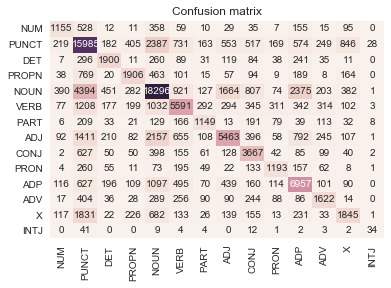

In [52]:
labels = list(set(pos_test))
print(classification_report(y_true, y_pred))
sns.heatmap(data=confusion_matrix(y_true, y_pred, labels = labels), annot=True, fmt="d", cbar=False, xticklabels=labels, yticklabels=labels)
plt.title("Confusion matrix")
plt.show()

In [53]:
accuracy_score(y_true, y_pred)

0.58522453344553427

### Тест на произвольном предложении

In [84]:
#left = []
#right = []
def make_windows(random_sent, k):
    windows_left = []
    windows_right = []
    
    for i, word in enumerate(random_sent):
        l, r = get_context(i, random_sent, k)
        #left.append(l)
        #right.append(r)
        if l == 0:
            windows_right.append(r)
        else:
            windows_left.append(l)
    return windows_left, windows_right
        

In [134]:
rand_sent = 'ежик резиновый шел и насвистывал дырочкой в правом боку'.split()

In [135]:
win_left, win_right = make_windows(rand_sent, 5)

In [136]:
print(win_left)
print(win_right)

['ежик резиновый шел', 'ежик резиновый шел и', 'ежик резиновый шел и насвистывал', 'резиновый шел и насвистывал дырочкой', 'шел и насвистывал дырочкой в', 'и насвистывал дырочкой в правом', 'насвистывал дырочкой в правом боку']
['дырочкой в правом боку', 'в правом боку']


In [119]:
texts = ['трава была зеленее', 'дни были слаще']

In [122]:
seq_left = tokenizer.texts_to_sequences(texts)
t_left = pad_sequences(seq_left, maxlen = 5, padding = 'post')

In [123]:
t_left

array([[ 9951,    54,     0,     0,     0],
       [  863,    44, 36353,     0,     0]])

In [137]:
sequences_left = tokenizer.texts_to_sequences(win_left)
X_test_left = pad_sequences(sequences_left, maxlen = 5, padding = 'pre')

sequences_right = tokenizer.texts_to_sequences(win_right)
X_test_right = pad_sequences(sequences_right, maxlen = 5, padding = 'post')

In [138]:
X_test = np.concatenate((X_test_left, X_test_right), axis = 0)

In [139]:
X_test

array([[    0,     0,     0, 58686,  7981],
       [    0,     0, 58686,  7981,     2],
       [    0,     0, 58686,  7981,     2],
       [    0,     0,     0,  7981,     2],
       [    0,     0,  7981,     2,     1],
       [    0,     0,     2,     1,  6071],
       [    0,     0,     0,     1,  6071],
       [    1,  6071,     0,     0,     0],
       [    1,  6071,     0,     0,     0]])

In [112]:
sequences_left

[[5834, 1, 5423],
 [5834, 1, 5423, 64109],
 [5834, 1, 5423, 64109, 12590],
 [1, 5423, 64109, 12590],
 [5423, 64109, 12590, 22],
 [64109, 12590, 22, 53390],
 [12590, 22, 53390]]

In [140]:
y_pred = model.predict_classes(X_test)
y_pred = le.inverse_transform(y_pred)

9/9 [==============================] - 0s


In [141]:
print(y_pred)

['NOUN' 'NOUN' 'NOUN' 'VERB' 'VERB' 'CONJ' 'PUNCT' 'PUNCT' 'PUNCT']


In [84]:
from collections import Counter

In [85]:
Counter(y_true)

Counter({'ADJ': 11854,
         'ADP': 10731,
         'ADV': 3261,
         'CONJ': 5419,
         'DET': 3222,
         'INTJ': 101,
         'NOUN': 30768,
         'NUM': 2496,
         'PART': 2221,
         'PRON': 2173,
         'PROPN': 3725,
         'PUNCT': 22593,
         'VERB': 10381,
         'X': 5409})

In [86]:
y_true[15]

'NOUN'

In [87]:
y_pred[15]

'NOUN'

### Часть 3 [1 балл] Оптимизация гиперпарметров

В эксперименте участвуют следующие гиперпараметры:
* $k$ – размер окна;
* $n_h$ – число нейронов на скрытом слое;
* $\theta$ – вид функции активации.

Оцените их влияние на качество модели. Как увеличение окна или числа нейронов влияет на итоговый показатель качества? Зависит ли итоговый показатель качества от функции активации на скрытом слое? 

### Попробуем уменьшить размер окна ###

In [109]:
LEN_WINDOW = 3 #задаем размер окна 
EMBEDDING_DIM = 300 #размерность векторов эмбеддингов

In [110]:
#построили окна для трейновских предложений
train_win_left, train_win_right, train_pos_left, train_pos_right = sents_to_windows(train, LEN_WINDOW)

In [111]:
#объединим левые и правые окна для токенайзера
train_all = train_win_left + train_win_right

In [112]:
#токенайзер можно не обучать второй раз, он не изменился от размера окна
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_all)#обучили токенайзер словам из трейна

sequences_left = tokenizer.texts_to_sequences(train_win_left)
X_train_left = pad_sequences(sequences_left, maxlen = LEN_WINDOW, padding = 'pre')

sequences_right = tokenizer.texts_to_sequences(train_win_right)
X_train_right = pad_sequences(sequences_right, maxlen = LEN_WINDOW, padding = 'post')

In [113]:
X_train = np.concatenate((X_train_left, X_train_right), axis = 0)

In [114]:
#объединяем левые и правые теги
pos_train = train_pos_left + train_pos_right

In [115]:
#кодируем теги трейна, чтобы подать на вход нейросети
le = LabelEncoder()
le.fit(pos_train)
y_train = np_utils.to_categorical(le.transform(pos_train), 14) #14 - число классов (частей речи)
#y_test = np_utils.to_categorical(le.transform(), 5)
#y_true = le.transform(test_corpus.topic)
print(y_train[0])

[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


In [116]:
#можно не делать второй раз
word_index = tokenizer.word_index
len(word_index)

65794

In [88]:
#можно не делать второй раз
embedding_matrix = np.zeros((len(word_index) + 1, EMBEDDING_DIM)) # +1 для символа pad
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

In [117]:
model = Sequential()

model.add(Embedding(len(word_index) + 1, #объем словаря + 1 символ для pad
                            EMBEDDING_DIM,
                            weights=[embedding_matrix],
                            input_length=LEN_WINDOW,
                            trainable=False))
model.add(Flatten()) #конкатенирует входные вектора эмбеддингов
model.add(Dense(64, activation = 'softmax'))
model.add(Dropout(0.1))
model.add(Dense(len(set(pos_train)), activation = 'softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [118]:
model.fit(X_train, y_train, epochs = 10, batch_size = 32,  validation_split = 0.1, verbose = 0)

Результаты

In [119]:
test_win_left, test_win_right, test_pos_left, test_pos_right = sents_to_windows(test, LEN_WINDOW)

In [120]:
sequences_left = tokenizer.texts_to_sequences(test_win_left)
X_test_left = pad_sequences(sequences_left, maxlen = LEN_WINDOW, padding = 'pre')

sequences_right = tokenizer.texts_to_sequences(test_win_right)
X_test_right = pad_sequences(sequences_right, maxlen = LEN_WINDOW, padding = 'post')

In [121]:
X_test = np.concatenate((X_test_left, X_test_right), axis = 0)

In [122]:
pos_test = test_pos_left + test_pos_right

In [123]:
y_true = pos_test

In [124]:
y_pred = model.predict_classes(X_test)
y_pred = le.inverse_transform(y_pred)

114144/114354 [============================>.] - ETA: 55 - ETA: 10 - ETA: 92s - ETA: 65 - ETA: 64 - ETA: 58 - ETA: 56 - ETA: 60 - ETA: 62 - ETA: 62 - ETA: 61 - ETA: 61 - ETA: 59 - ETA: 60 - ETA: 60 - ETA: 59 - ETA: 57 - ETA: 53 - ETA: 54 - ETA: 53 - ETA: 51 - ETA: 51 - ETA: 47 - ETA: 46 - ETA: 46 - ETA: 45 - ETA: 44 - ETA: 42 - ETA: 42 - ETA: 41 - ETA: 41 - ETA: 41 - ETA: 40 - ETA: 39 - ETA: 39 - ETA: 39 - ETA: 38 - ETA: 38 - ETA: 37 - ETA: 37 - ETA: 36 - ETA: 35 - ETA: 35 - ETA: 34 - ETA: 34 - ETA: 34 - ETA: 34 - ETA: 34 - ETA: 34 - ETA: 33 - ETA: 33 - ETA: 33 - ETA: 33 - ETA: 32 - ETA: 32 - ETA: 31 - ETA: 31 - ETA: 31 - ETA: 30 - ETA: 30 - ETA: 30 - ETA: 29 - ETA: 29 - ETA: 28 - ETA: 28 - ETA: 27 - ETA: 27 - ETA: 26 - ETA: 26 - ETA: 26 - ETA: 25 - ETA: 25 - ETA: 25 - ETA: 24 - ETA: 24 - ETA: 24 - ETA: 23 - ETA: 23 - ETA: 23 - ETA: 22 - ETA: 22 - ETA: 22 - ETA: 22 - ETA: 21 - ETA: 21 - ETA: 21 - ETA: 20 - ETA: 20 - ETA: 20 - ETA: 20 - ETA: 19 - ETA: 19 - ETA: 19 - ETA: 19 - ETA: 18 - 

C:\Program Files\Anaconda3\envs\mllecture\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

        ADJ       0.44      0.08      0.14     11854
        ADP       0.72      0.78      0.75     10731
        ADV       0.59      0.31      0.40      3261
       CONJ       0.64      0.80      0.71      5419
        DET       0.71      0.39      0.50      3222
       INTJ       0.00      0.00      0.00       101
       NOUN       0.42      0.70      0.53     30768
        NUM       0.59      0.40      0.47      2496
       PART       0.75      0.62      0.68      2221
       PRON       0.71      0.65      0.68      2173
      PROPN       0.90      0.01      0.02      3725
      PUNCT       0.47      0.58      0.52     22593
       VERB       0.50      0.25      0.34     10381
          X       0.39      0.05      0.09      5409

avg / total       0.52      0.50      0.46    114354



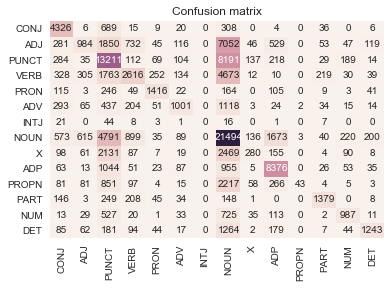

In [125]:
labels = list(set(pos_test))
print(classification_report(y_true, y_pred))
sns.heatmap(data=confusion_matrix(y_true, y_pred, labels = labels), annot=True, fmt="d", cbar=False, xticklabels=labels, yticklabels=labels)
plt.title("Confusion matrix")
plt.show()

### И увеличить число нейронов на скрытом слое ###

In [198]:
LEN_WINDOW = 5

In [199]:
train_win_left, train_win_right, train_pos_left, train_pos_right = sents_to_windows(train, LEN_WINDOW)

sequences_left = tokenizer.texts_to_sequences(train_win_left)
X_train_left = pad_sequences(sequences_left, maxlen = LEN_WINDOW, padding = 'pre')

sequences_right = tokenizer.texts_to_sequences(train_win_right)
X_train_right = pad_sequences(sequences_right, maxlen = LEN_WINDOW, padding = 'post')

X_train = np.concatenate((X_train_left, X_train_right), axis = 0)

In [200]:
pos_train = train_pos_left + train_pos_right

le = LabelEncoder()
le.fit(pos_train)
y_train = np_utils.to_categorical(le.transform(pos_train), 14)

In [201]:
model = Sequential()

model.add(Embedding(len(word_index) + 1, #объем словаря + 1 символ для pad
                            EMBEDDING_DIM,
                            weights=[embedding_matrix],
                            input_length=LEN_WINDOW,
                            trainable=False))
model.add(Flatten()) #конкатенирует входные вектора эмбеддингов
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(len(set(pos_train)), activation = 'softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [202]:
model.fit(X_train, y_train, epochs = 10, batch_size = 32,  validation_split = 0.1, verbose = 1)

Train on 308906 samples, validate on 34323 samples
Epoch 1/10


 21920/308906 [=>............................] - ETA: 14817s - loss: 2.6953 - acc: 0.0000e+0 - ETA: 3840s - loss: 2.6635 - acc: 0.0625    - ETA: 2645s - loss: 2.6352 - acc: 0.07 - ETA: 2047s - loss: 2.6144 - acc: 0.08 - ETA: 1882s - loss: 2.6164 - acc: 0.08 - ETA: 1591s - loss: 2.5938 - acc: 0.11 - ETA: 1387s - loss: 2.5741 - acc: 0.12 - ETA: 1238s - loss: 2.5648 - acc: 0.14 - ETA: 1199s - loss: 2.5610 - acc: 0.14 - ETA: 1096s - loss: 2.5420 - acc: 0.15 - ETA: 1064s - loss: 2.5324 - acc: 0.15 - ETA: 1035s - loss: 2.5283 - acc: 0.16 - ETA: 963s - loss: 2.5157 - acc: 0.1648 - ETA: 905s - loss: 2.5047 - acc: 0.170 - ETA: 890s - loss: 2.5044 - acc: 0.172 - ETA: 786s - loss: 2.4941 - acc: 0.177 - ETA: 752s - loss: 2.4710 - acc: 0.191 - ETA: 724s - loss: 2.4694 - acc: 0.193 - ETA: 699s - loss: 2.4609 - acc: 0.199 - ETA: 703s - loss: 2.4504 - acc: 0.204 - ETA: 697s - loss: 2.4420 - acc: 0.208 - ETA: 676s - loss: 2.4257 - acc: 0.213 - ETA: 672s - loss: 2.4289 - acc: 0.214 - ETA: 675s - loss: 2

116832/308906 [==========>...................] - ETA: 88s - loss: 1.7733 - acc: 0.42 - ETA: 88s - loss: 1.7730 - acc: 0.42 - ETA: 88s - loss: 1.7727 - acc: 0.42 - ETA: 88s - loss: 1.7723 - acc: 0.42 - ETA: 88s - loss: 1.7723 - acc: 0.42 - ETA: 88s - loss: 1.7719 - acc: 0.42 - ETA: 88s - loss: 1.7718 - acc: 0.42 - ETA: 88s - loss: 1.7716 - acc: 0.42 - ETA: 87s - loss: 1.7717 - acc: 0.42 - ETA: 87s - loss: 1.7714 - acc: 0.42 - ETA: 87s - loss: 1.7714 - acc: 0.42 - ETA: 87s - loss: 1.7710 - acc: 0.42 - ETA: 87s - loss: 1.7707 - acc: 0.42 - ETA: 87s - loss: 1.7704 - acc: 0.42 - ETA: 87s - loss: 1.7703 - acc: 0.42 - ETA: 87s - loss: 1.7700 - acc: 0.42 - ETA: 87s - loss: 1.7696 - acc: 0.42 - ETA: 87s - loss: 1.7698 - acc: 0.42 - ETA: 87s - loss: 1.7697 - acc: 0.42 - ETA: 87s - loss: 1.7695 - acc: 0.42 - ETA: 86s - loss: 1.7691 - acc: 0.42 - ETA: 86s - loss: 1.7692 - acc: 0.42 - ETA: 86s - loss: 1.7688 - acc: 0.42 - ETA: 86s - loss: 1.7687 - acc: 0.42 - ETA: 86s - loss: 1.7683 - acc: 0.42 - E

147904/308906 [=============>................] - ETA: 75s - loss: 1.7382 - acc: 0.43 - ETA: 75s - loss: 1.7379 - acc: 0.43 - ETA: 75s - loss: 1.7377 - acc: 0.43 - ETA: 75s - loss: 1.7375 - acc: 0.43 - ETA: 75s - loss: 1.7373 - acc: 0.43 - ETA: 75s - loss: 1.7370 - acc: 0.43 - ETA: 75s - loss: 1.7368 - acc: 0.43 - ETA: 75s - loss: 1.7367 - acc: 0.43 - ETA: 75s - loss: 1.7364 - acc: 0.43 - ETA: 75s - loss: 1.7361 - acc: 0.43 - ETA: 75s - loss: 1.7360 - acc: 0.43 - ETA: 74s - loss: 1.7360 - acc: 0.43 - ETA: 74s - loss: 1.7359 - acc: 0.43 - ETA: 74s - loss: 1.7357 - acc: 0.43 - ETA: 74s - loss: 1.7356 - acc: 0.43 - ETA: 74s - loss: 1.7356 - acc: 0.43 - ETA: 74s - loss: 1.7355 - acc: 0.43 - ETA: 74s - loss: 1.7354 - acc: 0.43 - ETA: 74s - loss: 1.7352 - acc: 0.43 - ETA: 74s - loss: 1.7352 - acc: 0.43 - ETA: 74s - loss: 1.7352 - acc: 0.43 - ETA: 74s - loss: 1.7349 - acc: 0.43 - ETA: 74s - loss: 1.7346 - acc: 0.43 - ETA: 74s - loss: 1.7345 - acc: 0.43 - ETA: 74s - loss: 1.7342 - acc: 0.43 - E

178592/308906 [================>.............] - ETA: 62s - loss: 1.7078 - acc: 0.44 - ETA: 62s - loss: 1.7077 - acc: 0.44 - ETA: 62s - loss: 1.7074 - acc: 0.44 - ETA: 62s - loss: 1.7072 - acc: 0.44 - ETA: 62s - loss: 1.7072 - acc: 0.44 - ETA: 62s - loss: 1.7073 - acc: 0.44 - ETA: 62s - loss: 1.7071 - acc: 0.44 - ETA: 62s - loss: 1.7070 - acc: 0.44 - ETA: 62s - loss: 1.7067 - acc: 0.44 - ETA: 62s - loss: 1.7068 - acc: 0.44 - ETA: 61s - loss: 1.7065 - acc: 0.44 - ETA: 61s - loss: 1.7063 - acc: 0.44 - ETA: 61s - loss: 1.7062 - acc: 0.44 - ETA: 61s - loss: 1.7060 - acc: 0.44 - ETA: 61s - loss: 1.7058 - acc: 0.44 - ETA: 61s - loss: 1.7057 - acc: 0.44 - ETA: 61s - loss: 1.7057 - acc: 0.44 - ETA: 61s - loss: 1.7056 - acc: 0.44 - ETA: 61s - loss: 1.7055 - acc: 0.44 - ETA: 61s - loss: 1.7053 - acc: 0.44 - ETA: 61s - loss: 1.7052 - acc: 0.44 - ETA: 61s - loss: 1.7050 - acc: 0.44 - ETA: 61s - loss: 1.7049 - acc: 0.44 - ETA: 61s - loss: 1.7045 - acc: 0.44 - ETA: 60s - loss: 1.7043 - acc: 0.44 - E

206560/308906 [===================>..........] - ETA: 50s - loss: 1.6864 - acc: 0.44 - ETA: 50s - loss: 1.6863 - acc: 0.44 - ETA: 50s - loss: 1.6862 - acc: 0.44 - ETA: 50s - loss: 1.6861 - acc: 0.44 - ETA: 50s - loss: 1.6859 - acc: 0.44 - ETA: 50s - loss: 1.6857 - acc: 0.44 - ETA: 50s - loss: 1.6856 - acc: 0.44 - ETA: 50s - loss: 1.6856 - acc: 0.44 - ETA: 50s - loss: 1.6855 - acc: 0.44 - ETA: 49s - loss: 1.6854 - acc: 0.44 - ETA: 49s - loss: 1.6853 - acc: 0.44 - ETA: 49s - loss: 1.6852 - acc: 0.44 - ETA: 49s - loss: 1.6850 - acc: 0.44 - ETA: 49s - loss: 1.6850 - acc: 0.44 - ETA: 49s - loss: 1.6850 - acc: 0.44 - ETA: 49s - loss: 1.6848 - acc: 0.44 - ETA: 49s - loss: 1.6848 - acc: 0.44 - ETA: 49s - loss: 1.6848 - acc: 0.44 - ETA: 49s - loss: 1.6849 - acc: 0.44 - ETA: 49s - loss: 1.6847 - acc: 0.44 - ETA: 49s - loss: 1.6846 - acc: 0.44 - ETA: 49s - loss: 1.6845 - acc: 0.44 - ETA: 49s - loss: 1.6844 - acc: 0.44 - ETA: 49s - loss: 1.6843 - acc: 0.44 - ETA: 49s - loss: 1.6842 - acc: 0.44 - E

229280/308906 [=====================>........] - ETA: 39s - loss: 1.6697 - acc: 0.45 - ETA: 39s - loss: 1.6696 - acc: 0.45 - ETA: 39s - loss: 1.6696 - acc: 0.45 - ETA: 39s - loss: 1.6696 - acc: 0.45 - ETA: 39s - loss: 1.6696 - acc: 0.45 - ETA: 39s - loss: 1.6696 - acc: 0.45 - ETA: 39s - loss: 1.6695 - acc: 0.45 - ETA: 39s - loss: 1.6693 - acc: 0.45 - ETA: 39s - loss: 1.6693 - acc: 0.45 - ETA: 39s - loss: 1.6693 - acc: 0.45 - ETA: 39s - loss: 1.6692 - acc: 0.45 - ETA: 39s - loss: 1.6692 - acc: 0.45 - ETA: 39s - loss: 1.6691 - acc: 0.45 - ETA: 39s - loss: 1.6690 - acc: 0.45 - ETA: 39s - loss: 1.6691 - acc: 0.45 - ETA: 39s - loss: 1.6690 - acc: 0.45 - ETA: 39s - loss: 1.6689 - acc: 0.45 - ETA: 39s - loss: 1.6688 - acc: 0.45 - ETA: 39s - loss: 1.6688 - acc: 0.45 - ETA: 39s - loss: 1.6687 - acc: 0.45 - ETA: 39s - loss: 1.6686 - acc: 0.45 - ETA: 39s - loss: 1.6686 - acc: 0.45 - ETA: 39s - loss: 1.6686 - acc: 0.45 - ETA: 39s - loss: 1.6685 - acc: 0.45 - ETA: 39s - loss: 1.6684 - acc: 0.45 - E

256608/308906 [=======================>......] - ETA: 32s - loss: 1.6583 - acc: 0.45 - ETA: 32s - loss: 1.6583 - acc: 0.45 - ETA: 32s - loss: 1.6582 - acc: 0.45 - ETA: 32s - loss: 1.6581 - acc: 0.45 - ETA: 32s - loss: 1.6581 - acc: 0.45 - ETA: 31s - loss: 1.6581 - acc: 0.45 - ETA: 31s - loss: 1.6581 - acc: 0.45 - ETA: 31s - loss: 1.6581 - acc: 0.45 - ETA: 31s - loss: 1.6580 - acc: 0.45 - ETA: 31s - loss: 1.6579 - acc: 0.45 - ETA: 31s - loss: 1.6579 - acc: 0.45 - ETA: 31s - loss: 1.6579 - acc: 0.45 - ETA: 31s - loss: 1.6579 - acc: 0.45 - ETA: 31s - loss: 1.6579 - acc: 0.45 - ETA: 31s - loss: 1.6578 - acc: 0.45 - ETA: 31s - loss: 1.6578 - acc: 0.45 - ETA: 31s - loss: 1.6577 - acc: 0.45 - ETA: 31s - loss: 1.6575 - acc: 0.45 - ETA: 31s - loss: 1.6575 - acc: 0.45 - ETA: 31s - loss: 1.6575 - acc: 0.45 - ETA: 31s - loss: 1.6575 - acc: 0.45 - ETA: 31s - loss: 1.6574 - acc: 0.45 - ETA: 31s - loss: 1.6574 - acc: 0.45 - ETA: 31s - loss: 1.6573 - acc: 0.45 - ETA: 31s - loss: 1.6573 - acc: 0.45 - E

281472/308906 [==========================>...] - ETA: 21s - loss: 1.6478 - acc: 0.45 - ETA: 21s - loss: 1.6477 - acc: 0.45 - ETA: 21s - loss: 1.6477 - acc: 0.45 - ETA: 21s - loss: 1.6477 - acc: 0.45 - ETA: 21s - loss: 1.6477 - acc: 0.45 - ETA: 21s - loss: 1.6477 - acc: 0.45 - ETA: 20s - loss: 1.6476 - acc: 0.45 - ETA: 20s - loss: 1.6475 - acc: 0.45 - ETA: 20s - loss: 1.6474 - acc: 0.45 - ETA: 20s - loss: 1.6473 - acc: 0.45 - ETA: 20s - loss: 1.6474 - acc: 0.45 - ETA: 20s - loss: 1.6473 - acc: 0.45 - ETA: 20s - loss: 1.6472 - acc: 0.45 - ETA: 20s - loss: 1.6472 - acc: 0.45 - ETA: 20s - loss: 1.6471 - acc: 0.45 - ETA: 20s - loss: 1.6471 - acc: 0.45 - ETA: 20s - loss: 1.6471 - acc: 0.45 - ETA: 20s - loss: 1.6470 - acc: 0.45 - ETA: 20s - loss: 1.6469 - acc: 0.45 - ETA: 20s - loss: 1.6469 - acc: 0.45 - ETA: 20s - loss: 1.6469 - acc: 0.45 - ETA: 20s - loss: 1.6469 - acc: 0.45 - ETA: 20s - loss: 1.6469 - acc: 0.45 - ETA: 20s - loss: 1.6468 - acc: 0.45 - ETA: 20s - loss: 1.6468 - acc: 0.45 - E

308906/308906 [==============================] - ETA: 11s - loss: 1.6387 - acc: 0.46 - ETA: 11s - loss: 1.6388 - acc: 0.46 - ETA: 11s - loss: 1.6387 - acc: 0.46 - ETA: 11s - loss: 1.6386 - acc: 0.46 - ETA: 10s - loss: 1.6386 - acc: 0.46 - ETA: 10s - loss: 1.6386 - acc: 0.46 - ETA: 10s - loss: 1.6385 - acc: 0.46 - ETA: 10s - loss: 1.6384 - acc: 0.46 - ETA: 10s - loss: 1.6384 - acc: 0.46 - ETA: 10s - loss: 1.6384 - acc: 0.46 - ETA: 10s - loss: 1.6384 - acc: 0.46 - ETA: 10s - loss: 1.6383 - acc: 0.46 - ETA: 10s - loss: 1.6383 - acc: 0.46 - ETA: 10s - loss: 1.6383 - acc: 0.46 - ETA: 10s - loss: 1.6382 - acc: 0.46 - ETA: 10s - loss: 1.6380 - acc: 0.46 - ETA: 10s - loss: 1.6378 - acc: 0.46 - ETA: 10s - loss: 1.6377 - acc: 0.46 - ETA: 10s - loss: 1.6376 - acc: 0.46 - ETA: 9s - loss: 1.6376 - acc: 0.4603 - ETA: 9s - loss: 1.6375 - acc: 0.460 - ETA: 9s - loss: 1.6374 - acc: 0.460 - ETA: 9s - loss: 1.6374 - acc: 0.460 - ETA: 9s - loss: 1.6373 - acc: 0.460 - ETA: 9s - loss: 1.6372 - acc: 0.460 - 

 43008/308906 [===>..........................] - ETA: 270s - loss: 1.4249 - acc: 0.531 - ETA: 95s - loss: 1.4797 - acc: 0.523 - ETA: 85s - loss: 1.5273 - acc: 0.53 - ETA: 85s - loss: 1.5280 - acc: 0.53 - ETA: 89s - loss: 1.5375 - acc: 0.52 - ETA: 90s - loss: 1.5290 - acc: 0.51 - ETA: 91s - loss: 1.5215 - acc: 0.52 - ETA: 90s - loss: 1.5243 - acc: 0.51 - ETA: 89s - loss: 1.5175 - acc: 0.51 - ETA: 88s - loss: 1.5043 - acc: 0.51 - ETA: 87s - loss: 1.4979 - acc: 0.51 - ETA: 87s - loss: 1.4932 - acc: 0.51 - ETA: 86s - loss: 1.4883 - acc: 0.51 - ETA: 86s - loss: 1.4848 - acc: 0.51 - ETA: 86s - loss: 1.4802 - acc: 0.51 - ETA: 87s - loss: 1.4735 - acc: 0.52 - ETA: 86s - loss: 1.4791 - acc: 0.51 - ETA: 85s - loss: 1.4835 - acc: 0.51 - ETA: 84s - loss: 1.4753 - acc: 0.51 - ETA: 84s - loss: 1.4775 - acc: 0.51 - ETA: 84s - loss: 1.4756 - acc: 0.51 - ETA: 84s - loss: 1.4831 - acc: 0.51 - ETA: 84s - loss: 1.4822 - acc: 0.51 - ETA: 84s - loss: 1.4843 - acc: 0.50 - ETA: 84s - loss: 1.4888 - acc: 0.50 

161440/308906 [==============>...............] - ETA: 43s - loss: 1.4876 - acc: 0.49 - ETA: 43s - loss: 1.4877 - acc: 0.49 - ETA: 43s - loss: 1.4877 - acc: 0.49 - ETA: 43s - loss: 1.4880 - acc: 0.49 - ETA: 43s - loss: 1.4879 - acc: 0.49 - ETA: 43s - loss: 1.4879 - acc: 0.49 - ETA: 43s - loss: 1.4879 - acc: 0.49 - ETA: 43s - loss: 1.4879 - acc: 0.49 - ETA: 43s - loss: 1.4876 - acc: 0.49 - ETA: 43s - loss: 1.4875 - acc: 0.49 - ETA: 43s - loss: 1.4877 - acc: 0.49 - ETA: 43s - loss: 1.4878 - acc: 0.49 - ETA: 43s - loss: 1.4877 - acc: 0.49 - ETA: 43s - loss: 1.4876 - acc: 0.49 - ETA: 43s - loss: 1.4875 - acc: 0.49 - ETA: 43s - loss: 1.4876 - acc: 0.49 - ETA: 43s - loss: 1.4875 - acc: 0.49 - ETA: 43s - loss: 1.4874 - acc: 0.49 - ETA: 43s - loss: 1.4873 - acc: 0.49 - ETA: 43s - loss: 1.4872 - acc: 0.49 - ETA: 43s - loss: 1.4872 - acc: 0.49 - ETA: 43s - loss: 1.4871 - acc: 0.49 - ETA: 43s - loss: 1.4871 - acc: 0.49 - ETA: 43s - loss: 1.4872 - acc: 0.49 - ETA: 43s - loss: 1.4872 - acc: 0.49 - E

193248/308906 [=================>............] - ETA: 42s - loss: 1.4844 - acc: 0.49 - ETA: 42s - loss: 1.4844 - acc: 0.49 - ETA: 42s - loss: 1.4844 - acc: 0.49 - ETA: 42s - loss: 1.4843 - acc: 0.49 - ETA: 42s - loss: 1.4845 - acc: 0.49 - ETA: 42s - loss: 1.4844 - acc: 0.49 - ETA: 42s - loss: 1.4844 - acc: 0.49 - ETA: 42s - loss: 1.4845 - acc: 0.49 - ETA: 42s - loss: 1.4844 - acc: 0.49 - ETA: 42s - loss: 1.4845 - acc: 0.49 - ETA: 42s - loss: 1.4844 - acc: 0.49 - ETA: 42s - loss: 1.4843 - acc: 0.49 - ETA: 42s - loss: 1.4843 - acc: 0.49 - ETA: 42s - loss: 1.4843 - acc: 0.49 - ETA: 42s - loss: 1.4843 - acc: 0.49 - ETA: 42s - loss: 1.4844 - acc: 0.49 - ETA: 42s - loss: 1.4843 - acc: 0.49 - ETA: 42s - loss: 1.4844 - acc: 0.49 - ETA: 42s - loss: 1.4844 - acc: 0.49 - ETA: 42s - loss: 1.4844 - acc: 0.49 - ETA: 42s - loss: 1.4844 - acc: 0.49 - ETA: 42s - loss: 1.4843 - acc: 0.49 - ETA: 42s - loss: 1.4843 - acc: 0.49 - ETA: 42s - loss: 1.4843 - acc: 0.49 - ETA: 42s - loss: 1.4844 - acc: 0.49 - E

232320/308906 [=====================>........] - ETA: 34s - loss: 1.4830 - acc: 0.49 - ETA: 34s - loss: 1.4830 - acc: 0.49 - ETA: 34s - loss: 1.4830 - acc: 0.49 - ETA: 34s - loss: 1.4829 - acc: 0.49 - ETA: 34s - loss: 1.4829 - acc: 0.49 - ETA: 34s - loss: 1.4830 - acc: 0.49 - ETA: 34s - loss: 1.4830 - acc: 0.49 - ETA: 34s - loss: 1.4831 - acc: 0.49 - ETA: 34s - loss: 1.4832 - acc: 0.49 - ETA: 34s - loss: 1.4832 - acc: 0.49 - ETA: 34s - loss: 1.4832 - acc: 0.49 - ETA: 34s - loss: 1.4831 - acc: 0.49 - ETA: 34s - loss: 1.4832 - acc: 0.49 - ETA: 34s - loss: 1.4830 - acc: 0.49 - ETA: 34s - loss: 1.4830 - acc: 0.49 - ETA: 34s - loss: 1.4829 - acc: 0.49 - ETA: 34s - loss: 1.4829 - acc: 0.49 - ETA: 34s - loss: 1.4830 - acc: 0.49 - ETA: 34s - loss: 1.4830 - acc: 0.49 - ETA: 34s - loss: 1.4830 - acc: 0.49 - ETA: 34s - loss: 1.4831 - acc: 0.49 - ETA: 33s - loss: 1.4831 - acc: 0.49 - ETA: 33s - loss: 1.4831 - acc: 0.49 - ETA: 33s - loss: 1.4830 - acc: 0.49 - ETA: 33s - loss: 1.4831 - acc: 0.49 - E

272032/308906 [=========================>....] - ETA: 22s - loss: 1.4814 - acc: 0.49 - ETA: 22s - loss: 1.4814 - acc: 0.49 - ETA: 22s - loss: 1.4814 - acc: 0.49 - ETA: 22s - loss: 1.4813 - acc: 0.49 - ETA: 22s - loss: 1.4812 - acc: 0.49 - ETA: 22s - loss: 1.4812 - acc: 0.49 - ETA: 22s - loss: 1.4813 - acc: 0.49 - ETA: 22s - loss: 1.4813 - acc: 0.49 - ETA: 22s - loss: 1.4812 - acc: 0.49 - ETA: 22s - loss: 1.4811 - acc: 0.49 - ETA: 22s - loss: 1.4810 - acc: 0.49 - ETA: 22s - loss: 1.4811 - acc: 0.49 - ETA: 22s - loss: 1.4812 - acc: 0.49 - ETA: 22s - loss: 1.4812 - acc: 0.49 - ETA: 22s - loss: 1.4812 - acc: 0.49 - ETA: 21s - loss: 1.4810 - acc: 0.49 - ETA: 21s - loss: 1.4811 - acc: 0.49 - ETA: 21s - loss: 1.4810 - acc: 0.49 - ETA: 21s - loss: 1.4810 - acc: 0.49 - ETA: 21s - loss: 1.4809 - acc: 0.49 - ETA: 21s - loss: 1.4809 - acc: 0.49 - ETA: 21s - loss: 1.4809 - acc: 0.49 - ETA: 21s - loss: 1.4809 - acc: 0.49 - ETA: 21s - loss: 1.4809 - acc: 0.49 - ETA: 21s - loss: 1.4809 - acc: 0.49 - E

308906/308906 [==============================] - ETA: 10s - loss: 1.4798 - acc: 0.49 - ETA: 10s - loss: 1.4798 - acc: 0.49 - ETA: 10s - loss: 1.4798 - acc: 0.49 - ETA: 10s - loss: 1.4797 - acc: 0.49 - ETA: 10s - loss: 1.4797 - acc: 0.49 - ETA: 10s - loss: 1.4797 - acc: 0.49 - ETA: 10s - loss: 1.4796 - acc: 0.49 - ETA: 10s - loss: 1.4796 - acc: 0.49 - ETA: 10s - loss: 1.4797 - acc: 0.49 - ETA: 10s - loss: 1.4797 - acc: 0.49 - ETA: 10s - loss: 1.4797 - acc: 0.49 - ETA: 10s - loss: 1.4796 - acc: 0.49 - ETA: 10s - loss: 1.4796 - acc: 0.49 - ETA: 10s - loss: 1.4796 - acc: 0.49 - ETA: 10s - loss: 1.4796 - acc: 0.49 - ETA: 10s - loss: 1.4795 - acc: 0.49 - ETA: 10s - loss: 1.4795 - acc: 0.49 - ETA: 10s - loss: 1.4797 - acc: 0.49 - ETA: 10s - loss: 1.4796 - acc: 0.49 - ETA: 9s - loss: 1.4796 - acc: 0.4997 - ETA: 9s - loss: 1.4796 - acc: 0.499 - ETA: 9s - loss: 1.4795 - acc: 0.499 - ETA: 9s - loss: 1.4795 - acc: 0.499 - ETA: 9s - loss: 1.4796 - acc: 0.499 - ETA: 9s - loss: 1.4795 - acc: 0.499 - 

 40608/308906 [==>...........................] - ETA: 289s - loss: 1.7384 - acc: 0.468 - ETA: 111s - loss: 1.4553 - acc: 0.517 - ETA: 92s - loss: 1.4987 - acc: 0.484 - ETA: 94s - loss: 1.5179 - acc: 0.47 - ETA: 94s - loss: 1.5155 - acc: 0.47 - ETA: 95s - loss: 1.5107 - acc: 0.47 - ETA: 93s - loss: 1.4954 - acc: 0.48 - ETA: 92s - loss: 1.4872 - acc: 0.49 - ETA: 92s - loss: 1.4743 - acc: 0.50 - ETA: 94s - loss: 1.4661 - acc: 0.50 - ETA: 95s - loss: 1.4626 - acc: 0.50 - ETA: 93s - loss: 1.4618 - acc: 0.50 - ETA: 92s - loss: 1.4499 - acc: 0.51 - ETA: 91s - loss: 1.4583 - acc: 0.50 - ETA: 93s - loss: 1.4601 - acc: 0.50 - ETA: 92s - loss: 1.4541 - acc: 0.51 - ETA: 92s - loss: 1.4450 - acc: 0.51 - ETA: 92s - loss: 1.4321 - acc: 0.51 - ETA: 92s - loss: 1.4359 - acc: 0.51 - ETA: 92s - loss: 1.4338 - acc: 0.51 - ETA: 92s - loss: 1.4313 - acc: 0.51 - ETA: 92s - loss: 1.4345 - acc: 0.51 - ETA: 93s - loss: 1.4339 - acc: 0.51 - ETA: 92s - loss: 1.4332 - acc: 0.51 - ETA: 92s - loss: 1.4279 - acc: 0.5

189344/308906 [=================>............] - ETA: 40s - loss: 1.4225 - acc: 0.51 - ETA: 40s - loss: 1.4224 - acc: 0.51 - ETA: 40s - loss: 1.4223 - acc: 0.51 - ETA: 39s - loss: 1.4224 - acc: 0.51 - ETA: 39s - loss: 1.4226 - acc: 0.51 - ETA: 39s - loss: 1.4227 - acc: 0.51 - ETA: 39s - loss: 1.4227 - acc: 0.51 - ETA: 39s - loss: 1.4225 - acc: 0.51 - ETA: 39s - loss: 1.4224 - acc: 0.51 - ETA: 39s - loss: 1.4224 - acc: 0.51 - ETA: 39s - loss: 1.4225 - acc: 0.51 - ETA: 39s - loss: 1.4224 - acc: 0.51 - ETA: 39s - loss: 1.4224 - acc: 0.51 - ETA: 39s - loss: 1.4226 - acc: 0.51 - ETA: 39s - loss: 1.4225 - acc: 0.51 - ETA: 39s - loss: 1.4226 - acc: 0.51 - ETA: 39s - loss: 1.4228 - acc: 0.51 - ETA: 39s - loss: 1.4229 - acc: 0.51 - ETA: 38s - loss: 1.4228 - acc: 0.51 - ETA: 38s - loss: 1.4228 - acc: 0.51 - ETA: 38s - loss: 1.4228 - acc: 0.51 - ETA: 38s - loss: 1.4229 - acc: 0.51 - ETA: 38s - loss: 1.4228 - acc: 0.51 - ETA: 38s - loss: 1.4226 - acc: 0.51 - ETA: 38s - loss: 1.4226 - acc: 0.51 - E

234976/308906 [=====================>........] - ETA: 28s - loss: 1.4214 - acc: 0.51 - ETA: 28s - loss: 1.4215 - acc: 0.51 - ETA: 28s - loss: 1.4215 - acc: 0.51 - ETA: 28s - loss: 1.4214 - acc: 0.51 - ETA: 28s - loss: 1.4215 - acc: 0.51 - ETA: 28s - loss: 1.4216 - acc: 0.51 - ETA: 28s - loss: 1.4215 - acc: 0.51 - ETA: 28s - loss: 1.4215 - acc: 0.51 - ETA: 28s - loss: 1.4216 - acc: 0.51 - ETA: 28s - loss: 1.4216 - acc: 0.51 - ETA: 27s - loss: 1.4215 - acc: 0.51 - ETA: 27s - loss: 1.4215 - acc: 0.51 - ETA: 27s - loss: 1.4215 - acc: 0.51 - ETA: 27s - loss: 1.4214 - acc: 0.51 - ETA: 27s - loss: 1.4213 - acc: 0.51 - ETA: 27s - loss: 1.4213 - acc: 0.51 - ETA: 27s - loss: 1.4214 - acc: 0.51 - ETA: 27s - loss: 1.4215 - acc: 0.51 - ETA: 27s - loss: 1.4215 - acc: 0.51 - ETA: 27s - loss: 1.4215 - acc: 0.51 - ETA: 27s - loss: 1.4215 - acc: 0.51 - ETA: 27s - loss: 1.4215 - acc: 0.51 - ETA: 27s - loss: 1.4216 - acc: 0.51 - ETA: 27s - loss: 1.4216 - acc: 0.51 - ETA: 27s - loss: 1.4217 - acc: 0.51 - E

276032/308906 [=========================>....] - ETA: 17s - loss: 1.4234 - acc: 0.51 - ETA: 17s - loss: 1.4233 - acc: 0.51 - ETA: 17s - loss: 1.4234 - acc: 0.51 - ETA: 17s - loss: 1.4234 - acc: 0.51 - ETA: 17s - loss: 1.4235 - acc: 0.51 - ETA: 17s - loss: 1.4234 - acc: 0.51 - ETA: 17s - loss: 1.4233 - acc: 0.51 - ETA: 17s - loss: 1.4232 - acc: 0.51 - ETA: 17s - loss: 1.4231 - acc: 0.51 - ETA: 17s - loss: 1.4231 - acc: 0.51 - ETA: 17s - loss: 1.4232 - acc: 0.51 - ETA: 17s - loss: 1.4232 - acc: 0.51 - ETA: 17s - loss: 1.4232 - acc: 0.51 - ETA: 17s - loss: 1.4233 - acc: 0.51 - ETA: 17s - loss: 1.4233 - acc: 0.51 - ETA: 17s - loss: 1.4233 - acc: 0.51 - ETA: 16s - loss: 1.4233 - acc: 0.51 - ETA: 16s - loss: 1.4233 - acc: 0.51 - ETA: 16s - loss: 1.4234 - acc: 0.51 - ETA: 16s - loss: 1.4234 - acc: 0.51 - ETA: 16s - loss: 1.4234 - acc: 0.51 - ETA: 16s - loss: 1.4234 - acc: 0.51 - ETA: 16s - loss: 1.4234 - acc: 0.51 - ETA: 16s - loss: 1.4235 - acc: 0.51 - ETA: 16s - loss: 1.4235 - acc: 0.51 - E

308906/308906 [==============================] - ETA: 8s - loss: 1.4252 - acc: 0.513 - ETA: 7s - loss: 1.4252 - acc: 0.513 - ETA: 7s - loss: 1.4251 - acc: 0.513 - ETA: 7s - loss: 1.4252 - acc: 0.513 - ETA: 7s - loss: 1.4252 - acc: 0.513 - ETA: 7s - loss: 1.4252 - acc: 0.513 - ETA: 7s - loss: 1.4251 - acc: 0.513 - ETA: 7s - loss: 1.4252 - acc: 0.513 - ETA: 7s - loss: 1.4252 - acc: 0.513 - ETA: 7s - loss: 1.4252 - acc: 0.513 - ETA: 7s - loss: 1.4252 - acc: 0.513 - ETA: 7s - loss: 1.4251 - acc: 0.513 - ETA: 7s - loss: 1.4252 - acc: 0.513 - ETA: 7s - loss: 1.4253 - acc: 0.513 - ETA: 7s - loss: 1.4252 - acc: 0.513 - ETA: 7s - loss: 1.4251 - acc: 0.513 - ETA: 7s - loss: 1.4251 - acc: 0.513 - ETA: 7s - loss: 1.4250 - acc: 0.513 - ETA: 7s - loss: 1.4250 - acc: 0.513 - ETA: 7s - loss: 1.4250 - acc: 0.513 - ETA: 7s - loss: 1.4250 - acc: 0.513 - ETA: 7s - loss: 1.4251 - acc: 0.513 - ETA: 6s - loss: 1.4250 - acc: 0.513 - ETA: 6s - loss: 1.4249 - acc: 0.513 - ETA: 6s - loss: 1.4250 - acc: 0.513 - E

 42784/308906 [===>..........................] - ETA: 328s - loss: 1.8698 - acc: 0.343 - ETA: 101s - loss: 1.4643 - acc: 0.488 - ETA: 92s - loss: 1.4283 - acc: 0.515 - ETA: 89s - loss: 1.4077 - acc: 0.52 - ETA: 87s - loss: 1.3696 - acc: 0.53 - ETA: 85s - loss: 1.3976 - acc: 0.52 - ETA: 84s - loss: 1.3922 - acc: 0.52 - ETA: 83s - loss: 1.3776 - acc: 0.53 - ETA: 83s - loss: 1.3799 - acc: 0.53 - ETA: 82s - loss: 1.3792 - acc: 0.53 - ETA: 82s - loss: 1.3861 - acc: 0.52 - ETA: 81s - loss: 1.3877 - acc: 0.52 - ETA: 81s - loss: 1.3835 - acc: 0.52 - ETA: 81s - loss: 1.3919 - acc: 0.52 - ETA: 80s - loss: 1.3754 - acc: 0.53 - ETA: 80s - loss: 1.3747 - acc: 0.53 - ETA: 80s - loss: 1.3827 - acc: 0.52 - ETA: 80s - loss: 1.3803 - acc: 0.53 - ETA: 80s - loss: 1.3859 - acc: 0.52 - ETA: 79s - loss: 1.3832 - acc: 0.52 - ETA: 79s - loss: 1.3852 - acc: 0.52 - ETA: 79s - loss: 1.3750 - acc: 0.52 - ETA: 78s - loss: 1.3798 - acc: 0.52 - ETA: 78s - loss: 1.3769 - acc: 0.52 - ETA: 78s - loss: 1.3789 - acc: 0.5

193824/308906 [=================>............] - ETA: 38s - loss: 1.3858 - acc: 0.52 - ETA: 38s - loss: 1.3858 - acc: 0.52 - ETA: 38s - loss: 1.3859 - acc: 0.52 - ETA: 38s - loss: 1.3857 - acc: 0.52 - ETA: 38s - loss: 1.3857 - acc: 0.52 - ETA: 38s - loss: 1.3856 - acc: 0.52 - ETA: 38s - loss: 1.3856 - acc: 0.52 - ETA: 38s - loss: 1.3855 - acc: 0.52 - ETA: 38s - loss: 1.3856 - acc: 0.52 - ETA: 38s - loss: 1.3854 - acc: 0.52 - ETA: 38s - loss: 1.3853 - acc: 0.52 - ETA: 37s - loss: 1.3853 - acc: 0.52 - ETA: 37s - loss: 1.3852 - acc: 0.52 - ETA: 37s - loss: 1.3852 - acc: 0.52 - ETA: 37s - loss: 1.3854 - acc: 0.52 - ETA: 37s - loss: 1.3854 - acc: 0.52 - ETA: 37s - loss: 1.3853 - acc: 0.52 - ETA: 37s - loss: 1.3853 - acc: 0.52 - ETA: 37s - loss: 1.3853 - acc: 0.52 - ETA: 37s - loss: 1.3852 - acc: 0.52 - ETA: 37s - loss: 1.3852 - acc: 0.52 - ETA: 37s - loss: 1.3853 - acc: 0.52 - ETA: 37s - loss: 1.3852 - acc: 0.52 - ETA: 37s - loss: 1.3852 - acc: 0.52 - ETA: 37s - loss: 1.3854 - acc: 0.52 - E

245280/308906 [======================>.......] - ETA: 26s - loss: 1.3899 - acc: 0.52 - ETA: 26s - loss: 1.3898 - acc: 0.52 - ETA: 26s - loss: 1.3898 - acc: 0.52 - ETA: 26s - loss: 1.3899 - acc: 0.52 - ETA: 26s - loss: 1.3899 - acc: 0.52 - ETA: 26s - loss: 1.3897 - acc: 0.52 - ETA: 26s - loss: 1.3897 - acc: 0.52 - ETA: 26s - loss: 1.3897 - acc: 0.52 - ETA: 26s - loss: 1.3898 - acc: 0.52 - ETA: 26s - loss: 1.3899 - acc: 0.52 - ETA: 26s - loss: 1.3898 - acc: 0.52 - ETA: 26s - loss: 1.3898 - acc: 0.52 - ETA: 26s - loss: 1.3897 - acc: 0.52 - ETA: 25s - loss: 1.3899 - acc: 0.52 - ETA: 25s - loss: 1.3901 - acc: 0.52 - ETA: 25s - loss: 1.3899 - acc: 0.52 - ETA: 25s - loss: 1.3900 - acc: 0.52 - ETA: 25s - loss: 1.3901 - acc: 0.52 - ETA: 25s - loss: 1.3902 - acc: 0.52 - ETA: 25s - loss: 1.3902 - acc: 0.52 - ETA: 25s - loss: 1.3904 - acc: 0.52 - ETA: 25s - loss: 1.3904 - acc: 0.52 - ETA: 25s - loss: 1.3904 - acc: 0.52 - ETA: 25s - loss: 1.3905 - acc: 0.52 - ETA: 25s - loss: 1.3905 - acc: 0.52 - E

290112/308906 [===========================>..] - ETA: 14s - loss: 1.3904 - acc: 0.52 - ETA: 14s - loss: 1.3904 - acc: 0.52 - ETA: 14s - loss: 1.3905 - acc: 0.52 - ETA: 14s - loss: 1.3904 - acc: 0.52 - ETA: 14s - loss: 1.3905 - acc: 0.52 - ETA: 14s - loss: 1.3905 - acc: 0.52 - ETA: 14s - loss: 1.3905 - acc: 0.52 - ETA: 14s - loss: 1.3905 - acc: 0.52 - ETA: 14s - loss: 1.3904 - acc: 0.52 - ETA: 14s - loss: 1.3905 - acc: 0.52 - ETA: 13s - loss: 1.3905 - acc: 0.52 - ETA: 13s - loss: 1.3906 - acc: 0.52 - ETA: 13s - loss: 1.3905 - acc: 0.52 - ETA: 13s - loss: 1.3905 - acc: 0.52 - ETA: 13s - loss: 1.3906 - acc: 0.52 - ETA: 13s - loss: 1.3905 - acc: 0.52 - ETA: 13s - loss: 1.3905 - acc: 0.52 - ETA: 13s - loss: 1.3907 - acc: 0.52 - ETA: 13s - loss: 1.3906 - acc: 0.52 - ETA: 13s - loss: 1.3906 - acc: 0.52 - ETA: 13s - loss: 1.3906 - acc: 0.52 - ETA: 13s - loss: 1.3906 - acc: 0.52 - ETA: 13s - loss: 1.3906 - acc: 0.52 - ETA: 13s - loss: 1.3907 - acc: 0.52 - ETA: 13s - loss: 1.3907 - acc: 0.52 - E

308906/308906 [==============================] - ETA: 4s - loss: 1.3927 - acc: 0.522 - ETA: 4s - loss: 1.3926 - acc: 0.522 - ETA: 4s - loss: 1.3927 - acc: 0.522 - ETA: 4s - loss: 1.3927 - acc: 0.521 - ETA: 4s - loss: 1.3927 - acc: 0.522 - ETA: 4s - loss: 1.3927 - acc: 0.522 - ETA: 4s - loss: 1.3928 - acc: 0.522 - ETA: 4s - loss: 1.3928 - acc: 0.521 - ETA: 4s - loss: 1.3927 - acc: 0.521 - ETA: 4s - loss: 1.3928 - acc: 0.521 - ETA: 4s - loss: 1.3928 - acc: 0.521 - ETA: 3s - loss: 1.3929 - acc: 0.521 - ETA: 3s - loss: 1.3929 - acc: 0.521 - ETA: 3s - loss: 1.3929 - acc: 0.521 - ETA: 3s - loss: 1.3928 - acc: 0.521 - ETA: 3s - loss: 1.3928 - acc: 0.522 - ETA: 3s - loss: 1.3928 - acc: 0.522 - ETA: 3s - loss: 1.3928 - acc: 0.522 - ETA: 10s - loss: 1.3927 - acc: 0.52 - ETA: 10s - loss: 1.3926 - acc: 0.52 - ETA: 10s - loss: 1.3926 - acc: 0.52 - ETA: 10s - loss: 1.3926 - acc: 0.52 - ETA: 10s - loss: 1.3927 - acc: 0.52 - ETA: 10s - loss: 1.3927 - acc: 0.52 - ETA: 10s - loss: 1.3927 - acc: 0.52 - E

 22688/308906 [=>............................] - ETA: 1119s - loss: 1.6103 - acc: 0.40 - ETA: 417s - loss: 1.4899 - acc: 0.4688 - ETA: 276s - loss: 1.4110 - acc: 0.507 - ETA: 291s - loss: 1.4162 - acc: 0.506 - ETA: 292s - loss: 1.4368 - acc: 0.505 - ETA: 286s - loss: 1.4213 - acc: 0.497 - ETA: 265s - loss: 1.3834 - acc: 0.512 - ETA: 253s - loss: 1.3598 - acc: 0.525 - ETA: 233s - loss: 1.3728 - acc: 0.527 - ETA: 217s - loss: 1.3884 - acc: 0.516 - ETA: 201s - loss: 1.3737 - acc: 0.525 - ETA: 199s - loss: 1.3689 - acc: 0.526 - ETA: 196s - loss: 1.3729 - acc: 0.527 - ETA: 195s - loss: 1.3700 - acc: 0.527 - ETA: 193s - loss: 1.3600 - acc: 0.532 - ETA: 195s - loss: 1.3558 - acc: 0.533 - ETA: 197s - loss: 1.3619 - acc: 0.530 - ETA: 196s - loss: 1.3591 - acc: 0.531 - ETA: 200s - loss: 1.3532 - acc: 0.534 - ETA: 203s - loss: 1.3568 - acc: 0.534 - ETA: 205s - loss: 1.3507 - acc: 0.537 - ETA: 210s - loss: 1.3521 - acc: 0.537 - ETA: 208s - loss: 1.3524 - acc: 0.539 - ETA: 206s - loss: 1.3505 - acc

110048/308906 [=========>....................] - ETA: 102s - loss: 1.3608 - acc: 0.528 - ETA: 102s - loss: 1.3610 - acc: 0.528 - ETA: 102s - loss: 1.3608 - acc: 0.528 - ETA: 102s - loss: 1.3609 - acc: 0.528 - ETA: 102s - loss: 1.3605 - acc: 0.528 - ETA: 102s - loss: 1.3603 - acc: 0.529 - ETA: 102s - loss: 1.3603 - acc: 0.529 - ETA: 102s - loss: 1.3605 - acc: 0.529 - ETA: 102s - loss: 1.3605 - acc: 0.528 - ETA: 102s - loss: 1.3603 - acc: 0.529 - ETA: 102s - loss: 1.3603 - acc: 0.529 - ETA: 102s - loss: 1.3601 - acc: 0.529 - ETA: 102s - loss: 1.3601 - acc: 0.529 - ETA: 102s - loss: 1.3599 - acc: 0.529 - ETA: 102s - loss: 1.3599 - acc: 0.529 - ETA: 102s - loss: 1.3600 - acc: 0.529 - ETA: 102s - loss: 1.3599 - acc: 0.529 - ETA: 102s - loss: 1.3598 - acc: 0.529 - ETA: 102s - loss: 1.3598 - acc: 0.529 - ETA: 102s - loss: 1.3596 - acc: 0.529 - ETA: 102s - loss: 1.3595 - acc: 0.529 - ETA: 102s - loss: 1.3594 - acc: 0.529 - ETA: 102s - loss: 1.3598 - acc: 0.529 - ETA: 101s - loss: 1.3598 - acc:

133344/308906 [===========>..................] - ETA: 691s - loss: 1.3588 - acc: 0.530 - ETA: 690s - loss: 1.3587 - acc: 0.530 - ETA: 689s - loss: 1.3586 - acc: 0.530 - ETA: 688s - loss: 1.3587 - acc: 0.530 - ETA: 688s - loss: 1.3586 - acc: 0.530 - ETA: 686s - loss: 1.3586 - acc: 0.530 - ETA: 685s - loss: 1.3584 - acc: 0.530 - ETA: 685s - loss: 1.3585 - acc: 0.530 - ETA: 683s - loss: 1.3583 - acc: 0.530 - ETA: 682s - loss: 1.3583 - acc: 0.530 - ETA: 681s - loss: 1.3583 - acc: 0.530 - ETA: 680s - loss: 1.3585 - acc: 0.530 - ETA: 678s - loss: 1.3583 - acc: 0.530 - ETA: 678s - loss: 1.3583 - acc: 0.530 - ETA: 676s - loss: 1.3584 - acc: 0.530 - ETA: 674s - loss: 1.3583 - acc: 0.530 - ETA: 674s - loss: 1.3583 - acc: 0.530 - ETA: 673s - loss: 1.3581 - acc: 0.530 - ETA: 672s - loss: 1.3582 - acc: 0.530 - ETA: 670s - loss: 1.3584 - acc: 0.530 - ETA: 669s - loss: 1.3585 - acc: 0.530 - ETA: 668s - loss: 1.3584 - acc: 0.530 - ETA: 666s - loss: 1.3585 - acc: 0.529 - ETA: 664s - loss: 1.3584 - acc:

154464/308906 [==============>...............] - ETA: 519s - loss: 1.3592 - acc: 0.530 - ETA: 518s - loss: 1.3593 - acc: 0.530 - ETA: 518s - loss: 1.3592 - acc: 0.530 - ETA: 517s - loss: 1.3591 - acc: 0.530 - ETA: 517s - loss: 1.3590 - acc: 0.530 - ETA: 516s - loss: 1.3590 - acc: 0.530 - ETA: 516s - loss: 1.3588 - acc: 0.530 - ETA: 515s - loss: 1.3587 - acc: 0.530 - ETA: 515s - loss: 1.3587 - acc: 0.530 - ETA: 515s - loss: 1.3588 - acc: 0.530 - ETA: 514s - loss: 1.3588 - acc: 0.530 - ETA: 513s - loss: 1.3587 - acc: 0.530 - ETA: 513s - loss: 1.3587 - acc: 0.530 - ETA: 513s - loss: 1.3587 - acc: 0.530 - ETA: 512s - loss: 1.3587 - acc: 0.530 - ETA: 511s - loss: 1.3588 - acc: 0.530 - ETA: 510s - loss: 1.3590 - acc: 0.530 - ETA: 510s - loss: 1.3590 - acc: 0.530 - ETA: 510s - loss: 1.3589 - acc: 0.530 - ETA: 509s - loss: 1.3588 - acc: 0.530 - ETA: 508s - loss: 1.3586 - acc: 0.530 - ETA: 508s - loss: 1.3587 - acc: 0.530 - ETA: 507s - loss: 1.3586 - acc: 0.530 - ETA: 507s - loss: 1.3586 - acc:

178208/308906 [================>.............] - ETA: 406s - loss: 1.3606 - acc: 0.530 - ETA: 405s - loss: 1.3604 - acc: 0.530 - ETA: 405s - loss: 1.3604 - acc: 0.530 - ETA: 404s - loss: 1.3604 - acc: 0.530 - ETA: 403s - loss: 1.3603 - acc: 0.530 - ETA: 403s - loss: 1.3603 - acc: 0.530 - ETA: 403s - loss: 1.3604 - acc: 0.530 - ETA: 402s - loss: 1.3601 - acc: 0.530 - ETA: 401s - loss: 1.3601 - acc: 0.530 - ETA: 401s - loss: 1.3601 - acc: 0.530 - ETA: 401s - loss: 1.3601 - acc: 0.530 - ETA: 400s - loss: 1.3602 - acc: 0.530 - ETA: 399s - loss: 1.3604 - acc: 0.530 - ETA: 399s - loss: 1.3604 - acc: 0.530 - ETA: 398s - loss: 1.3606 - acc: 0.530 - ETA: 398s - loss: 1.3606 - acc: 0.530 - ETA: 397s - loss: 1.3607 - acc: 0.530 - ETA: 397s - loss: 1.3607 - acc: 0.530 - ETA: 396s - loss: 1.3607 - acc: 0.530 - ETA: 395s - loss: 1.3608 - acc: 0.530 - ETA: 395s - loss: 1.3608 - acc: 0.530 - ETA: 394s - loss: 1.3608 - acc: 0.530 - ETA: 394s - loss: 1.3607 - acc: 0.530 - ETA: 393s - loss: 1.3606 - acc:

201856/308906 [==================>...........] - ETA: 306s - loss: 1.3619 - acc: 0.530 - ETA: 305s - loss: 1.3621 - acc: 0.529 - ETA: 305s - loss: 1.3621 - acc: 0.529 - ETA: 305s - loss: 1.3621 - acc: 0.529 - ETA: 304s - loss: 1.3620 - acc: 0.529 - ETA: 304s - loss: 1.3620 - acc: 0.529 - ETA: 303s - loss: 1.3619 - acc: 0.530 - ETA: 303s - loss: 1.3619 - acc: 0.530 - ETA: 302s - loss: 1.3618 - acc: 0.530 - ETA: 302s - loss: 1.3619 - acc: 0.530 - ETA: 302s - loss: 1.3619 - acc: 0.530 - ETA: 301s - loss: 1.3620 - acc: 0.530 - ETA: 301s - loss: 1.3621 - acc: 0.530 - ETA: 300s - loss: 1.3622 - acc: 0.530 - ETA: 300s - loss: 1.3622 - acc: 0.530 - ETA: 299s - loss: 1.3623 - acc: 0.530 - ETA: 299s - loss: 1.3622 - acc: 0.530 - ETA: 299s - loss: 1.3622 - acc: 0.530 - ETA: 298s - loss: 1.3623 - acc: 0.530 - ETA: 298s - loss: 1.3624 - acc: 0.529 - ETA: 297s - loss: 1.3624 - acc: 0.529 - ETA: 297s - loss: 1.3625 - acc: 0.529 - ETA: 296s - loss: 1.3624 - acc: 0.529 - ETA: 296s - loss: 1.3625 - acc:

225632/308906 [====================>.........] - ETA: 227s - loss: 1.3644 - acc: 0.529 - ETA: 227s - loss: 1.3644 - acc: 0.529 - ETA: 227s - loss: 1.3644 - acc: 0.529 - ETA: 227s - loss: 1.3644 - acc: 0.529 - ETA: 227s - loss: 1.3644 - acc: 0.529 - ETA: 227s - loss: 1.3644 - acc: 0.529 - ETA: 226s - loss: 1.3644 - acc: 0.529 - ETA: 226s - loss: 1.3644 - acc: 0.529 - ETA: 226s - loss: 1.3644 - acc: 0.529 - ETA: 225s - loss: 1.3643 - acc: 0.529 - ETA: 225s - loss: 1.3644 - acc: 0.529 - ETA: 225s - loss: 1.3643 - acc: 0.529 - ETA: 225s - loss: 1.3643 - acc: 0.529 - ETA: 225s - loss: 1.3644 - acc: 0.529 - ETA: 225s - loss: 1.3644 - acc: 0.529 - ETA: 224s - loss: 1.3644 - acc: 0.529 - ETA: 224s - loss: 1.3645 - acc: 0.529 - ETA: 223s - loss: 1.3646 - acc: 0.529 - ETA: 223s - loss: 1.3647 - acc: 0.529 - ETA: 223s - loss: 1.3646 - acc: 0.529 - ETA: 223s - loss: 1.3646 - acc: 0.529 - ETA: 222s - loss: 1.3646 - acc: 0.529 - ETA: 222s - loss: 1.3646 - acc: 0.529 - ETA: 221s - loss: 1.3646 - acc:

251072/308906 [=======================>......] - ETA: 162s - loss: 1.3663 - acc: 0.529 - ETA: 162s - loss: 1.3663 - acc: 0.529 - ETA: 161s - loss: 1.3662 - acc: 0.529 - ETA: 161s - loss: 1.3662 - acc: 0.529 - ETA: 161s - loss: 1.3662 - acc: 0.529 - ETA: 160s - loss: 1.3661 - acc: 0.529 - ETA: 160s - loss: 1.3661 - acc: 0.529 - ETA: 160s - loss: 1.3661 - acc: 0.529 - ETA: 159s - loss: 1.3662 - acc: 0.529 - ETA: 159s - loss: 1.3662 - acc: 0.529 - ETA: 159s - loss: 1.3662 - acc: 0.529 - ETA: 159s - loss: 1.3661 - acc: 0.529 - ETA: 158s - loss: 1.3662 - acc: 0.529 - ETA: 158s - loss: 1.3663 - acc: 0.529 - ETA: 158s - loss: 1.3664 - acc: 0.529 - ETA: 157s - loss: 1.3663 - acc: 0.529 - ETA: 157s - loss: 1.3663 - acc: 0.529 - ETA: 157s - loss: 1.3664 - acc: 0.529 - ETA: 156s - loss: 1.3664 - acc: 0.529 - ETA: 156s - loss: 1.3665 - acc: 0.529 - ETA: 155s - loss: 1.3664 - acc: 0.529 - ETA: 155s - loss: 1.3665 - acc: 0.529 - ETA: 155s - loss: 1.3665 - acc: 0.529 - ETA: 154s - loss: 1.3665 - acc:

277184/308906 [=========================>....] - ETA: 104s - loss: 1.3671 - acc: 0.528 - ETA: 104s - loss: 1.3671 - acc: 0.528 - ETA: 103s - loss: 1.3671 - acc: 0.528 - ETA: 103s - loss: 1.3670 - acc: 0.528 - ETA: 103s - loss: 1.3670 - acc: 0.528 - ETA: 102s - loss: 1.3671 - acc: 0.528 - ETA: 102s - loss: 1.3671 - acc: 0.528 - ETA: 102s - loss: 1.3672 - acc: 0.528 - ETA: 102s - loss: 1.3671 - acc: 0.528 - ETA: 101s - loss: 1.3672 - acc: 0.528 - ETA: 101s - loss: 1.3673 - acc: 0.528 - ETA: 101s - loss: 1.3673 - acc: 0.528 - ETA: 100s - loss: 1.3673 - acc: 0.528 - ETA: 100s - loss: 1.3672 - acc: 0.528 - ETA: 100s - loss: 1.3673 - acc: 0.528 - ETA: 100s - loss: 1.3672 - acc: 0.528 - ETA: 99s - loss: 1.3672 - acc: 0.528 - ETA: 99s - loss: 1.3672 - acc: 0.52 - ETA: 99s - loss: 1.3671 - acc: 0.52 - ETA: 98s - loss: 1.3672 - acc: 0.52 - ETA: 98s - loss: 1.3672 - acc: 0.52 - ETA: 98s - loss: 1.3671 - acc: 0.52 - ETA: 97s - loss: 1.3671 - acc: 0.52 - ETA: 97s - loss: 1.3670 - acc: 0.52 - ETA: 9

304352/308906 [============================>.] - ETA: 53s - loss: 1.3682 - acc: 0.52 - ETA: 52s - loss: 1.3682 - acc: 0.52 - ETA: 52s - loss: 1.3682 - acc: 0.52 - ETA: 52s - loss: 1.3683 - acc: 0.52 - ETA: 52s - loss: 1.3683 - acc: 0.52 - ETA: 52s - loss: 1.3683 - acc: 0.52 - ETA: 51s - loss: 1.3683 - acc: 0.52 - ETA: 51s - loss: 1.3682 - acc: 0.52 - ETA: 51s - loss: 1.3683 - acc: 0.52 - ETA: 51s - loss: 1.3682 - acc: 0.52 - ETA: 50s - loss: 1.3683 - acc: 0.52 - ETA: 50s - loss: 1.3683 - acc: 0.52 - ETA: 50s - loss: 1.3683 - acc: 0.52 - ETA: 50s - loss: 1.3684 - acc: 0.52 - ETA: 49s - loss: 1.3684 - acc: 0.52 - ETA: 49s - loss: 1.3685 - acc: 0.52 - ETA: 49s - loss: 1.3684 - acc: 0.52 - ETA: 48s - loss: 1.3684 - acc: 0.52 - ETA: 48s - loss: 1.3684 - acc: 0.52 - ETA: 48s - loss: 1.3685 - acc: 0.52 - ETA: 81s - loss: 1.3684 - acc: 0.52 - ETA: 81s - loss: 1.3684 - acc: 0.52 - ETA: 81s - loss: 1.3684 - acc: 0.52 - ETA: 80s - loss: 1.3684 - acc: 0.52 - ETA: 80s - loss: 1.3684 - acc: 0.52 - E

308906/308906 [==============================] - ETA: 11s - loss: 1.3695 - acc: 0.52 - ETA: 11s - loss: 1.3695 - acc: 0.52 - ETA: 11s - loss: 1.3695 - acc: 0.52 - ETA: 11s - loss: 1.3696 - acc: 0.52 - ETA: 10s - loss: 1.3696 - acc: 0.52 - ETA: 10s - loss: 1.3696 - acc: 0.52 - ETA: 10s - loss: 1.3696 - acc: 0.52 - ETA: 9s - loss: 1.3697 - acc: 0.5284 - ETA: 9s - loss: 1.3696 - acc: 0.528 - ETA: 9s - loss: 1.3697 - acc: 0.528 - ETA: 8s - loss: 1.3696 - acc: 0.528 - ETA: 8s - loss: 1.3696 - acc: 0.528 - ETA: 8s - loss: 1.3696 - acc: 0.528 - ETA: 8s - loss: 1.3696 - acc: 0.528 - ETA: 7s - loss: 1.3696 - acc: 0.528 - ETA: 7s - loss: 1.3695 - acc: 0.528 - ETA: 7s - loss: 1.3695 - acc: 0.528 - ETA: 6s - loss: 1.3695 - acc: 0.528 - ETA: 6s - loss: 1.3696 - acc: 0.528 - ETA: 6s - loss: 1.3696 - acc: 0.528 - ETA: 5s - loss: 1.3697 - acc: 0.528 - ETA: 5s - loss: 1.3697 - acc: 0.528 - ETA: 5s - loss: 1.3697 - acc: 0.528 - ETA: 5s - loss: 1.3697 - acc: 0.528 - ETA: 4s - loss: 1.3698 - acc: 0.528 - 

 23712/308906 [=>............................] - ETA: 328s - loss: 1.1292 - acc: 0.625 - ETA: 234s - loss: 1.3105 - acc: 0.578 - ETA: 302s - loss: 1.3665 - acc: 0.556 - ETA: 286s - loss: 1.3830 - acc: 0.549 - ETA: 252s - loss: 1.4022 - acc: 0.543 - ETA: 219s - loss: 1.4310 - acc: 0.526 - ETA: 198s - loss: 1.3932 - acc: 0.531 - ETA: 192s - loss: 1.3880 - acc: 0.529 - ETA: 182s - loss: 1.3786 - acc: 0.532 - ETA: 181s - loss: 1.4010 - acc: 0.528 - ETA: 174s - loss: 1.3991 - acc: 0.535 - ETA: 171s - loss: 1.3961 - acc: 0.532 - ETA: 164s - loss: 1.3978 - acc: 0.532 - ETA: 161s - loss: 1.4065 - acc: 0.525 - ETA: 161s - loss: 1.3909 - acc: 0.528 - ETA: 158s - loss: 1.3926 - acc: 0.523 - ETA: 165s - loss: 1.3904 - acc: 0.525 - ETA: 165s - loss: 1.3849 - acc: 0.523 - ETA: 158s - loss: 1.3799 - acc: 0.528 - ETA: 163s - loss: 1.3777 - acc: 0.527 - ETA: 168s - loss: 1.3777 - acc: 0.527 - ETA: 168s - loss: 1.3821 - acc: 0.528 - ETA: 164s - loss: 1.3774 - acc: 0.528 - ETA: 161s - loss: 1.3751 - acc:

107008/308906 [=========>....................] - ETA: 98s - loss: 1.3426 - acc: 0.53 - ETA: 98s - loss: 1.3427 - acc: 0.53 - ETA: 98s - loss: 1.3425 - acc: 0.53 - ETA: 98s - loss: 1.3427 - acc: 0.53 - ETA: 98s - loss: 1.3425 - acc: 0.53 - ETA: 98s - loss: 1.3425 - acc: 0.53 - ETA: 98s - loss: 1.3425 - acc: 0.53 - ETA: 98s - loss: 1.3423 - acc: 0.53 - ETA: 98s - loss: 1.3423 - acc: 0.53 - ETA: 98s - loss: 1.3420 - acc: 0.53 - ETA: 98s - loss: 1.3417 - acc: 0.53 - ETA: 98s - loss: 1.3417 - acc: 0.53 - ETA: 98s - loss: 1.3417 - acc: 0.53 - ETA: 98s - loss: 1.3420 - acc: 0.53 - ETA: 98s - loss: 1.3418 - acc: 0.53 - ETA: 98s - loss: 1.3418 - acc: 0.53 - ETA: 98s - loss: 1.3416 - acc: 0.53 - ETA: 97s - loss: 1.3419 - acc: 0.53 - ETA: 97s - loss: 1.3422 - acc: 0.53 - ETA: 97s - loss: 1.3421 - acc: 0.53 - ETA: 97s - loss: 1.3420 - acc: 0.53 - ETA: 97s - loss: 1.3419 - acc: 0.53 - ETA: 97s - loss: 1.3417 - acc: 0.53 - ETA: 97s - loss: 1.3416 - acc: 0.53 - ETA: 97s - loss: 1.3418 - acc: 0.53 - E

134560/308906 [============>.................] - ETA: 85s - loss: 1.3436 - acc: 0.53 - ETA: 85s - loss: 1.3435 - acc: 0.53 - ETA: 85s - loss: 1.3435 - acc: 0.53 - ETA: 85s - loss: 1.3435 - acc: 0.53 - ETA: 85s - loss: 1.3439 - acc: 0.53 - ETA: 84s - loss: 1.3439 - acc: 0.53 - ETA: 85s - loss: 1.3439 - acc: 0.53 - ETA: 85s - loss: 1.3438 - acc: 0.53 - ETA: 84s - loss: 1.3439 - acc: 0.53 - ETA: 85s - loss: 1.3439 - acc: 0.53 - ETA: 85s - loss: 1.3441 - acc: 0.53 - ETA: 85s - loss: 1.3442 - acc: 0.53 - ETA: 85s - loss: 1.3443 - acc: 0.53 - ETA: 85s - loss: 1.3444 - acc: 0.53 - ETA: 84s - loss: 1.3446 - acc: 0.53 - ETA: 84s - loss: 1.3446 - acc: 0.53 - ETA: 84s - loss: 1.3446 - acc: 0.53 - ETA: 84s - loss: 1.3445 - acc: 0.53 - ETA: 84s - loss: 1.3448 - acc: 0.53 - ETA: 84s - loss: 1.3446 - acc: 0.53 - ETA: 84s - loss: 1.3447 - acc: 0.53 - ETA: 84s - loss: 1.3446 - acc: 0.53 - ETA: 84s - loss: 1.3446 - acc: 0.53 - ETA: 84s - loss: 1.3447 - acc: 0.53 - ETA: 84s - loss: 1.3448 - acc: 0.53 - E

163136/308906 [==============>...............] - ETA: 406s - loss: 1.3443 - acc: 0.534 - ETA: 405s - loss: 1.3442 - acc: 0.534 - ETA: 404s - loss: 1.3442 - acc: 0.534 - ETA: 404s - loss: 1.3444 - acc: 0.534 - ETA: 403s - loss: 1.3445 - acc: 0.534 - ETA: 402s - loss: 1.3444 - acc: 0.534 - ETA: 402s - loss: 1.3445 - acc: 0.534 - ETA: 401s - loss: 1.3445 - acc: 0.534 - ETA: 400s - loss: 1.3445 - acc: 0.534 - ETA: 400s - loss: 1.3446 - acc: 0.534 - ETA: 399s - loss: 1.3446 - acc: 0.534 - ETA: 399s - loss: 1.3447 - acc: 0.534 - ETA: 399s - loss: 1.3445 - acc: 0.534 - ETA: 398s - loss: 1.3445 - acc: 0.534 - ETA: 397s - loss: 1.3446 - acc: 0.534 - ETA: 397s - loss: 1.3446 - acc: 0.534 - ETA: 397s - loss: 1.3447 - acc: 0.534 - ETA: 396s - loss: 1.3448 - acc: 0.534 - ETA: 395s - loss: 1.3447 - acc: 0.534 - ETA: 394s - loss: 1.3446 - acc: 0.534 - ETA: 394s - loss: 1.3447 - acc: 0.534 - ETA: 393s - loss: 1.3446 - acc: 0.534 - ETA: 392s - loss: 1.3446 - acc: 0.534 - ETA: 392s - loss: 1.3447 - acc:

190656/308906 [=================>............] - ETA: 290s - loss: 1.3475 - acc: 0.534 - ETA: 290s - loss: 1.3475 - acc: 0.534 - ETA: 289s - loss: 1.3475 - acc: 0.534 - ETA: 289s - loss: 1.3474 - acc: 0.534 - ETA: 289s - loss: 1.3474 - acc: 0.534 - ETA: 288s - loss: 1.3474 - acc: 0.534 - ETA: 288s - loss: 1.3474 - acc: 0.534 - ETA: 287s - loss: 1.3474 - acc: 0.534 - ETA: 287s - loss: 1.3472 - acc: 0.534 - ETA: 286s - loss: 1.3472 - acc: 0.534 - ETA: 286s - loss: 1.3469 - acc: 0.534 - ETA: 285s - loss: 1.3470 - acc: 0.534 - ETA: 285s - loss: 1.3471 - acc: 0.534 - ETA: 285s - loss: 1.3471 - acc: 0.534 - ETA: 284s - loss: 1.3471 - acc: 0.534 - ETA: 284s - loss: 1.3471 - acc: 0.534 - ETA: 283s - loss: 1.3470 - acc: 0.534 - ETA: 283s - loss: 1.3471 - acc: 0.534 - ETA: 282s - loss: 1.3472 - acc: 0.534 - ETA: 282s - loss: 1.3471 - acc: 0.534 - ETA: 282s - loss: 1.3472 - acc: 0.534 - ETA: 281s - loss: 1.3471 - acc: 0.534 - ETA: 281s - loss: 1.3471 - acc: 0.534 - ETA: 280s - loss: 1.3470 - acc:

217536/308906 [====================>.........] - ETA: 208s - loss: 1.3461 - acc: 0.535 - ETA: 207s - loss: 1.3460 - acc: 0.535 - ETA: 207s - loss: 1.3460 - acc: 0.535 - ETA: 207s - loss: 1.3459 - acc: 0.535 - ETA: 206s - loss: 1.3459 - acc: 0.535 - ETA: 206s - loss: 1.3459 - acc: 0.535 - ETA: 205s - loss: 1.3459 - acc: 0.535 - ETA: 205s - loss: 1.3459 - acc: 0.535 - ETA: 204s - loss: 1.3459 - acc: 0.535 - ETA: 204s - loss: 1.3460 - acc: 0.535 - ETA: 204s - loss: 1.3460 - acc: 0.535 - ETA: 204s - loss: 1.3461 - acc: 0.535 - ETA: 203s - loss: 1.3461 - acc: 0.535 - ETA: 203s - loss: 1.3460 - acc: 0.535 - ETA: 202s - loss: 1.3460 - acc: 0.535 - ETA: 202s - loss: 1.3461 - acc: 0.535 - ETA: 202s - loss: 1.3461 - acc: 0.535 - ETA: 201s - loss: 1.3461 - acc: 0.535 - ETA: 201s - loss: 1.3460 - acc: 0.535 - ETA: 200s - loss: 1.3460 - acc: 0.535 - ETA: 200s - loss: 1.3461 - acc: 0.535 - ETA: 199s - loss: 1.3463 - acc: 0.535 - ETA: 199s - loss: 1.3462 - acc: 0.535 - ETA: 198s - loss: 1.3464 - acc:

237152/308906 [======================>.......] - ETA: 145s - loss: 1.3470 - acc: 0.535 - ETA: 145s - loss: 1.3471 - acc: 0.535 - ETA: 145s - loss: 1.3472 - acc: 0.535 - ETA: 145s - loss: 1.3471 - acc: 0.535 - ETA: 144s - loss: 1.3471 - acc: 0.535 - ETA: 144s - loss: 1.3471 - acc: 0.535 - ETA: 144s - loss: 1.3472 - acc: 0.535 - ETA: 144s - loss: 1.3472 - acc: 0.535 - ETA: 144s - loss: 1.3472 - acc: 0.535 - ETA: 143s - loss: 1.3473 - acc: 0.535 - ETA: 143s - loss: 1.3474 - acc: 0.535 - ETA: 143s - loss: 1.3474 - acc: 0.535 - ETA: 143s - loss: 1.3474 - acc: 0.535 - ETA: 142s - loss: 1.3475 - acc: 0.535 - ETA: 142s - loss: 1.3474 - acc: 0.535 - ETA: 142s - loss: 1.3475 - acc: 0.535 - ETA: 142s - loss: 1.3475 - acc: 0.535 - ETA: 141s - loss: 1.3474 - acc: 0.535 - ETA: 141s - loss: 1.3475 - acc: 0.535 - ETA: 141s - loss: 1.3476 - acc: 0.535 - ETA: 141s - loss: 1.3477 - acc: 0.535 - ETA: 140s - loss: 1.3476 - acc: 0.535 - ETA: 140s - loss: 1.3475 - acc: 0.535 - ETA: 140s - loss: 1.3475 - acc:

261408/308906 [========================>.....] - ETA: 108s - loss: 1.3476 - acc: 0.535 - ETA: 108s - loss: 1.3477 - acc: 0.535 - ETA: 108s - loss: 1.3478 - acc: 0.535 - ETA: 107s - loss: 1.3478 - acc: 0.535 - ETA: 107s - loss: 1.3477 - acc: 0.535 - ETA: 107s - loss: 1.3477 - acc: 0.535 - ETA: 107s - loss: 1.3478 - acc: 0.535 - ETA: 107s - loss: 1.3478 - acc: 0.535 - ETA: 107s - loss: 1.3479 - acc: 0.535 - ETA: 106s - loss: 1.3479 - acc: 0.535 - ETA: 106s - loss: 1.3478 - acc: 0.535 - ETA: 106s - loss: 1.3478 - acc: 0.535 - ETA: 105s - loss: 1.3478 - acc: 0.535 - ETA: 105s - loss: 1.3478 - acc: 0.535 - ETA: 105s - loss: 1.3478 - acc: 0.535 - ETA: 105s - loss: 1.3479 - acc: 0.535 - ETA: 105s - loss: 1.3479 - acc: 0.535 - ETA: 104s - loss: 1.3478 - acc: 0.535 - ETA: 104s - loss: 1.3477 - acc: 0.535 - ETA: 104s - loss: 1.3478 - acc: 0.535 - ETA: 104s - loss: 1.3478 - acc: 0.535 - ETA: 104s - loss: 1.3479 - acc: 0.535 - ETA: 103s - loss: 1.3479 - acc: 0.535 - ETA: 103s - loss: 1.3479 - acc:

284544/308906 [==========================>...] - ETA: 67s - loss: 1.3487 - acc: 0.53 - ETA: 67s - loss: 1.3487 - acc: 0.53 - ETA: 66s - loss: 1.3488 - acc: 0.53 - ETA: 66s - loss: 1.3487 - acc: 0.53 - ETA: 66s - loss: 1.3488 - acc: 0.53 - ETA: 66s - loss: 1.3486 - acc: 0.53 - ETA: 66s - loss: 1.3486 - acc: 0.53 - ETA: 66s - loss: 1.3487 - acc: 0.53 - ETA: 65s - loss: 1.3487 - acc: 0.53 - ETA: 65s - loss: 1.3488 - acc: 0.53 - ETA: 65s - loss: 1.3487 - acc: 0.53 - ETA: 65s - loss: 1.3487 - acc: 0.53 - ETA: 65s - loss: 1.3487 - acc: 0.53 - ETA: 65s - loss: 1.3487 - acc: 0.53 - ETA: 65s - loss: 1.3488 - acc: 0.53 - ETA: 64s - loss: 1.3487 - acc: 0.53 - ETA: 64s - loss: 1.3487 - acc: 0.53 - ETA: 64s - loss: 1.3488 - acc: 0.53 - ETA: 64s - loss: 1.3489 - acc: 0.53 - ETA: 63s - loss: 1.3490 - acc: 0.53 - ETA: 63s - loss: 1.3490 - acc: 0.53 - ETA: 63s - loss: 1.3490 - acc: 0.53 - ETA: 63s - loss: 1.3491 - acc: 0.53 - ETA: 63s - loss: 1.3490 - acc: 0.53 - ETA: 63s - loss: 1.3490 - acc: 0.53 - E

307488/308906 [============================>.] - ETA: 32s - loss: 1.3493 - acc: 0.53 - ETA: 32s - loss: 1.3493 - acc: 0.53 - ETA: 32s - loss: 1.3493 - acc: 0.53 - ETA: 32s - loss: 1.3493 - acc: 0.53 - ETA: 31s - loss: 1.3493 - acc: 0.53 - ETA: 31s - loss: 1.3492 - acc: 0.53 - ETA: 31s - loss: 1.3492 - acc: 0.53 - ETA: 31s - loss: 1.3492 - acc: 0.53 - ETA: 31s - loss: 1.3493 - acc: 0.53 - ETA: 31s - loss: 1.3493 - acc: 0.53 - ETA: 30s - loss: 1.3493 - acc: 0.53 - ETA: 30s - loss: 1.3493 - acc: 0.53 - ETA: 30s - loss: 1.3493 - acc: 0.53 - ETA: 30s - loss: 1.3492 - acc: 0.53 - ETA: 30s - loss: 1.3492 - acc: 0.53 - ETA: 30s - loss: 1.3493 - acc: 0.53 - ETA: 29s - loss: 1.3493 - acc: 0.53 - ETA: 29s - loss: 1.3493 - acc: 0.53 - ETA: 29s - loss: 1.3494 - acc: 0.53 - ETA: 29s - loss: 1.3494 - acc: 0.53 - ETA: 29s - loss: 1.3495 - acc: 0.53 - ETA: 29s - loss: 1.3494 - acc: 0.53 - ETA: 28s - loss: 1.3495 - acc: 0.53 - ETA: 28s - loss: 1.3494 - acc: 0.53 - ETA: 28s - loss: 1.3495 - acc: 0.53 - E

308906/308906 [==============================] - ETA: 1s - loss: 1.3505 - acc: 0.534 - ETA: 1s - loss: 1.3505 - acc: 0.534 - ETA: 1s - loss: 1.3504 - acc: 0.534 - ETA: 1s - loss: 1.3505 - acc: 0.534 - ETA: 1s - loss: 1.3505 - acc: 0.534 - ETA: 1s - loss: 1.3505 - acc: 0.534 - ETA: 0s - loss: 1.3505 - acc: 0.534 - ETA: 0s - loss: 1.3505 - acc: 0.534 - ETA: 0s - loss: 1.3505 - acc: 0.534 - ETA: 0s - loss: 1.3505 - acc: 0.534 - ETA: 0s - loss: 1.3505 - acc: 0.534 - ETA: 0s - loss: 1.3505 - acc: 0.534 - ETA: 0s - loss: 1.3505 - acc: 0.534 - 399s - loss: 1.3504 - acc: 0.5343 - val_loss: 0.8508 - val_acc: 0.7833
Epoch 7/10


 23744/308906 [=>............................] - ETA: 723s - loss: 1.4731 - acc: 0.468 - ETA: 308s - loss: 1.3930 - acc: 0.539 - ETA: 252s - loss: 1.3679 - acc: 0.513 - ETA: 256s - loss: 1.4163 - acc: 0.496 - ETA: 255s - loss: 1.4096 - acc: 0.502 - ETA: 240s - loss: 1.3878 - acc: 0.504 - ETA: 260s - loss: 1.3644 - acc: 0.514 - ETA: 247s - loss: 1.3249 - acc: 0.531 - ETA: 236s - loss: 1.3416 - acc: 0.516 - ETA: 231s - loss: 1.3254 - acc: 0.522 - ETA: 233s - loss: 1.3123 - acc: 0.527 - ETA: 227s - loss: 1.3244 - acc: 0.528 - ETA: 227s - loss: 1.3320 - acc: 0.525 - ETA: 221s - loss: 1.3316 - acc: 0.532 - ETA: 222s - loss: 1.3364 - acc: 0.529 - ETA: 231s - loss: 1.3271 - acc: 0.533 - ETA: 227s - loss: 1.3267 - acc: 0.532 - ETA: 228s - loss: 1.3238 - acc: 0.534 - ETA: 230s - loss: 1.3055 - acc: 0.540 - ETA: 227s - loss: 1.3015 - acc: 0.541 - ETA: 219s - loss: 1.2983 - acc: 0.541 - ETA: 212s - loss: 1.3001 - acc: 0.543 - ETA: 214s - loss: 1.2991 - acc: 0.545 - ETA: 211s - loss: 1.2986 - acc:

 93504/308906 [========>.....................] - ETA: 115s - loss: 1.3234 - acc: 0.540 - ETA: 115s - loss: 1.3235 - acc: 0.540 - ETA: 115s - loss: 1.3233 - acc: 0.540 - ETA: 115s - loss: 1.3234 - acc: 0.540 - ETA: 115s - loss: 1.3236 - acc: 0.540 - ETA: 115s - loss: 1.3237 - acc: 0.540 - ETA: 115s - loss: 1.3239 - acc: 0.540 - ETA: 115s - loss: 1.3237 - acc: 0.540 - ETA: 115s - loss: 1.3236 - acc: 0.540 - ETA: 115s - loss: 1.3235 - acc: 0.540 - ETA: 115s - loss: 1.3235 - acc: 0.540 - ETA: 115s - loss: 1.3235 - acc: 0.540 - ETA: 115s - loss: 1.3233 - acc: 0.540 - ETA: 115s - loss: 1.3233 - acc: 0.540 - ETA: 115s - loss: 1.3232 - acc: 0.540 - ETA: 115s - loss: 1.3232 - acc: 0.540 - ETA: 115s - loss: 1.3230 - acc: 0.540 - ETA: 115s - loss: 1.3231 - acc: 0.540 - ETA: 115s - loss: 1.3228 - acc: 0.540 - ETA: 115s - loss: 1.3228 - acc: 0.540 - ETA: 115s - loss: 1.3230 - acc: 0.540 - ETA: 115s - loss: 1.3228 - acc: 0.540 - ETA: 115s - loss: 1.3228 - acc: 0.540 - ETA: 115s - loss: 1.3228 - acc:

115968/308906 [==========>...................] - ETA: 105s - loss: 1.3239 - acc: 0.540 - ETA: 105s - loss: 1.3240 - acc: 0.540 - ETA: 105s - loss: 1.3238 - acc: 0.540 - ETA: 105s - loss: 1.3238 - acc: 0.540 - ETA: 105s - loss: 1.3238 - acc: 0.540 - ETA: 105s - loss: 1.3238 - acc: 0.540 - ETA: 105s - loss: 1.3238 - acc: 0.540 - ETA: 105s - loss: 1.3240 - acc: 0.539 - ETA: 105s - loss: 1.3241 - acc: 0.539 - ETA: 105s - loss: 1.3240 - acc: 0.540 - ETA: 105s - loss: 1.3240 - acc: 0.539 - ETA: 105s - loss: 1.3241 - acc: 0.539 - ETA: 105s - loss: 1.3242 - acc: 0.539 - ETA: 105s - loss: 1.3243 - acc: 0.539 - ETA: 105s - loss: 1.3242 - acc: 0.539 - ETA: 105s - loss: 1.3244 - acc: 0.539 - ETA: 104s - loss: 1.3247 - acc: 0.539 - ETA: 104s - loss: 1.3244 - acc: 0.539 - ETA: 104s - loss: 1.3246 - acc: 0.539 - ETA: 104s - loss: 1.3247 - acc: 0.539 - ETA: 104s - loss: 1.3247 - acc: 0.539 - ETA: 104s - loss: 1.3249 - acc: 0.539 - ETA: 104s - loss: 1.3252 - acc: 0.539 - ETA: 104s - loss: 1.3253 - acc:

139552/308906 [============>.................] - ETA: 95s - loss: 1.3276 - acc: 0.53 - ETA: 95s - loss: 1.3275 - acc: 0.53 - ETA: 95s - loss: 1.3274 - acc: 0.53 - ETA: 95s - loss: 1.3275 - acc: 0.53 - ETA: 95s - loss: 1.3274 - acc: 0.53 - ETA: 95s - loss: 1.3275 - acc: 0.53 - ETA: 95s - loss: 1.3276 - acc: 0.53 - ETA: 95s - loss: 1.3275 - acc: 0.53 - ETA: 95s - loss: 1.3275 - acc: 0.53 - ETA: 95s - loss: 1.3275 - acc: 0.53 - ETA: 95s - loss: 1.3275 - acc: 0.53 - ETA: 95s - loss: 1.3273 - acc: 0.53 - ETA: 95s - loss: 1.3275 - acc: 0.53 - ETA: 95s - loss: 1.3274 - acc: 0.53 - ETA: 94s - loss: 1.3273 - acc: 0.53 - ETA: 94s - loss: 1.3273 - acc: 0.53 - ETA: 94s - loss: 1.3273 - acc: 0.53 - ETA: 94s - loss: 1.3272 - acc: 0.53 - ETA: 94s - loss: 1.3274 - acc: 0.53 - ETA: 94s - loss: 1.3275 - acc: 0.53 - ETA: 94s - loss: 1.3275 - acc: 0.53 - ETA: 94s - loss: 1.3276 - acc: 0.53 - ETA: 94s - loss: 1.3274 - acc: 0.53 - ETA: 94s - loss: 1.3276 - acc: 0.53 - ETA: 94s - loss: 1.3275 - acc: 0.53 - E

166816/308906 [===============>..............] - ETA: 84s - loss: 1.3271 - acc: 0.53 - ETA: 84s - loss: 1.3271 - acc: 0.53 - ETA: 84s - loss: 1.3271 - acc: 0.53 - ETA: 84s - loss: 1.3270 - acc: 0.53 - ETA: 83s - loss: 1.3271 - acc: 0.53 - ETA: 83s - loss: 1.3271 - acc: 0.53 - ETA: 83s - loss: 1.3272 - acc: 0.53 - ETA: 83s - loss: 1.3272 - acc: 0.53 - ETA: 83s - loss: 1.3271 - acc: 0.53 - ETA: 83s - loss: 1.3272 - acc: 0.53 - ETA: 83s - loss: 1.3273 - acc: 0.53 - ETA: 83s - loss: 1.3274 - acc: 0.53 - ETA: 83s - loss: 1.3273 - acc: 0.53 - ETA: 83s - loss: 1.3274 - acc: 0.53 - ETA: 83s - loss: 1.3275 - acc: 0.53 - ETA: 83s - loss: 1.3275 - acc: 0.53 - ETA: 83s - loss: 1.3274 - acc: 0.53 - ETA: 83s - loss: 1.3274 - acc: 0.53 - ETA: 83s - loss: 1.3274 - acc: 0.53 - ETA: 83s - loss: 1.3274 - acc: 0.53 - ETA: 83s - loss: 1.3273 - acc: 0.53 - ETA: 82s - loss: 1.3272 - acc: 0.53 - ETA: 82s - loss: 1.3272 - acc: 0.53 - ETA: 82s - loss: 1.3272 - acc: 0.53 - ETA: 82s - loss: 1.3274 - acc: 0.53 - E

199392/308906 [==================>...........] - ETA: 69s - loss: 1.3297 - acc: 0.53 - ETA: 69s - loss: 1.3297 - acc: 0.53 - ETA: 69s - loss: 1.3296 - acc: 0.53 - ETA: 69s - loss: 1.3298 - acc: 0.53 - ETA: 69s - loss: 1.3298 - acc: 0.53 - ETA: 69s - loss: 1.3298 - acc: 0.53 - ETA: 69s - loss: 1.3300 - acc: 0.53 - ETA: 69s - loss: 1.3301 - acc: 0.53 - ETA: 69s - loss: 1.3301 - acc: 0.53 - ETA: 68s - loss: 1.3301 - acc: 0.53 - ETA: 68s - loss: 1.3302 - acc: 0.53 - ETA: 68s - loss: 1.3303 - acc: 0.53 - ETA: 68s - loss: 1.3302 - acc: 0.53 - ETA: 68s - loss: 1.3302 - acc: 0.53 - ETA: 68s - loss: 1.3301 - acc: 0.53 - ETA: 68s - loss: 1.3300 - acc: 0.53 - ETA: 68s - loss: 1.3301 - acc: 0.53 - ETA: 68s - loss: 1.3302 - acc: 0.53 - ETA: 68s - loss: 1.3301 - acc: 0.53 - ETA: 68s - loss: 1.3301 - acc: 0.53 - ETA: 68s - loss: 1.3302 - acc: 0.53 - ETA: 68s - loss: 1.3302 - acc: 0.53 - ETA: 68s - loss: 1.3302 - acc: 0.53 - ETA: 68s - loss: 1.3302 - acc: 0.53 - ETA: 68s - loss: 1.3302 - acc: 0.53 - E

233344/308906 [=====================>........] - ETA: 51s - loss: 1.3295 - acc: 0.53 - ETA: 51s - loss: 1.3296 - acc: 0.53 - ETA: 51s - loss: 1.3296 - acc: 0.53 - ETA: 51s - loss: 1.3296 - acc: 0.53 - ETA: 50s - loss: 1.3296 - acc: 0.53 - ETA: 50s - loss: 1.3295 - acc: 0.53 - ETA: 50s - loss: 1.3295 - acc: 0.53 - ETA: 50s - loss: 1.3295 - acc: 0.53 - ETA: 50s - loss: 1.3295 - acc: 0.53 - ETA: 50s - loss: 1.3297 - acc: 0.53 - ETA: 50s - loss: 1.3296 - acc: 0.53 - ETA: 50s - loss: 1.3296 - acc: 0.53 - ETA: 50s - loss: 1.3297 - acc: 0.53 - ETA: 50s - loss: 1.3298 - acc: 0.53 - ETA: 50s - loss: 1.3299 - acc: 0.53 - ETA: 49s - loss: 1.3300 - acc: 0.53 - ETA: 49s - loss: 1.3300 - acc: 0.53 - ETA: 49s - loss: 1.3300 - acc: 0.53 - ETA: 49s - loss: 1.3302 - acc: 0.53 - ETA: 49s - loss: 1.3302 - acc: 0.53 - ETA: 49s - loss: 1.3303 - acc: 0.53 - ETA: 49s - loss: 1.3303 - acc: 0.53 - ETA: 49s - loss: 1.3303 - acc: 0.53 - ETA: 49s - loss: 1.3302 - acc: 0.53 - ETA: 48s - loss: 1.3302 - acc: 0.53 - E

267296/308906 [========================>.....] - ETA: 34s - loss: 1.3304 - acc: 0.53 - ETA: 33s - loss: 1.3304 - acc: 0.53 - ETA: 33s - loss: 1.3303 - acc: 0.53 - ETA: 33s - loss: 1.3304 - acc: 0.53 - ETA: 33s - loss: 1.3303 - acc: 0.53 - ETA: 33s - loss: 1.3304 - acc: 0.53 - ETA: 33s - loss: 1.3303 - acc: 0.53 - ETA: 33s - loss: 1.3304 - acc: 0.53 - ETA: 33s - loss: 1.3303 - acc: 0.53 - ETA: 33s - loss: 1.3304 - acc: 0.53 - ETA: 33s - loss: 1.3304 - acc: 0.53 - ETA: 33s - loss: 1.3305 - acc: 0.53 - ETA: 33s - loss: 1.3304 - acc: 0.53 - ETA: 33s - loss: 1.3305 - acc: 0.53 - ETA: 32s - loss: 1.3305 - acc: 0.53 - ETA: 32s - loss: 1.3305 - acc: 0.53 - ETA: 32s - loss: 1.3305 - acc: 0.53 - ETA: 32s - loss: 1.3305 - acc: 0.53 - ETA: 32s - loss: 1.3305 - acc: 0.53 - ETA: 32s - loss: 1.3305 - acc: 0.53 - ETA: 32s - loss: 1.3306 - acc: 0.53 - ETA: 32s - loss: 1.3308 - acc: 0.53 - ETA: 32s - loss: 1.3308 - acc: 0.53 - ETA: 32s - loss: 1.3308 - acc: 0.53 - ETA: 32s - loss: 1.3308 - acc: 0.53 - E

301792/308906 [============================>.] - ETA: 18s - loss: 1.3322 - acc: 0.53 - ETA: 18s - loss: 1.3322 - acc: 0.53 - ETA: 18s - loss: 1.3321 - acc: 0.53 - ETA: 17s - loss: 1.3320 - acc: 0.53 - ETA: 17s - loss: 1.3320 - acc: 0.53 - ETA: 17s - loss: 1.3320 - acc: 0.53 - ETA: 17s - loss: 1.3321 - acc: 0.53 - ETA: 17s - loss: 1.3323 - acc: 0.53 - ETA: 17s - loss: 1.3323 - acc: 0.53 - ETA: 17s - loss: 1.3323 - acc: 0.53 - ETA: 17s - loss: 1.3324 - acc: 0.53 - ETA: 17s - loss: 1.3324 - acc: 0.53 - ETA: 17s - loss: 1.3325 - acc: 0.53 - ETA: 17s - loss: 1.3325 - acc: 0.53 - ETA: 17s - loss: 1.3326 - acc: 0.53 - ETA: 17s - loss: 1.3326 - acc: 0.53 - ETA: 16s - loss: 1.3326 - acc: 0.53 - ETA: 16s - loss: 1.3326 - acc: 0.53 - ETA: 16s - loss: 1.3325 - acc: 0.53 - ETA: 16s - loss: 1.3326 - acc: 0.53 - ETA: 16s - loss: 1.3325 - acc: 0.53 - ETA: 16s - loss: 1.3325 - acc: 0.53 - ETA: 16s - loss: 1.3326 - acc: 0.53 - ETA: 16s - loss: 1.3326 - acc: 0.53 - ETA: 16s - loss: 1.3326 - acc: 0.53 - E

308906/308906 [==============================] - ETA: 2s - loss: 1.3359 - acc: 0.537 - ETA: 2s - loss: 1.3359 - acc: 0.537 - ETA: 2s - loss: 1.3359 - acc: 0.537 - ETA: 2s - loss: 1.3358 - acc: 0.537 - ETA: 2s - loss: 1.3359 - acc: 0.537 - ETA: 2s - loss: 1.3359 - acc: 0.537 - ETA: 2s - loss: 1.3359 - acc: 0.537 - ETA: 2s - loss: 1.3359 - acc: 0.537 - ETA: 2s - loss: 1.3360 - acc: 0.537 - ETA: 2s - loss: 1.3360 - acc: 0.537 - ETA: 2s - loss: 1.3360 - acc: 0.537 - ETA: 2s - loss: 1.3360 - acc: 0.537 - ETA: 2s - loss: 1.3361 - acc: 0.537 - ETA: 1s - loss: 1.3360 - acc: 0.537 - ETA: 1s - loss: 1.3360 - acc: 0.537 - ETA: 1s - loss: 1.3361 - acc: 0.537 - ETA: 1s - loss: 1.3361 - acc: 0.537 - ETA: 1s - loss: 1.3362 - acc: 0.537 - ETA: 1s - loss: 1.3362 - acc: 0.537 - ETA: 1s - loss: 1.3362 - acc: 0.537 - ETA: 1s - loss: 1.3362 - acc: 0.537 - ETA: 1s - loss: 1.3362 - acc: 0.537 - ETA: 1s - loss: 1.3361 - acc: 0.537 - ETA: 1s - loss: 1.3360 - acc: 0.537 - ETA: 1s - loss: 1.3360 - acc: 0.537 - E

 33120/308906 [==>...........................] - ETA: 357s - loss: 0.9341 - acc: 0.750 - ETA: 126s - loss: 1.1929 - acc: 0.571 - ETA: 149s - loss: 1.2723 - acc: 0.553 - ETA: 153s - loss: 1.3041 - acc: 0.557 - ETA: 145s - loss: 1.3053 - acc: 0.564 - ETA: 141s - loss: 1.3220 - acc: 0.568 - ETA: 138s - loss: 1.3128 - acc: 0.565 - ETA: 132s - loss: 1.3444 - acc: 0.552 - ETA: 127s - loss: 1.3271 - acc: 0.555 - ETA: 124s - loss: 1.3218 - acc: 0.564 - ETA: 119s - loss: 1.3244 - acc: 0.561 - ETA: 113s - loss: 1.3177 - acc: 0.560 - ETA: 114s - loss: 1.3193 - acc: 0.557 - ETA: 118s - loss: 1.3152 - acc: 0.556 - ETA: 120s - loss: 1.3163 - acc: 0.557 - ETA: 127s - loss: 1.3133 - acc: 0.558 - ETA: 127s - loss: 1.3077 - acc: 0.560 - ETA: 123s - loss: 1.3100 - acc: 0.559 - ETA: 120s - loss: 1.3225 - acc: 0.553 - ETA: 119s - loss: 1.3169 - acc: 0.554 - ETA: 116s - loss: 1.3203 - acc: 0.552 - ETA: 115s - loss: 1.3239 - acc: 0.550 - ETA: 113s - loss: 1.3189 - acc: 0.552 - ETA: 111s - loss: 1.3111 - acc:

132640/308906 [===========>..................] - ETA: 73s - loss: 1.3169 - acc: 0.54 - ETA: 73s - loss: 1.3170 - acc: 0.54 - ETA: 73s - loss: 1.3170 - acc: 0.54 - ETA: 73s - loss: 1.3173 - acc: 0.54 - ETA: 73s - loss: 1.3172 - acc: 0.54 - ETA: 73s - loss: 1.3170 - acc: 0.54 - ETA: 72s - loss: 1.3171 - acc: 0.54 - ETA: 72s - loss: 1.3169 - acc: 0.54 - ETA: 72s - loss: 1.3168 - acc: 0.54 - ETA: 72s - loss: 1.3169 - acc: 0.54 - ETA: 72s - loss: 1.3170 - acc: 0.54 - ETA: 72s - loss: 1.3170 - acc: 0.54 - ETA: 72s - loss: 1.3172 - acc: 0.54 - ETA: 72s - loss: 1.3170 - acc: 0.54 - ETA: 72s - loss: 1.3171 - acc: 0.54 - ETA: 72s - loss: 1.3168 - acc: 0.54 - ETA: 72s - loss: 1.3169 - acc: 0.54 - ETA: 72s - loss: 1.3170 - acc: 0.54 - ETA: 72s - loss: 1.3170 - acc: 0.54 - ETA: 72s - loss: 1.3172 - acc: 0.54 - ETA: 72s - loss: 1.3173 - acc: 0.54 - ETA: 72s - loss: 1.3172 - acc: 0.54 - ETA: 71s - loss: 1.3172 - acc: 0.54 - ETA: 71s - loss: 1.3171 - acc: 0.54 - ETA: 71s - loss: 1.3171 - acc: 0.54 - E

166656/308906 [===============>..............] - ETA: 60s - loss: 1.3171 - acc: 0.54 - ETA: 60s - loss: 1.3172 - acc: 0.54 - ETA: 60s - loss: 1.3172 - acc: 0.54 - ETA: 60s - loss: 1.3171 - acc: 0.54 - ETA: 60s - loss: 1.3169 - acc: 0.54 - ETA: 60s - loss: 1.3170 - acc: 0.54 - ETA: 60s - loss: 1.3171 - acc: 0.54 - ETA: 60s - loss: 1.3171 - acc: 0.54 - ETA: 60s - loss: 1.3173 - acc: 0.54 - ETA: 60s - loss: 1.3174 - acc: 0.54 - ETA: 60s - loss: 1.3174 - acc: 0.54 - ETA: 60s - loss: 1.3175 - acc: 0.54 - ETA: 60s - loss: 1.3173 - acc: 0.54 - ETA: 60s - loss: 1.3172 - acc: 0.54 - ETA: 60s - loss: 1.3172 - acc: 0.54 - ETA: 60s - loss: 1.3172 - acc: 0.54 - ETA: 60s - loss: 1.3170 - acc: 0.54 - ETA: 59s - loss: 1.3171 - acc: 0.54 - ETA: 59s - loss: 1.3170 - acc: 0.54 - ETA: 59s - loss: 1.3171 - acc: 0.54 - ETA: 59s - loss: 1.3170 - acc: 0.54 - ETA: 59s - loss: 1.3171 - acc: 0.54 - ETA: 59s - loss: 1.3170 - acc: 0.54 - ETA: 59s - loss: 1.3170 - acc: 0.54 - ETA: 59s - loss: 1.3168 - acc: 0.54 - E

207904/308906 [===================>..........] - ETA: 48s - loss: 1.3188 - acc: 0.54 - ETA: 48s - loss: 1.3187 - acc: 0.54 - ETA: 48s - loss: 1.3187 - acc: 0.54 - ETA: 48s - loss: 1.3187 - acc: 0.54 - ETA: 48s - loss: 1.3188 - acc: 0.54 - ETA: 48s - loss: 1.3190 - acc: 0.54 - ETA: 48s - loss: 1.3190 - acc: 0.54 - ETA: 48s - loss: 1.3191 - acc: 0.54 - ETA: 48s - loss: 1.3191 - acc: 0.54 - ETA: 48s - loss: 1.3192 - acc: 0.54 - ETA: 48s - loss: 1.3193 - acc: 0.54 - ETA: 48s - loss: 1.3193 - acc: 0.54 - ETA: 48s - loss: 1.3192 - acc: 0.54 - ETA: 48s - loss: 1.3191 - acc: 0.54 - ETA: 48s - loss: 1.3191 - acc: 0.54 - ETA: 47s - loss: 1.3191 - acc: 0.54 - ETA: 47s - loss: 1.3192 - acc: 0.54 - ETA: 47s - loss: 1.3192 - acc: 0.54 - ETA: 47s - loss: 1.3192 - acc: 0.54 - ETA: 47s - loss: 1.3192 - acc: 0.54 - ETA: 47s - loss: 1.3191 - acc: 0.54 - ETA: 47s - loss: 1.3192 - acc: 0.54 - ETA: 47s - loss: 1.3191 - acc: 0.54 - ETA: 47s - loss: 1.3190 - acc: 0.54 - ETA: 47s - loss: 1.3190 - acc: 0.54 - E

250080/308906 [=======================>......] - ETA: 33s - loss: 1.3205 - acc: 0.54 - ETA: 33s - loss: 1.3205 - acc: 0.54 - ETA: 33s - loss: 1.3207 - acc: 0.54 - ETA: 33s - loss: 1.3207 - acc: 0.54 - ETA: 32s - loss: 1.3208 - acc: 0.54 - ETA: 32s - loss: 1.3208 - acc: 0.54 - ETA: 32s - loss: 1.3208 - acc: 0.54 - ETA: 32s - loss: 1.3208 - acc: 0.54 - ETA: 32s - loss: 1.3208 - acc: 0.54 - ETA: 32s - loss: 1.3209 - acc: 0.54 - ETA: 32s - loss: 1.3209 - acc: 0.54 - ETA: 32s - loss: 1.3209 - acc: 0.54 - ETA: 32s - loss: 1.3210 - acc: 0.54 - ETA: 32s - loss: 1.3209 - acc: 0.54 - ETA: 32s - loss: 1.3209 - acc: 0.54 - ETA: 32s - loss: 1.3210 - acc: 0.54 - ETA: 32s - loss: 1.3209 - acc: 0.54 - ETA: 31s - loss: 1.3210 - acc: 0.54 - ETA: 31s - loss: 1.3210 - acc: 0.54 - ETA: 31s - loss: 1.3210 - acc: 0.54 - ETA: 31s - loss: 1.3209 - acc: 0.54 - ETA: 31s - loss: 1.3210 - acc: 0.54 - ETA: 31s - loss: 1.3210 - acc: 0.54 - ETA: 31s - loss: 1.3210 - acc: 0.54 - ETA: 31s - loss: 1.3210 - acc: 0.54 - E

283392/308906 [==========================>...] - ETA: 18s - loss: 1.3220 - acc: 0.54 - ETA: 18s - loss: 1.3220 - acc: 0.54 - ETA: 18s - loss: 1.3219 - acc: 0.54 - ETA: 18s - loss: 1.3219 - acc: 0.54 - ETA: 18s - loss: 1.3219 - acc: 0.54 - ETA: 18s - loss: 1.3219 - acc: 0.54 - ETA: 18s - loss: 1.3219 - acc: 0.54 - ETA: 18s - loss: 1.3219 - acc: 0.54 - ETA: 18s - loss: 1.3219 - acc: 0.54 - ETA: 18s - loss: 1.3219 - acc: 0.54 - ETA: 18s - loss: 1.3219 - acc: 0.54 - ETA: 18s - loss: 1.3220 - acc: 0.54 - ETA: 18s - loss: 1.3220 - acc: 0.54 - ETA: 18s - loss: 1.3220 - acc: 0.54 - ETA: 18s - loss: 1.3220 - acc: 0.54 - ETA: 18s - loss: 1.3220 - acc: 0.54 - ETA: 18s - loss: 1.3219 - acc: 0.54 - ETA: 18s - loss: 1.3219 - acc: 0.54 - ETA: 18s - loss: 1.3219 - acc: 0.54 - ETA: 18s - loss: 1.3219 - acc: 0.54 - ETA: 18s - loss: 1.3219 - acc: 0.54 - ETA: 17s - loss: 1.3220 - acc: 0.54 - ETA: 17s - loss: 1.3220 - acc: 0.54 - ETA: 18s - loss: 1.3220 - acc: 0.54 - ETA: 17s - loss: 1.3221 - acc: 0.54 - E

308906/308906 [==============================] - ETA: 8s - loss: 1.3241 - acc: 0.542 - ETA: 8s - loss: 1.3240 - acc: 0.542 - ETA: 8s - loss: 1.3240 - acc: 0.542 - ETA: 8s - loss: 1.3240 - acc: 0.542 - ETA: 8s - loss: 1.3239 - acc: 0.542 - ETA: 8s - loss: 1.3239 - acc: 0.542 - ETA: 8s - loss: 1.3239 - acc: 0.542 - ETA: 8s - loss: 1.3240 - acc: 0.542 - ETA: 7s - loss: 1.3240 - acc: 0.542 - ETA: 7s - loss: 1.3240 - acc: 0.542 - ETA: 7s - loss: 1.3239 - acc: 0.542 - ETA: 7s - loss: 1.3238 - acc: 0.542 - ETA: 7s - loss: 1.3238 - acc: 0.542 - ETA: 7s - loss: 1.3238 - acc: 0.542 - ETA: 7s - loss: 1.3238 - acc: 0.542 - ETA: 7s - loss: 1.3237 - acc: 0.542 - ETA: 7s - loss: 1.3238 - acc: 0.542 - ETA: 7s - loss: 1.3237 - acc: 0.542 - ETA: 7s - loss: 1.3238 - acc: 0.542 - ETA: 7s - loss: 1.3237 - acc: 0.542 - ETA: 7s - loss: 1.3238 - acc: 0.542 - ETA: 7s - loss: 1.3237 - acc: 0.542 - ETA: 7s - loss: 1.3236 - acc: 0.542 - ETA: 7s - loss: 1.3236 - acc: 0.542 - ETA: 7s - loss: 1.3236 - acc: 0.542 - E

 29312/308906 [=>............................] - ETA: 279s - loss: 1.0413 - acc: 0.750 - ETA: 257s - loss: 1.2871 - acc: 0.593 - ETA: 212s - loss: 1.2946 - acc: 0.552 - ETA: 175s - loss: 1.2512 - acc: 0.553 - ETA: 160s - loss: 1.2456 - acc: 0.571 - ETA: 160s - loss: 1.2673 - acc: 0.558 - ETA: 153s - loss: 1.2846 - acc: 0.556 - ETA: 144s - loss: 1.2744 - acc: 0.557 - ETA: 137s - loss: 1.2737 - acc: 0.560 - ETA: 132s - loss: 1.2598 - acc: 0.570 - ETA: 128s - loss: 1.2588 - acc: 0.573 - ETA: 123s - loss: 1.2671 - acc: 0.565 - ETA: 120s - loss: 1.2642 - acc: 0.565 - ETA: 119s - loss: 1.2587 - acc: 0.565 - ETA: 120s - loss: 1.2697 - acc: 0.559 - ETA: 120s - loss: 1.2753 - acc: 0.555 - ETA: 118s - loss: 1.2819 - acc: 0.554 - ETA: 117s - loss: 1.2920 - acc: 0.550 - ETA: 117s - loss: 1.2911 - acc: 0.548 - ETA: 116s - loss: 1.2960 - acc: 0.546 - ETA: 116s - loss: 1.2947 - acc: 0.547 - ETA: 114s - loss: 1.2837 - acc: 0.552 - ETA: 113s - loss: 1.2843 - acc: 0.550 - ETA: 113s - loss: 1.2862 - acc:

136992/308906 [============>.................] - ETA: 74s - loss: 1.3040 - acc: 0.54 - ETA: 74s - loss: 1.3038 - acc: 0.54 - ETA: 74s - loss: 1.3039 - acc: 0.54 - ETA: 74s - loss: 1.3039 - acc: 0.54 - ETA: 74s - loss: 1.3037 - acc: 0.54 - ETA: 74s - loss: 1.3038 - acc: 0.54 - ETA: 73s - loss: 1.3044 - acc: 0.54 - ETA: 73s - loss: 1.3042 - acc: 0.54 - ETA: 73s - loss: 1.3043 - acc: 0.54 - ETA: 73s - loss: 1.3043 - acc: 0.54 - ETA: 73s - loss: 1.3043 - acc: 0.54 - ETA: 73s - loss: 1.3047 - acc: 0.54 - ETA: 72s - loss: 1.3047 - acc: 0.54 - ETA: 72s - loss: 1.3048 - acc: 0.54 - ETA: 72s - loss: 1.3047 - acc: 0.54 - ETA: 72s - loss: 1.3047 - acc: 0.54 - ETA: 72s - loss: 1.3049 - acc: 0.54 - ETA: 72s - loss: 1.3049 - acc: 0.54 - ETA: 72s - loss: 1.3046 - acc: 0.54 - ETA: 71s - loss: 1.3047 - acc: 0.54 - ETA: 71s - loss: 1.3047 - acc: 0.54 - ETA: 71s - loss: 1.3044 - acc: 0.54 - ETA: 71s - loss: 1.3048 - acc: 0.54 - ETA: 71s - loss: 1.3045 - acc: 0.54 - ETA: 71s - loss: 1.3047 - acc: 0.54 - E

175616/308906 [================>.............] - ETA: 56s - loss: 1.3087 - acc: 0.54 - ETA: 56s - loss: 1.3090 - acc: 0.54 - ETA: 56s - loss: 1.3091 - acc: 0.54 - ETA: 56s - loss: 1.3091 - acc: 0.54 - ETA: 56s - loss: 1.3090 - acc: 0.54 - ETA: 56s - loss: 1.3091 - acc: 0.54 - ETA: 56s - loss: 1.3091 - acc: 0.54 - ETA: 56s - loss: 1.3093 - acc: 0.54 - ETA: 56s - loss: 1.3094 - acc: 0.54 - ETA: 56s - loss: 1.3093 - acc: 0.54 - ETA: 56s - loss: 1.3095 - acc: 0.54 - ETA: 56s - loss: 1.3097 - acc: 0.54 - ETA: 55s - loss: 1.3096 - acc: 0.54 - ETA: 55s - loss: 1.3093 - acc: 0.54 - ETA: 55s - loss: 1.3094 - acc: 0.54 - ETA: 55s - loss: 1.3096 - acc: 0.54 - ETA: 55s - loss: 1.3095 - acc: 0.54 - ETA: 55s - loss: 1.3094 - acc: 0.54 - ETA: 55s - loss: 1.3095 - acc: 0.54 - ETA: 55s - loss: 1.3095 - acc: 0.54 - ETA: 55s - loss: 1.3096 - acc: 0.54 - ETA: 55s - loss: 1.3094 - acc: 0.54 - ETA: 55s - loss: 1.3094 - acc: 0.54 - ETA: 54s - loss: 1.3093 - acc: 0.54 - ETA: 54s - loss: 1.3094 - acc: 0.54 - E

211136/308906 [===================>..........] - ETA: 42s - loss: 1.3106 - acc: 0.54 - ETA: 42s - loss: 1.3105 - acc: 0.54 - ETA: 42s - loss: 1.3104 - acc: 0.54 - ETA: 42s - loss: 1.3104 - acc: 0.54 - ETA: 42s - loss: 1.3105 - acc: 0.54 - ETA: 42s - loss: 1.3105 - acc: 0.54 - ETA: 42s - loss: 1.3106 - acc: 0.54 - ETA: 42s - loss: 1.3106 - acc: 0.54 - ETA: 42s - loss: 1.3104 - acc: 0.54 - ETA: 42s - loss: 1.3104 - acc: 0.54 - ETA: 42s - loss: 1.3103 - acc: 0.54 - ETA: 42s - loss: 1.3105 - acc: 0.54 - ETA: 41s - loss: 1.3106 - acc: 0.54 - ETA: 41s - loss: 1.3106 - acc: 0.54 - ETA: 41s - loss: 1.3107 - acc: 0.54 - ETA: 41s - loss: 1.3107 - acc: 0.54 - ETA: 41s - loss: 1.3107 - acc: 0.54 - ETA: 41s - loss: 1.3106 - acc: 0.54 - ETA: 41s - loss: 1.3105 - acc: 0.54 - ETA: 41s - loss: 1.3105 - acc: 0.54 - ETA: 41s - loss: 1.3105 - acc: 0.54 - ETA: 41s - loss: 1.3105 - acc: 0.54 - ETA: 41s - loss: 1.3106 - acc: 0.54 - ETA: 41s - loss: 1.3105 - acc: 0.54 - ETA: 41s - loss: 1.3107 - acc: 0.54 - E

247840/308906 [=======================>......] - ETA: 31s - loss: 1.3108 - acc: 0.54 - ETA: 31s - loss: 1.3109 - acc: 0.54 - ETA: 31s - loss: 1.3109 - acc: 0.54 - ETA: 31s - loss: 1.3110 - acc: 0.54 - ETA: 31s - loss: 1.3111 - acc: 0.54 - ETA: 31s - loss: 1.3112 - acc: 0.54 - ETA: 31s - loss: 1.3112 - acc: 0.54 - ETA: 31s - loss: 1.3111 - acc: 0.54 - ETA: 31s - loss: 1.3113 - acc: 0.54 - ETA: 31s - loss: 1.3112 - acc: 0.54 - ETA: 31s - loss: 1.3113 - acc: 0.54 - ETA: 30s - loss: 1.3113 - acc: 0.54 - ETA: 30s - loss: 1.3114 - acc: 0.54 - ETA: 30s - loss: 1.3114 - acc: 0.54 - ETA: 30s - loss: 1.3113 - acc: 0.54 - ETA: 30s - loss: 1.3113 - acc: 0.54 - ETA: 30s - loss: 1.3112 - acc: 0.54 - ETA: 30s - loss: 1.3113 - acc: 0.54 - ETA: 30s - loss: 1.3112 - acc: 0.54 - ETA: 30s - loss: 1.3112 - acc: 0.54 - ETA: 30s - loss: 1.3113 - acc: 0.54 - ETA: 30s - loss: 1.3113 - acc: 0.54 - ETA: 30s - loss: 1.3112 - acc: 0.54 - ETA: 30s - loss: 1.3112 - acc: 0.54 - ETA: 30s - loss: 1.3113 - acc: 0.54 - E

271232/308906 [=========================>....] - ETA: 19s - loss: 1.3124 - acc: 0.54 - ETA: 19s - loss: 1.3123 - acc: 0.54 - ETA: 19s - loss: 1.3124 - acc: 0.54 - ETA: 19s - loss: 1.3124 - acc: 0.54 - ETA: 19s - loss: 1.3124 - acc: 0.54 - ETA: 19s - loss: 1.3124 - acc: 0.54 - ETA: 19s - loss: 1.3123 - acc: 0.54 - ETA: 19s - loss: 1.3123 - acc: 0.54 - ETA: 19s - loss: 1.3123 - acc: 0.54 - ETA: 19s - loss: 1.3124 - acc: 0.54 - ETA: 19s - loss: 1.3124 - acc: 0.54 - ETA: 19s - loss: 1.3124 - acc: 0.54 - ETA: 19s - loss: 1.3124 - acc: 0.54 - ETA: 19s - loss: 1.3124 - acc: 0.54 - ETA: 19s - loss: 1.3123 - acc: 0.54 - ETA: 19s - loss: 1.3125 - acc: 0.54 - ETA: 19s - loss: 1.3124 - acc: 0.54 - ETA: 18s - loss: 1.3124 - acc: 0.54 - ETA: 18s - loss: 1.3124 - acc: 0.54 - ETA: 18s - loss: 1.3124 - acc: 0.54 - ETA: 18s - loss: 1.3124 - acc: 0.54 - ETA: 18s - loss: 1.3125 - acc: 0.54 - ETA: 18s - loss: 1.3125 - acc: 0.54 - ETA: 18s - loss: 1.3124 - acc: 0.54 - ETA: 18s - loss: 1.3124 - acc: 0.54 - E

302336/308906 [============================>.] - ETA: 12s - loss: 1.3139 - acc: 0.54 - ETA: 12s - loss: 1.3139 - acc: 0.54 - ETA: 12s - loss: 1.3139 - acc: 0.54 - ETA: 12s - loss: 1.3140 - acc: 0.54 - ETA: 12s - loss: 1.3139 - acc: 0.54 - ETA: 12s - loss: 1.3139 - acc: 0.54 - ETA: 12s - loss: 1.3139 - acc: 0.54 - ETA: 12s - loss: 1.3138 - acc: 0.54 - ETA: 12s - loss: 1.3138 - acc: 0.54 - ETA: 12s - loss: 1.3138 - acc: 0.54 - ETA: 12s - loss: 1.3138 - acc: 0.54 - ETA: 12s - loss: 1.3138 - acc: 0.54 - ETA: 12s - loss: 1.3138 - acc: 0.54 - ETA: 12s - loss: 1.3139 - acc: 0.54 - ETA: 12s - loss: 1.3139 - acc: 0.54 - ETA: 12s - loss: 1.3139 - acc: 0.54 - ETA: 12s - loss: 1.3138 - acc: 0.54 - ETA: 12s - loss: 1.3139 - acc: 0.54 - ETA: 12s - loss: 1.3138 - acc: 0.54 - ETA: 12s - loss: 1.3138 - acc: 0.54 - ETA: 12s - loss: 1.3137 - acc: 0.54 - ETA: 12s - loss: 1.3137 - acc: 0.54 - ETA: 11s - loss: 1.3137 - acc: 0.54 - ETA: 11s - loss: 1.3138 - acc: 0.54 - ETA: 11s - loss: 1.3137 - acc: 0.54 - E

308906/308906 [==============================] - ETA: 2s - loss: 1.3147 - acc: 0.544 - ETA: 2s - loss: 1.3147 - acc: 0.544 - ETA: 2s - loss: 1.3146 - acc: 0.544 - ETA: 2s - loss: 1.3146 - acc: 0.544 - ETA: 1s - loss: 1.3146 - acc: 0.544 - ETA: 1s - loss: 1.3146 - acc: 0.544 - ETA: 1s - loss: 1.3146 - acc: 0.544 - ETA: 1s - loss: 1.3147 - acc: 0.544 - ETA: 1s - loss: 1.3147 - acc: 0.544 - ETA: 1s - loss: 1.3147 - acc: 0.544 - ETA: 1s - loss: 1.3147 - acc: 0.544 - ETA: 1s - loss: 1.3148 - acc: 0.544 - ETA: 1s - loss: 1.3148 - acc: 0.544 - ETA: 1s - loss: 1.3148 - acc: 0.544 - ETA: 1s - loss: 1.3147 - acc: 0.544 - ETA: 1s - loss: 1.3148 - acc: 0.544 - ETA: 1s - loss: 1.3148 - acc: 0.544 - ETA: 1s - loss: 1.3148 - acc: 0.544 - ETA: 1s - loss: 1.3148 - acc: 0.544 - ETA: 1s - loss: 1.3148 - acc: 0.544 - ETA: 0s - loss: 1.3149 - acc: 0.544 - ETA: 0s - loss: 1.3149 - acc: 0.544 - ETA: 0s - loss: 1.3149 - acc: 0.544 - ETA: 0s - loss: 1.3150 - acc: 0.544 - ETA: 0s - loss: 1.3150 - acc: 0.544 - E

 23040/308906 [=>............................] - ETA: 627s - loss: 1.1435 - acc: 0.593 - ETA: 373s - loss: 1.2400 - acc: 0.562 - ETA: 237s - loss: 1.2668 - acc: 0.553 - ETA: 214s - loss: 1.2538 - acc: 0.568 - ETA: 191s - loss: 1.2995 - acc: 0.555 - ETA: 178s - loss: 1.2834 - acc: 0.557 - ETA: 187s - loss: 1.2814 - acc: 0.560 - ETA: 209s - loss: 1.2745 - acc: 0.556 - ETA: 230s - loss: 1.2808 - acc: 0.554 - ETA: 251s - loss: 1.3048 - acc: 0.548 - ETA: 233s - loss: 1.3073 - acc: 0.542 - ETA: 219s - loss: 1.3097 - acc: 0.541 - ETA: 235s - loss: 1.3107 - acc: 0.540 - ETA: 232s - loss: 1.3024 - acc: 0.544 - ETA: 221s - loss: 1.3049 - acc: 0.546 - ETA: 208s - loss: 1.3015 - acc: 0.543 - ETA: 210s - loss: 1.2973 - acc: 0.542 - ETA: 202s - loss: 1.2911 - acc: 0.547 - ETA: 193s - loss: 1.2850 - acc: 0.547 - ETA: 189s - loss: 1.2657 - acc: 0.554 - ETA: 185s - loss: 1.2643 - acc: 0.554 - ETA: 185s - loss: 1.2684 - acc: 0.550 - ETA: 181s - loss: 1.2617 - acc: 0.550 - ETA: 182s - loss: 1.2571 - acc:

114496/308906 [==========>...................] - ETA: 80s - loss: 1.2864 - acc: 0.55 - ETA: 80s - loss: 1.2865 - acc: 0.55 - ETA: 80s - loss: 1.2866 - acc: 0.55 - ETA: 80s - loss: 1.2864 - acc: 0.55 - ETA: 80s - loss: 1.2865 - acc: 0.55 - ETA: 80s - loss: 1.2864 - acc: 0.55 - ETA: 80s - loss: 1.2864 - acc: 0.55 - ETA: 80s - loss: 1.2865 - acc: 0.55 - ETA: 80s - loss: 1.2867 - acc: 0.55 - ETA: 80s - loss: 1.2867 - acc: 0.55 - ETA: 80s - loss: 1.2867 - acc: 0.55 - ETA: 80s - loss: 1.2869 - acc: 0.55 - ETA: 80s - loss: 1.2870 - acc: 0.55 - ETA: 80s - loss: 1.2870 - acc: 0.55 - ETA: 80s - loss: 1.2871 - acc: 0.55 - ETA: 80s - loss: 1.2869 - acc: 0.55 - ETA: 80s - loss: 1.2870 - acc: 0.55 - ETA: 80s - loss: 1.2870 - acc: 0.55 - ETA: 80s - loss: 1.2871 - acc: 0.55 - ETA: 80s - loss: 1.2870 - acc: 0.55 - ETA: 80s - loss: 1.2867 - acc: 0.55 - ETA: 80s - loss: 1.2869 - acc: 0.55 - ETA: 80s - loss: 1.2872 - acc: 0.55 - ETA: 80s - loss: 1.2871 - acc: 0.55 - ETA: 80s - loss: 1.2871 - acc: 0.55 - E

136224/308906 [============>.................] - ETA: 79s - loss: 1.2901 - acc: 0.55 - ETA: 79s - loss: 1.2902 - acc: 0.55 - ETA: 79s - loss: 1.2901 - acc: 0.55 - ETA: 79s - loss: 1.2902 - acc: 0.55 - ETA: 79s - loss: 1.2899 - acc: 0.55 - ETA: 79s - loss: 1.2900 - acc: 0.55 - ETA: 79s - loss: 1.2900 - acc: 0.55 - ETA: 79s - loss: 1.2899 - acc: 0.55 - ETA: 79s - loss: 1.2898 - acc: 0.55 - ETA: 79s - loss: 1.2899 - acc: 0.55 - ETA: 79s - loss: 1.2896 - acc: 0.55 - ETA: 78s - loss: 1.2896 - acc: 0.55 - ETA: 78s - loss: 1.2897 - acc: 0.55 - ETA: 78s - loss: 1.2899 - acc: 0.55 - ETA: 78s - loss: 1.2899 - acc: 0.55 - ETA: 78s - loss: 1.2900 - acc: 0.55 - ETA: 78s - loss: 1.2900 - acc: 0.55 - ETA: 78s - loss: 1.2900 - acc: 0.55 - ETA: 78s - loss: 1.2900 - acc: 0.55 - ETA: 78s - loss: 1.2900 - acc: 0.55 - ETA: 78s - loss: 1.2900 - acc: 0.55 - ETA: 78s - loss: 1.2901 - acc: 0.55 - ETA: 78s - loss: 1.2902 - acc: 0.55 - ETA: 78s - loss: 1.2903 - acc: 0.55 - ETA: 78s - loss: 1.2903 - acc: 0.55 - E

159808/308906 [==============>...............] - ETA: 74s - loss: 1.2940 - acc: 0.55 - ETA: 74s - loss: 1.2939 - acc: 0.55 - ETA: 74s - loss: 1.2939 - acc: 0.55 - ETA: 74s - loss: 1.2938 - acc: 0.55 - ETA: 74s - loss: 1.2939 - acc: 0.54 - ETA: 74s - loss: 1.2940 - acc: 0.54 - ETA: 74s - loss: 1.2939 - acc: 0.54 - ETA: 74s - loss: 1.2940 - acc: 0.54 - ETA: 74s - loss: 1.2940 - acc: 0.54 - ETA: 74s - loss: 1.2942 - acc: 0.54 - ETA: 74s - loss: 1.2942 - acc: 0.54 - ETA: 73s - loss: 1.2943 - acc: 0.54 - ETA: 73s - loss: 1.2942 - acc: 0.54 - ETA: 73s - loss: 1.2943 - acc: 0.54 - ETA: 73s - loss: 1.2942 - acc: 0.54 - ETA: 73s - loss: 1.2942 - acc: 0.54 - ETA: 73s - loss: 1.2941 - acc: 0.54 - ETA: 73s - loss: 1.2942 - acc: 0.54 - ETA: 73s - loss: 1.2943 - acc: 0.54 - ETA: 73s - loss: 1.2944 - acc: 0.54 - ETA: 73s - loss: 1.2942 - acc: 0.54 - ETA: 73s - loss: 1.2942 - acc: 0.54 - ETA: 73s - loss: 1.2943 - acc: 0.54 - ETA: 73s - loss: 1.2943 - acc: 0.54 - ETA: 73s - loss: 1.2943 - acc: 0.54 - E

181120/308906 [================>.............] - ETA: 65s - loss: 1.2966 - acc: 0.54 - ETA: 65s - loss: 1.2964 - acc: 0.54 - ETA: 65s - loss: 1.2964 - acc: 0.54 - ETA: 65s - loss: 1.2965 - acc: 0.54 - ETA: 65s - loss: 1.2965 - acc: 0.54 - ETA: 65s - loss: 1.2964 - acc: 0.54 - ETA: 65s - loss: 1.2965 - acc: 0.54 - ETA: 65s - loss: 1.2965 - acc: 0.54 - ETA: 65s - loss: 1.2966 - acc: 0.54 - ETA: 65s - loss: 1.2969 - acc: 0.54 - ETA: 65s - loss: 1.2969 - acc: 0.54 - ETA: 65s - loss: 1.2969 - acc: 0.54 - ETA: 65s - loss: 1.2970 - acc: 0.54 - ETA: 65s - loss: 1.2969 - acc: 0.54 - ETA: 65s - loss: 1.2968 - acc: 0.54 - ETA: 65s - loss: 1.2968 - acc: 0.54 - ETA: 65s - loss: 1.2969 - acc: 0.54 - ETA: 65s - loss: 1.2969 - acc: 0.54 - ETA: 64s - loss: 1.2970 - acc: 0.54 - ETA: 64s - loss: 1.2969 - acc: 0.54 - ETA: 64s - loss: 1.2969 - acc: 0.54 - ETA: 64s - loss: 1.2969 - acc: 0.54 - ETA: 64s - loss: 1.2968 - acc: 0.54 - ETA: 64s - loss: 1.2968 - acc: 0.54 - ETA: 64s - loss: 1.2970 - acc: 0.54 - E

200736/308906 [==================>...........] - ETA: 58s - loss: 1.2979 - acc: 0.54 - ETA: 58s - loss: 1.2979 - acc: 0.54 - ETA: 58s - loss: 1.2979 - acc: 0.54 - ETA: 58s - loss: 1.2978 - acc: 0.54 - ETA: 58s - loss: 1.2979 - acc: 0.54 - ETA: 58s - loss: 1.2979 - acc: 0.54 - ETA: 58s - loss: 1.2979 - acc: 0.54 - ETA: 58s - loss: 1.2979 - acc: 0.54 - ETA: 58s - loss: 1.2978 - acc: 0.54 - ETA: 58s - loss: 1.2978 - acc: 0.54 - ETA: 58s - loss: 1.2978 - acc: 0.54 - ETA: 58s - loss: 1.2979 - acc: 0.54 - ETA: 58s - loss: 1.2979 - acc: 0.54 - ETA: 57s - loss: 1.2978 - acc: 0.54 - ETA: 57s - loss: 1.2977 - acc: 0.54 - ETA: 57s - loss: 1.2977 - acc: 0.54 - ETA: 57s - loss: 1.2977 - acc: 0.54 - ETA: 57s - loss: 1.2976 - acc: 0.54 - ETA: 57s - loss: 1.2976 - acc: 0.54 - ETA: 57s - loss: 1.2976 - acc: 0.54 - ETA: 57s - loss: 1.2976 - acc: 0.54 - ETA: 57s - loss: 1.2977 - acc: 0.54 - ETA: 57s - loss: 1.2977 - acc: 0.54 - ETA: 57s - loss: 1.2976 - acc: 0.54 - ETA: 57s - loss: 1.2977 - acc: 0.54 - E

227840/308906 [=====================>........] - ETA: 51s - loss: 1.2988 - acc: 0.54 - ETA: 51s - loss: 1.2988 - acc: 0.54 - ETA: 51s - loss: 1.2989 - acc: 0.54 - ETA: 51s - loss: 1.2989 - acc: 0.54 - ETA: 50s - loss: 1.2990 - acc: 0.54 - ETA: 50s - loss: 1.2989 - acc: 0.54 - ETA: 50s - loss: 1.2990 - acc: 0.54 - ETA: 50s - loss: 1.2990 - acc: 0.54 - ETA: 50s - loss: 1.2990 - acc: 0.54 - ETA: 50s - loss: 1.2990 - acc: 0.54 - ETA: 50s - loss: 1.2990 - acc: 0.54 - ETA: 50s - loss: 1.2990 - acc: 0.54 - ETA: 50s - loss: 1.2990 - acc: 0.54 - ETA: 50s - loss: 1.2990 - acc: 0.54 - ETA: 50s - loss: 1.2991 - acc: 0.54 - ETA: 50s - loss: 1.2991 - acc: 0.54 - ETA: 50s - loss: 1.2991 - acc: 0.54 - ETA: 50s - loss: 1.2991 - acc: 0.54 - ETA: 50s - loss: 1.2989 - acc: 0.54 - ETA: 49s - loss: 1.2989 - acc: 0.54 - ETA: 49s - loss: 1.2989 - acc: 0.54 - ETA: 49s - loss: 1.2989 - acc: 0.54 - ETA: 49s - loss: 1.2990 - acc: 0.54 - ETA: 49s - loss: 1.2990 - acc: 0.54 - ETA: 49s - loss: 1.2990 - acc: 0.54 - E

259520/308906 [========================>.....] - ETA: 38s - loss: 1.3005 - acc: 0.54 - ETA: 37s - loss: 1.3005 - acc: 0.54 - ETA: 37s - loss: 1.3005 - acc: 0.54 - ETA: 37s - loss: 1.3006 - acc: 0.54 - ETA: 37s - loss: 1.3005 - acc: 0.54 - ETA: 37s - loss: 1.3005 - acc: 0.54 - ETA: 37s - loss: 1.3005 - acc: 0.54 - ETA: 37s - loss: 1.3006 - acc: 0.54 - ETA: 37s - loss: 1.3006 - acc: 0.54 - ETA: 37s - loss: 1.3006 - acc: 0.54 - ETA: 37s - loss: 1.3005 - acc: 0.54 - ETA: 37s - loss: 1.3005 - acc: 0.54 - ETA: 37s - loss: 1.3004 - acc: 0.54 - ETA: 37s - loss: 1.3004 - acc: 0.54 - ETA: 37s - loss: 1.3004 - acc: 0.54 - ETA: 37s - loss: 1.3004 - acc: 0.54 - ETA: 36s - loss: 1.3004 - acc: 0.54 - ETA: 36s - loss: 1.3004 - acc: 0.54 - ETA: 36s - loss: 1.3004 - acc: 0.54 - ETA: 36s - loss: 1.3003 - acc: 0.54 - ETA: 36s - loss: 1.3003 - acc: 0.54 - ETA: 36s - loss: 1.3003 - acc: 0.54 - ETA: 36s - loss: 1.3004 - acc: 0.54 - ETA: 36s - loss: 1.3004 - acc: 0.54 - ETA: 36s - loss: 1.3004 - acc: 0.54 - E

288672/308906 [===========================>..] - ETA: 22s - loss: 1.3026 - acc: 0.54 - ETA: 22s - loss: 1.3026 - acc: 0.54 - ETA: 22s - loss: 1.3027 - acc: 0.54 - ETA: 22s - loss: 1.3026 - acc: 0.54 - ETA: 22s - loss: 1.3026 - acc: 0.54 - ETA: 22s - loss: 1.3025 - acc: 0.54 - ETA: 22s - loss: 1.3026 - acc: 0.54 - ETA: 21s - loss: 1.3026 - acc: 0.54 - ETA: 21s - loss: 1.3026 - acc: 0.54 - ETA: 21s - loss: 1.3025 - acc: 0.54 - ETA: 21s - loss: 1.3025 - acc: 0.54 - ETA: 21s - loss: 1.3026 - acc: 0.54 - ETA: 21s - loss: 1.3027 - acc: 0.54 - ETA: 21s - loss: 1.3027 - acc: 0.54 - ETA: 21s - loss: 1.3027 - acc: 0.54 - ETA: 21s - loss: 1.3027 - acc: 0.54 - ETA: 21s - loss: 1.3026 - acc: 0.54 - ETA: 21s - loss: 1.3026 - acc: 0.54 - ETA: 21s - loss: 1.3026 - acc: 0.54 - ETA: 20s - loss: 1.3028 - acc: 0.54 - ETA: 20s - loss: 1.3027 - acc: 0.54 - ETA: 20s - loss: 1.3025 - acc: 0.54 - ETA: 20s - loss: 1.3026 - acc: 0.54 - ETA: 20s - loss: 1.3025 - acc: 0.54 - ETA: 20s - loss: 1.3024 - acc: 0.54 - E

308906/308906 [==============================] - ETA: 9s - loss: 1.3033 - acc: 0.546 - ETA: 9s - loss: 1.3033 - acc: 0.546 - ETA: 8s - loss: 1.3032 - acc: 0.546 - ETA: 8s - loss: 1.3033 - acc: 0.546 - ETA: 8s - loss: 1.3032 - acc: 0.546 - ETA: 8s - loss: 1.3033 - acc: 0.546 - ETA: 8s - loss: 1.3033 - acc: 0.546 - ETA: 8s - loss: 1.3033 - acc: 0.546 - ETA: 8s - loss: 1.3033 - acc: 0.546 - ETA: 8s - loss: 1.3033 - acc: 0.546 - ETA: 8s - loss: 1.3032 - acc: 0.546 - ETA: 8s - loss: 1.3032 - acc: 0.546 - ETA: 8s - loss: 1.3033 - acc: 0.546 - ETA: 8s - loss: 1.3033 - acc: 0.546 - ETA: 8s - loss: 1.3032 - acc: 0.546 - ETA: 8s - loss: 1.3032 - acc: 0.546 - ETA: 8s - loss: 1.3031 - acc: 0.546 - ETA: 8s - loss: 1.3032 - acc: 0.546 - ETA: 7s - loss: 1.3032 - acc: 0.546 - ETA: 7s - loss: 1.3032 - acc: 0.546 - ETA: 7s - loss: 1.3033 - acc: 0.546 - ETA: 7s - loss: 1.3033 - acc: 0.546 - ETA: 7s - loss: 1.3033 - acc: 0.546 - ETA: 7s - loss: 1.3031 - acc: 0.546 - ETA: 7s - loss: 1.3031 - acc: 0.546 - E

In [203]:
test_win_left, test_win_right, test_pos_left, test_pos_right = sents_to_windows(test, LEN_WINDOW)

sequences_left = tokenizer.texts_to_sequences(test_win_left)
X_test_left = pad_sequences(sequences_left, maxlen = LEN_WINDOW, padding = 'pre')

sequences_right = tokenizer.texts_to_sequences(test_win_right)
X_test_right = pad_sequences(sequences_right, maxlen = LEN_WINDOW, padding = 'post')

X_test = np.concatenate((X_test_left, X_test_right), axis = 0)

In [204]:
pos_test = test_pos_left + test_pos_right

y_true = pos_test

In [205]:
y_pred = model.predict_classes(X_test)
y_pred = le.inverse_transform(y_pred)

114336/114354 [============================>.] - ETA: 97 - ETA: 19 - ETA: 14 - ETA: 12 - ETA: 12 - ETA: 12 - ETA: 13 - ETA: 12 - ETA: 11 - ETA: 11 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 99s - ETA: 98 - ETA: 95 - ETA: 88 - ETA: 87 - ETA: 83 - ETA: 80 - ETA: 77 - ETA: 73 - ETA: 72 - ETA: 69 - ETA: 68 - ETA: 67 - ETA: 65 - ETA: 64 - ETA: 63 - ETA: 61 - ETA: 59 - ETA: 58 - ETA: 56 - ETA: 54 - ETA: 54 - ETA: 53 - ETA: 52 - ETA: 51 - ETA: 49 - ETA: 49 - ETA: 48 - ETA: 47 - ETA: 46 - ETA: 45 - ETA: 44 - ETA: 44 - ETA: 43 - ETA: 42 - ETA: 42 - ETA: 41 - ETA: 40 - ETA: 39 - ETA: 38 - ETA: 38 - ETA: 37 - ETA: 36 - ETA: 36 - ETA: 36 - ETA: 35 - ETA: 35 - ETA: 35 - ETA: 34 - ETA: 34 - ETA: 33 - ETA: 33 - ETA: 32 - ETA: 32 - ETA: 32 - ETA: 31 - ETA: 31 - ETA: 31 - ETA: 30 - ETA: 30 - ETA: 30 - ETA: 30 - ETA: 30 - ETA: 29 - ETA: 29 - ETA: 29 - ETA: 29 - ETA: 28 - ETA: 28 - ETA: 28 - ETA: 28 - ETA: 28 - ETA: 27 - ETA: 27 - ETA: 27 - ETA: 27 - ETA: 27 - ETA: 26 - ETA: 26 - ETA: 25 - ETA: 25 - ETA: 25 - 

C:\Program Files\Anaconda3\envs\mllecture\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

        ADJ       0.39      0.08      0.13     11854
        ADP       0.50      0.79      0.61     10731
        ADV       0.47      0.26      0.34      3261
       CONJ       0.50      0.72      0.59      5419
        DET       0.60      0.39      0.47      3222
       INTJ       0.00      0.00      0.00       101
       NOUN       0.45      0.57      0.50     30768
        NUM       0.57      0.25      0.34      2496
       PART       0.50      0.56      0.53      2221
       PRON       0.52      0.54      0.53      2173
      PROPN       0.68      0.03      0.05      3725
      PUNCT       0.49      0.74      0.59     22593
       VERB       0.52      0.22      0.31     10381
          X       0.62      0.02      0.05      5409

avg / total       0.49      0.48      0.43    114354



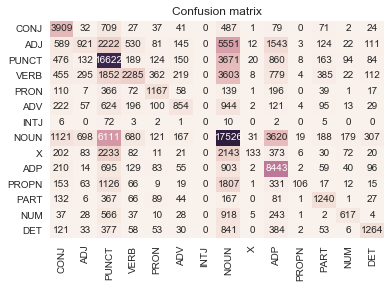

In [206]:
labels = list(set(pos_test))
print(classification_report(y_true, y_pred))
sns.heatmap(data=confusion_matrix(y_true, y_pred, labels = labels), annot=True, fmt="d", cbar=False, xticklabels=labels, yticklabels=labels)
plt.title("Confusion matrix")
plt.show()

In [107]:
model = Sequential()

model.add(Embedding(len(word_index) + 1, #объем словаря + 1 символ для pad
                            EMBEDDING_DIM,
                            weights=[embedding_matrix],
                            input_length=LEN_WINDOW,
                            trainable=False))
model.add(Flatten()) #конкатенирует входные вектора эмбеддингов
model.add(Dense(32, activation = 'softmax'))
model.add(Dropout(0.1))
model.add(Dense(len(set(pos_train)), activation = 'softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [108]:
model.fit(X_train, y_train, epochs = 10, batch_size = 32,  validation_split = 0.1)

Train on 308645 samples, validate on 34294 samples
Epoch 1/10
308645/308645 [==============================] - 76s 248us/step - loss: 1.4087 - acc: 0.5401 - val_loss: 0.7711 - val_acc: 0.8951
Epoch 2/10
308645/308645 [==============================] - 57s 184us/step - loss: 1.0218 - acc: 0.6658 - val_loss: 1.0847 - val_acc: 0.5833
Epoch 3/10
308645/308645 [==============================] - 61s 197us/step - loss: 0.9444 - acc: 0.6926 - val_loss: 1.0217 - val_acc: 0.5783
Epoch 4/10
308645/308645 [==============================] - 58s 186us/step - loss: 0.9040 - acc: 0.7063 - val_loss: 0.9613 - val_acc: 0.6348
Epoch 5/10
308645/308645 [==============================] - 89s 288us/step - loss: 0.8722 - acc: 0.7161 - val_loss: 1.1059 - val_acc: 0.5057
Epoch 6/10
308645/308645 [==============================] - 72s 232us/step - loss: 0.8420 - acc: 0.7245 - val_loss: 1.0449 - val_acc: 0.5561
Epoch 7/10
308645/308645 [==============================] - 68s 219us/step - loss: 0.8130 - acc: 0.7335

softmax - линейная функция активации. Если использовать ее на каждом слое, то это эквивалентно тому, что мы используем только один слой. Производная от нее - константа.

сигмоида - сглаженный градиент, нелинейна, ее производная тоже нелинейная. 



### Часть 3 [2 балла] Анализ ошибок
1. Привидите примеры из тестового множества, на которых нейронная сеть ошибается. Объясните, почему возникают ошибки.
2. Протестируйте нейронную сеть на произвольном предложении (не из тестовых данных). Возникают ли ошибки? Почему?

In [163]:
print(y_true[:20])
print(y_pred[:20])

['CONJ', 'PUNCT', 'NOUN', 'X', 'NOUN', 'NOUN', 'NOUN', 'X', 'NOUN', 'ADJ', 'CONJ', 'ADJ', 'NOUN', 'X', 'NOUN', 'NOUN', 'ADP', 'NOUN', 'NOUN', 'PUNCT']
['CONJ' 'PUNCT' 'PUNCT' 'PUNCT' 'NOUN' 'ADV' 'NOUN' 'NOUN' 'PUNCT' 'NOUN'
 'CONJ' 'NOUN' 'NOUN' 'PUNCT' 'NOUN' 'NOUN' 'ADP' 'NOUN' 'NOUN' 'NOUN']


In [170]:
print(test_[0][:20])

[('Например', 'CONJ', '_'), (',', 'PUNCT', '_'), ('технологичность', 'NOUN', '_'), ('–>', 'X', '_'), ('простота', 'NOUN', '_'), ('форм', 'NOUN', '_'), ('поверхностей', 'NOUN', '_'), ('–>', 'X', '_'), ('использование', 'NOUN', '_'), ('плоских', 'ADJ', '_'), ('и', 'CONJ', '_'), ('цилиндрических', 'ADJ', '_'), ('поверхностей', 'NOUN', '_'), ('–>', 'X', '_'), ('введение', 'NOUN', '_'), ('ограничений', 'NOUN', '_'), ('на', 'ADP', '_'), ('соотношение', 'NOUN', '_'), ('параметров', 'NOUN', '_'), (',', 'PUNCT', '_')]


На данном примере видны следующие ошибки:
1. Часто ошибается в определении класса X (тег для множества "Другое"), путает его с пунктуацией или существительными. Это сборный класс для слов, которые не подходят под другие части речи. Следовательно, он представляет сложности для классификации.
2. Путает прилагательные с существительными. Возможно, может объясняться тем, что прилагательные и существительные часто встречаются в похожих позициях (относительно других частей речи: и существительные, и прилагательные могут стоять рядом с существительными, после предлогов). 

In [176]:
y_true.index('INTJ')  –>

158